In [1]:
import pandas as pd

from functions.plots import plot_multi_boxplot
from functions.others import choose_dominant_kind

In [2]:
df_quest = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/survey.csv',
).fillna('NO_VAL')

df_quest = df_quest[df_quest.ID != 6]

df_quest['MAT'] = df_quest['MAT_roz'].apply(lambda x: x if x == 'NO_VAL' else 'VAL' )
df_quest['POL'] = df_quest['JP_roz'].apply(lambda x: x if x == 'NO_VAL' else 'VAL' )
df_quest['HIST'] = df_quest['HIST_roz'].apply(lambda x: x if x == 'NO_VAL' else 'VAL')
df_quest['Typ_uczenia'] = df_quest.apply(choose_dominant_kind, axis=1)
df_quest['Kierunek_studiów'] = df_quest['Kierunek_studiów'].apply(lambda x: 'MISMaP Geografia' if x == 'Geografia, w ramach studiów międzyobszarowych' else x)

df_time = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/times.csv')

df_merge = df_quest.merge(df_time, on='ID')
df_merge.head()

ID Płeć  Rok_urodzenia         Kierunek_studiów  Rok_studiów Specjalność  \
0   1    M           2002         MISMaP Geografia            2    SPOŁ-EKO   
1   2    M           2003  Gospodarka przestrzenna            1      NO_VAL   
2   3    M           2001                Geografia            3     GEOINF    
3   4    K           2000                Geografia            3     GEOINF    
4   5    K           2002                Geografia            3     GEOINF    

   Wady_wzroku  Daltonizm Ilość_snu   JP_podst  ... Duration_2a Duration_2b  \
0            0          1         6  90 - 100%  ...      54.481      58.697   
1            1          1        <6   50 - 69%  ...      42.248      85.329   
2            0          1         8   50 - 69%  ...      45.165      32.732   
3            0          1         8   50 - 69%  ...      12.449      37.715   
4            0          1         7   50 - 69%  ...      55.931      22.132   

  Duration_3a Duration_3b SumTime_all  SumTime_a  SumTime_b  SumTime_1  \
0      56.314      63.897     276.921    138.810    138.110     43.531   
1      47.948     129.427     459.647    156.426    303.219    154.693   
2       8.000      61.197     299.890    121.995    177.892    152.793   
3      60.980     101.795     337.437    119.477    217.956    124.494   
4      34.898      62.930     271.458    158.809    112.644     95.562   

   SumTime_2  SumTime_3  
0    113.178    120.211  
1    127.577    177.375  
2     77.897     69.197  
3     50.164    162.775  
4     78.063     97.828  

[5 rows x 51 columns]

In [3]:
df_sumAll = df_merge.rename(columns={'SumTime_all':'time'})
df_sumA = df_merge.rename(columns={'SumTime_a':'time'})
df_sumB = df_merge.rename(columns={'SumTime_b':'time'})
df_sum1 = df_merge.rename(columns={'SumTime_1':'time'})
df_sum2 = df_merge.rename(columns={'SumTime_2':'time'})
df_sum3 = df_merge.rename(columns={'SumTime_3':'time'})

In [4]:
dfs = [df_sumAll, df_sumA, df_sumB, df_sum1, df_sum2, df_sum3]
names = {
    1: 'Zsumowane wszystkie grafiki:',
    2: 'Zsumowane grafiki A:',
    3: 'Zsumowane grafiki B:',
    4: 'Zsumowane grafiki 1:',
    5: 'Zsumowane grafiki 2:',
    6: 'Zsumowane grafiki 3:',
}

columns = ['Płeć', 'Rok_urodzenia', 'Kierunek_studiów',
       'Rok_studiów', 'Specjalność', 'Wady_wzroku', 'Ilość_snu',
       'JP_podst', 'MAT_podst', 'JP_roz', 'MAT_roz', 'HIST_roz',
       'Samopocz', 'Stres', 'Zmęcz', 'Czyt_map', 'Podziel_uwg', 'Analit_myśl',
       'Spostrzeg', 'Czyt_ze_zroz', 'Wzrokowiec', 'Słuchowiec', 'Kinestetyk', 'MAT', 'POL', 'HIST', 'Typ_uczenia']

In [5]:
names_columns = {
    'Płeć':'Płeć',
 'Rok_urodzenia': 'Rok urodzenia',
 'Kierunek_studiów': 'Kierunek studiów',
 'Rok_studiów': 'Rok studiów',
 'Specjalność': 'Specjalność',
 'Wady_wzroku': 'Wady wzroku',
 'Ilość_snu': 'Ilość snu',
 'JP_podst': 'Matura - j. polski - poziom podstawowy',
 'MAT_podst': 'Matura - matematyka - poziom podstawowy',
 'JP_roz': 'Matura - j. polski - poziom rozszerzony',
 'MAT_roz': 'Matura - matematyka - poziom rozszerzony',
 'HIST_roz': 'Matura - historia - poziom rozszerzony',
 'Samopocz': 'Samopoczucie',
 'Stres': 'Stres',
 'Zmęcz': 'Zmęczenie',
 'Czyt_map': 'Czytanie map',
 'Podziel_uwg': 'Podzielność uwagi',
 'Analit_myśl': 'Analityczne myślenie',
 'Spostrzeg': 'Spostrzegawczość',
 'Czyt_ze_zroz': 'Czytanie ze zrozumieniem',
 'Wzrokowiec': 'Wzrokowiec',
 'Słuchowiec': 'Słuchowiec',
 'Kinestetyk': 'Kinestetyk',
 'MAT': 'Matura - matematyka - poziom rozszerzony - pisał/nie pisał',
 'POL': 'Matura - j. polski - poziom rozszerzony - pisał/nie pisał',
 'HIST': 'Matura - historia - poziom rozszerzony - pisał/nie pisał',
 'Typ_uczenia': 'Dominujący typ uczenia poznawczego',
}

################################################
Płeć
Zsumowane wszystkie grafiki:


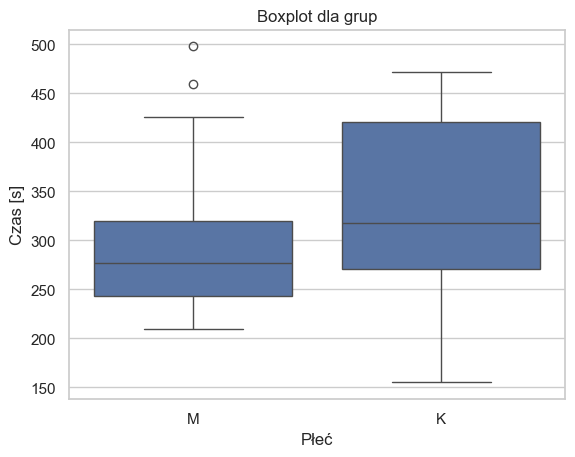

Zsumowane grafiki A:


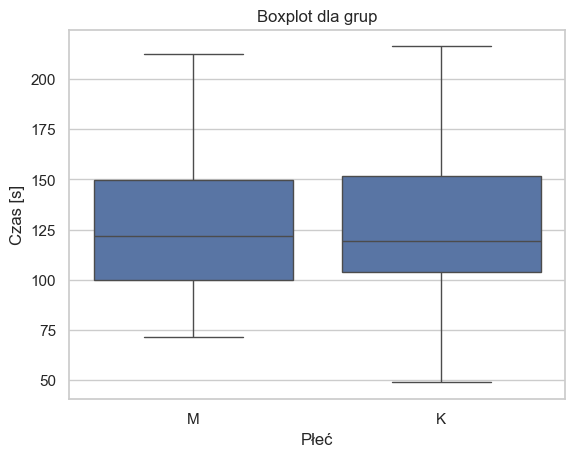

Zsumowane grafiki B:


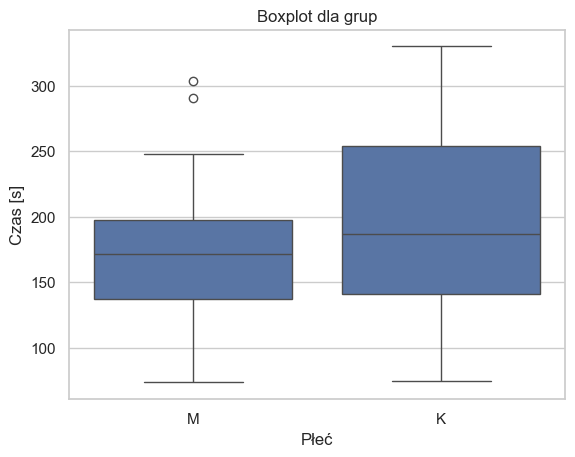

Zsumowane grafiki 1:


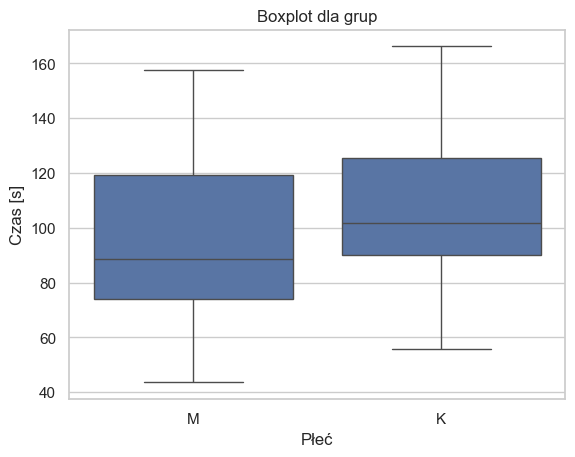

Zsumowane grafiki 2:


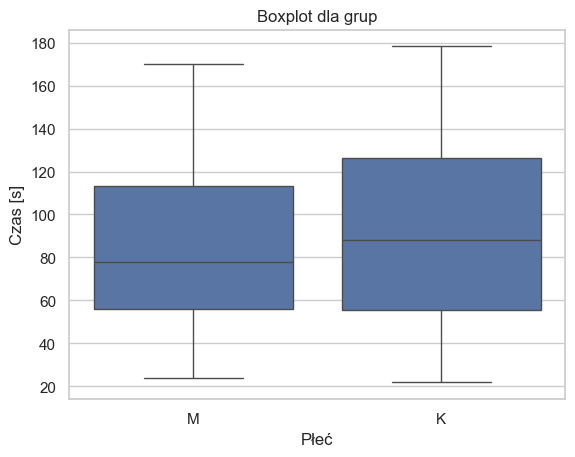

Zsumowane grafiki 3:


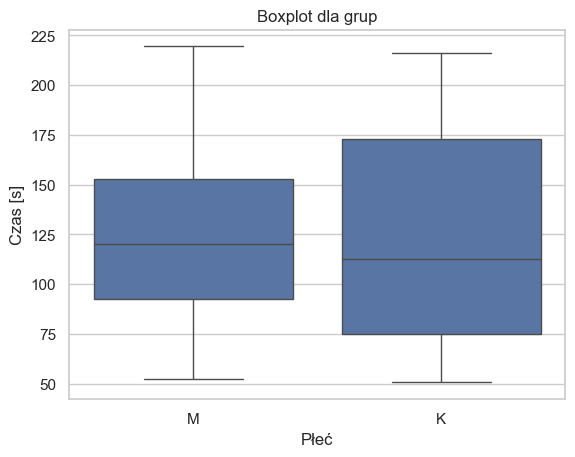

################################################
Rok_urodzenia
Zsumowane wszystkie grafiki:


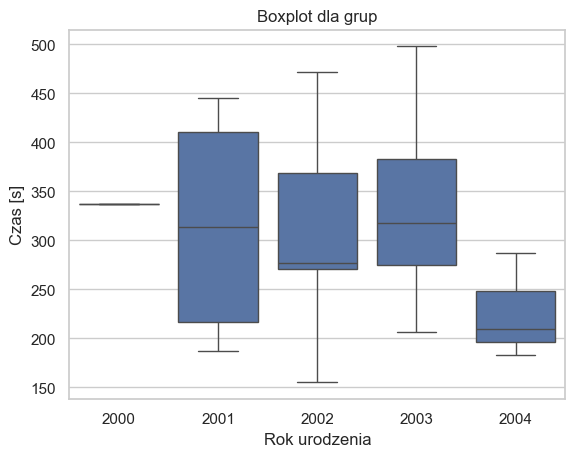

Zsumowane grafiki A:


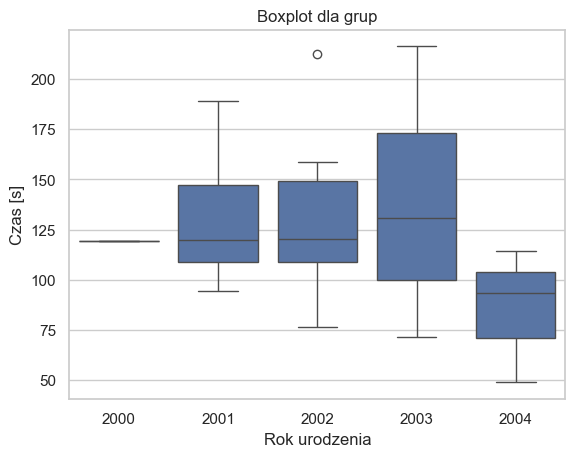

Zsumowane grafiki B:


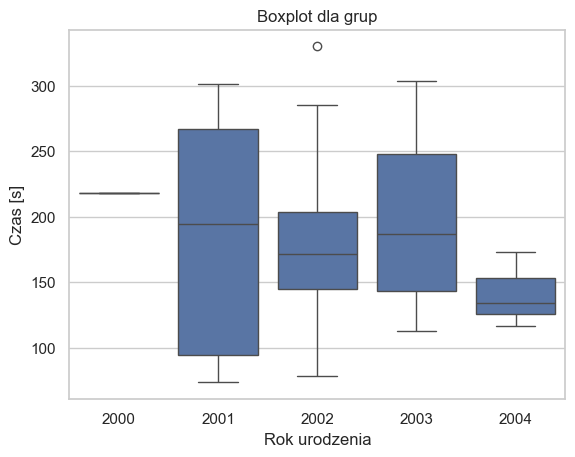

Zsumowane grafiki 1:


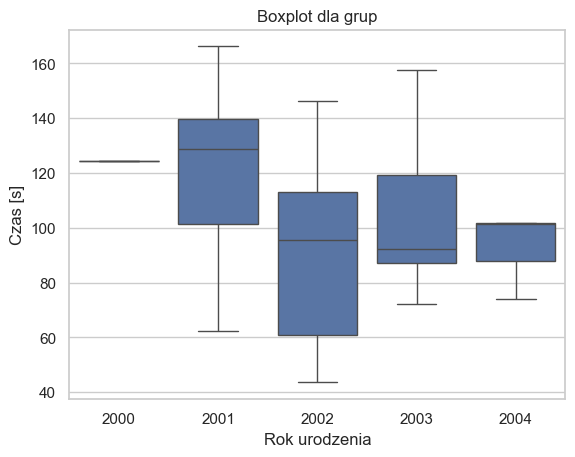

Zsumowane grafiki 2:


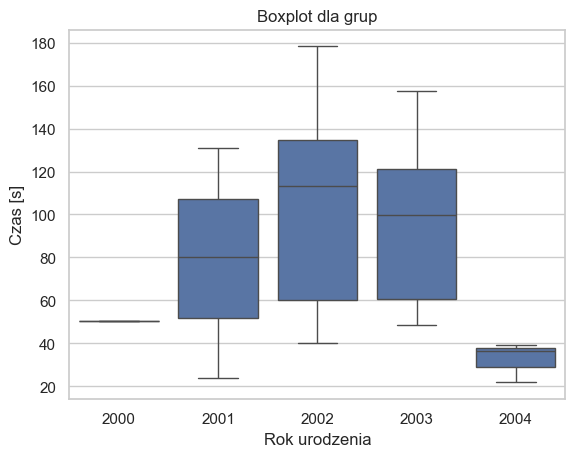

Zsumowane grafiki 3:


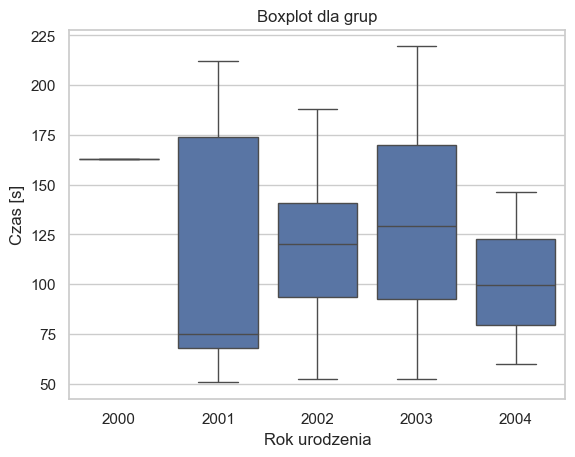

################################################
Kierunek_studiów
Zsumowane wszystkie grafiki:


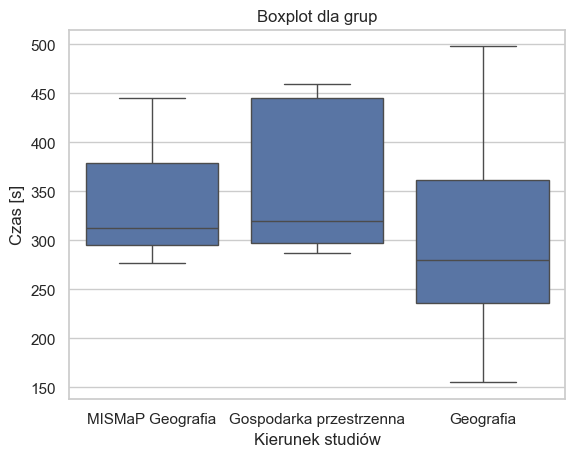

Zsumowane grafiki A:


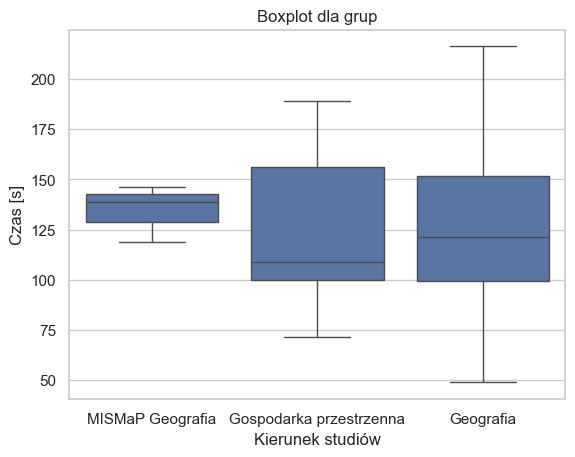

Zsumowane grafiki B:


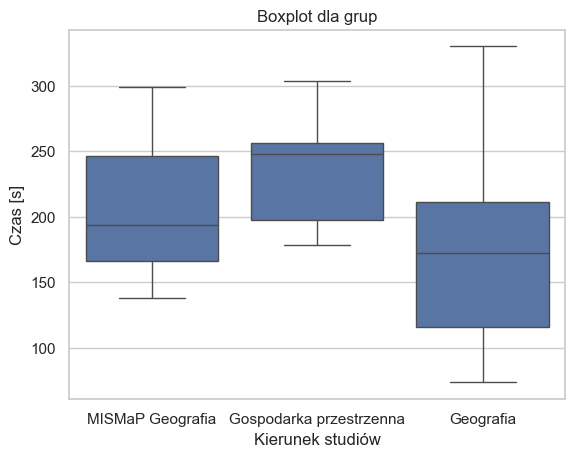

Zsumowane grafiki 1:


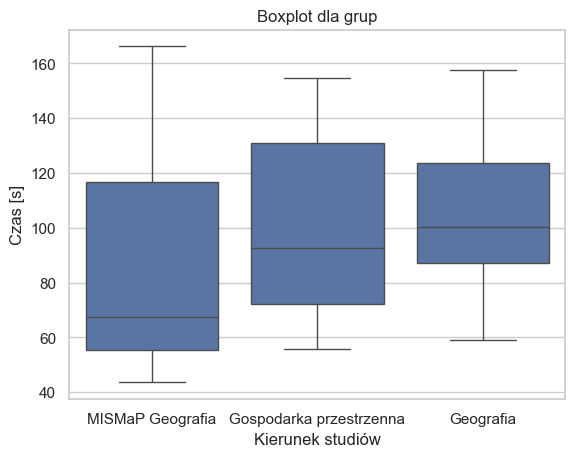

Zsumowane grafiki 2:


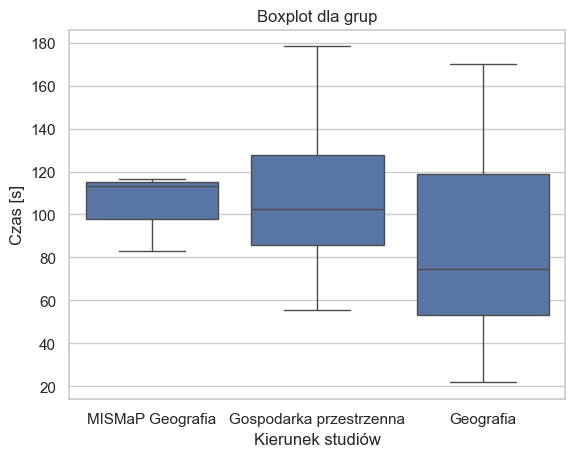

Zsumowane grafiki 3:


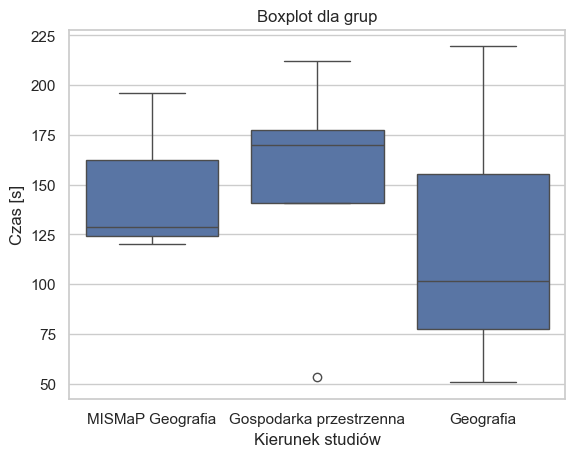

################################################
Rok_studiów
Zsumowane wszystkie grafiki:


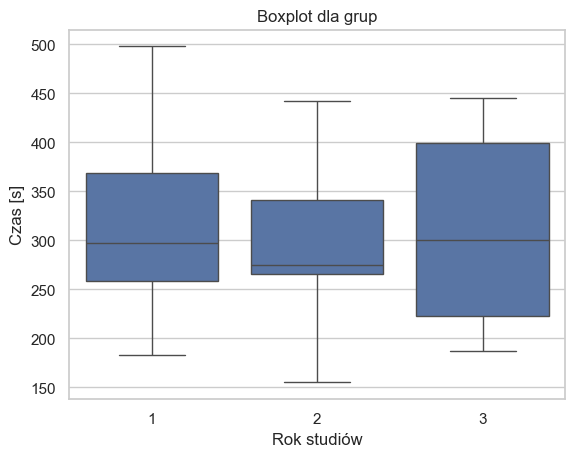

Zsumowane grafiki A:


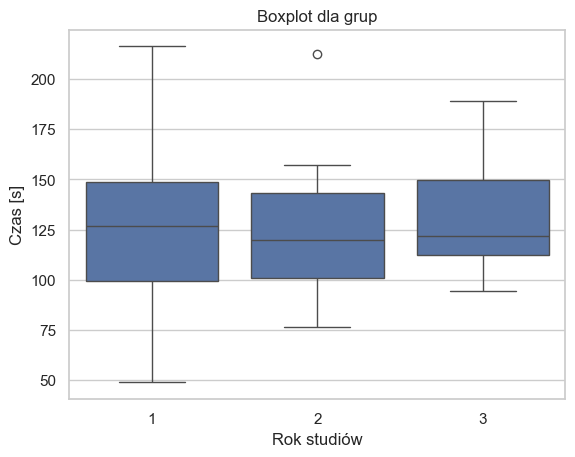

Zsumowane grafiki B:


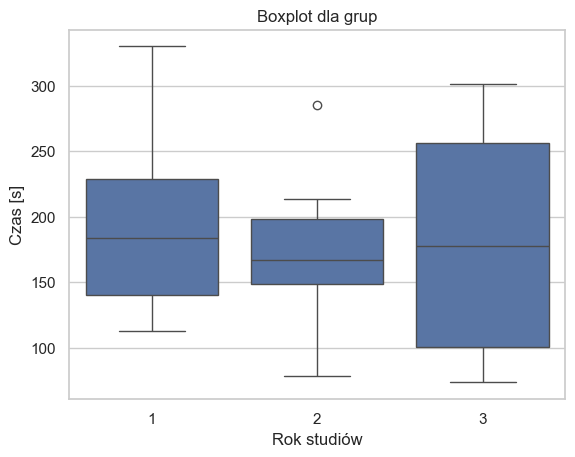

Zsumowane grafiki 1:


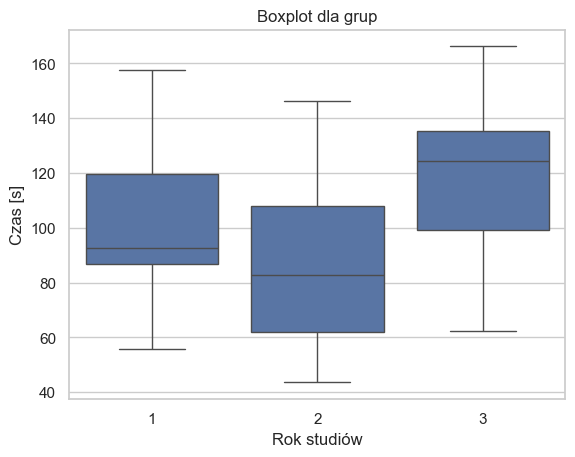

Zsumowane grafiki 2:


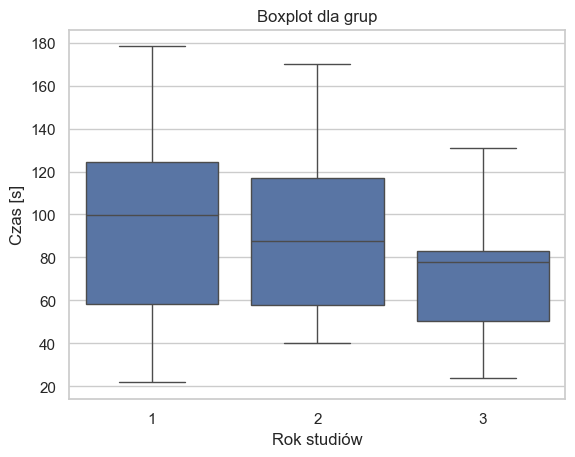

Zsumowane grafiki 3:


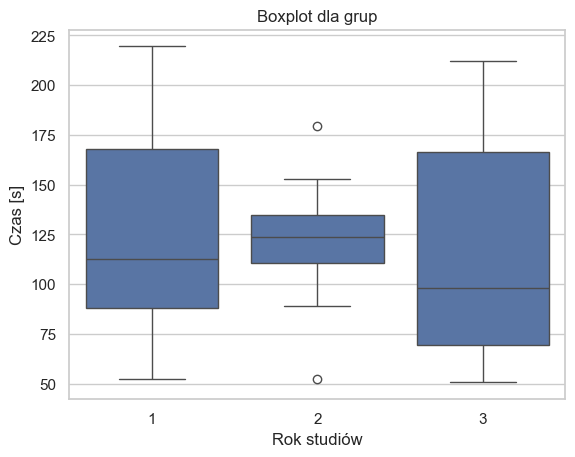

################################################
Specjalność
Zsumowane wszystkie grafiki:


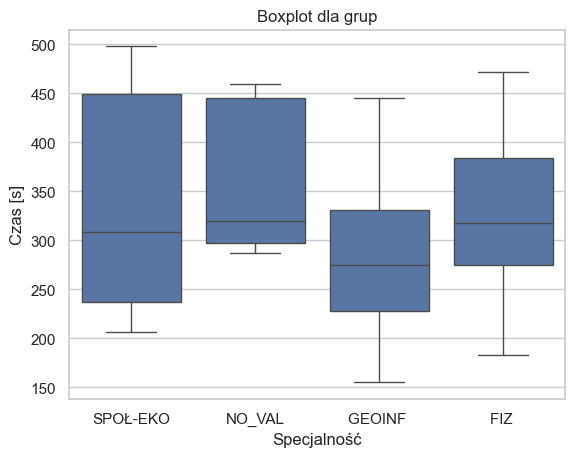

Zsumowane grafiki A:


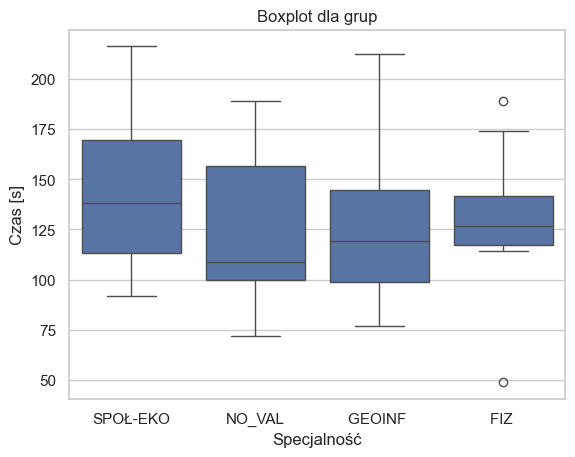

Zsumowane grafiki B:


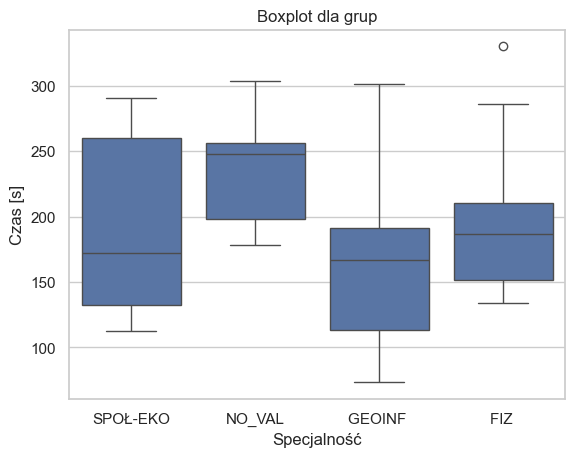

Zsumowane grafiki 1:


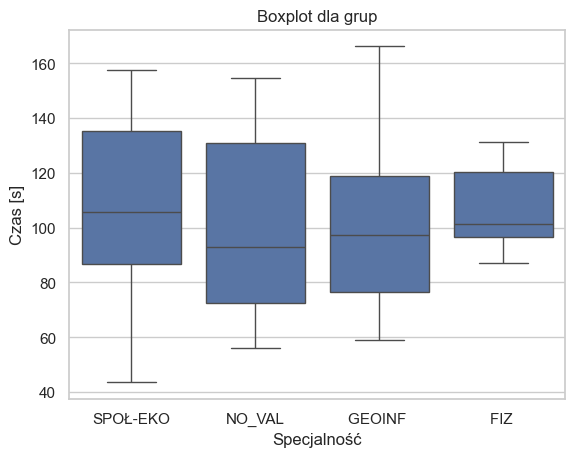

Zsumowane grafiki 2:


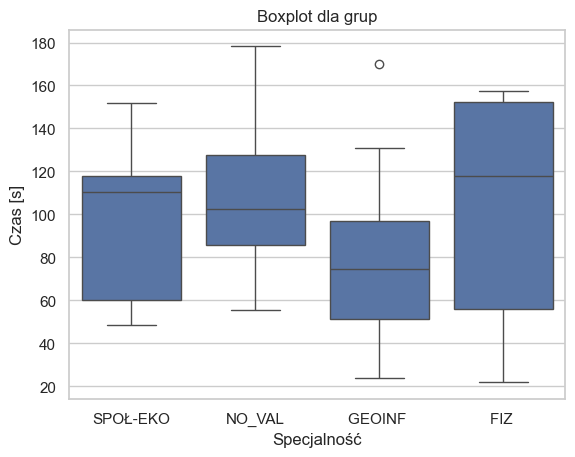

Zsumowane grafiki 3:


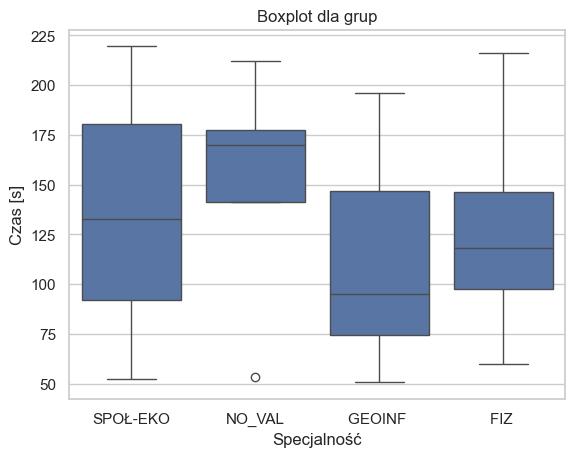

################################################
Wady_wzroku
Zsumowane wszystkie grafiki:


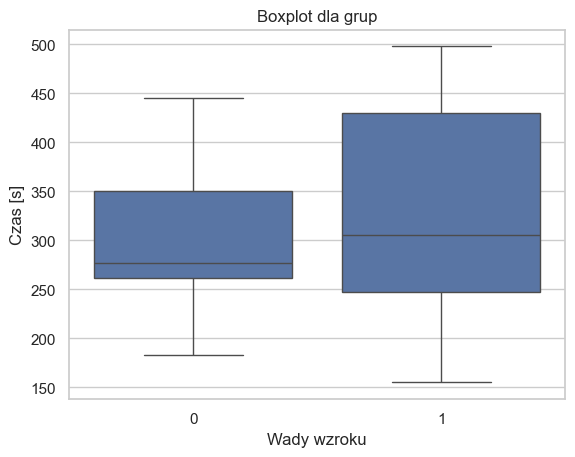

Zsumowane grafiki A:


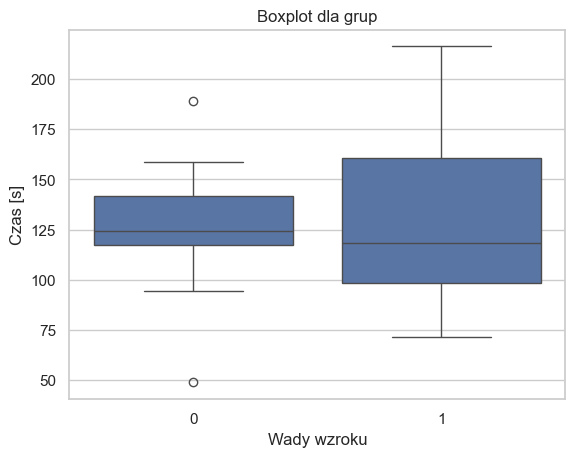

Zsumowane grafiki B:


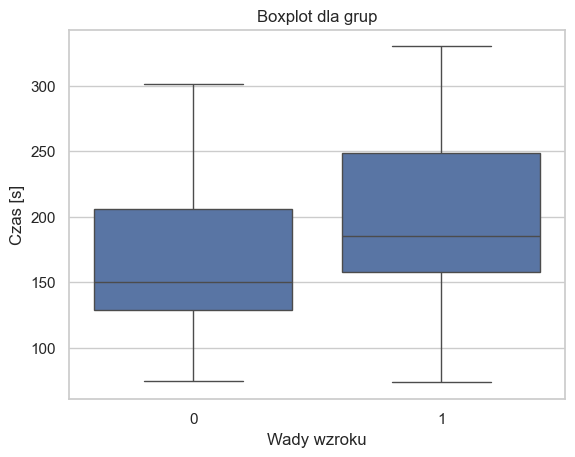

Zsumowane grafiki 1:


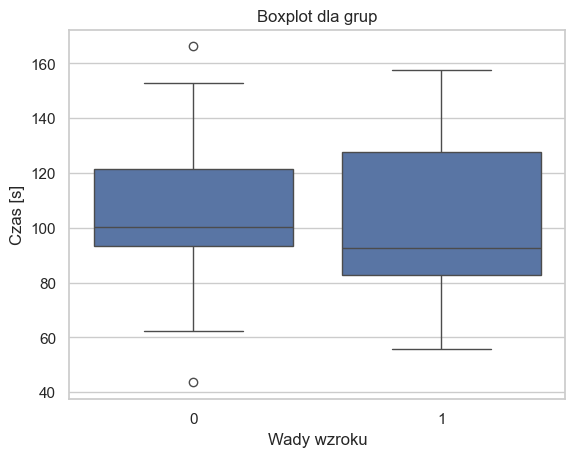

Zsumowane grafiki 2:


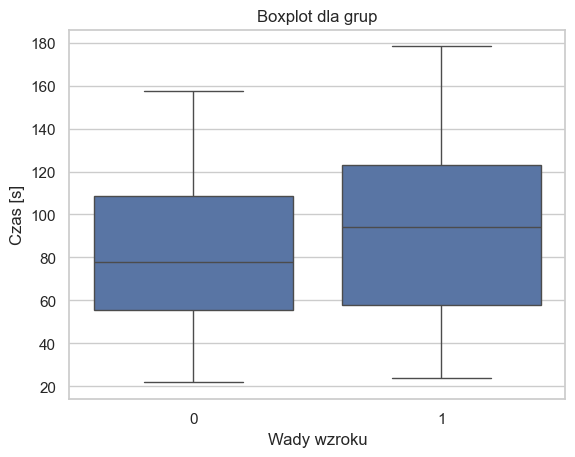

Zsumowane grafiki 3:


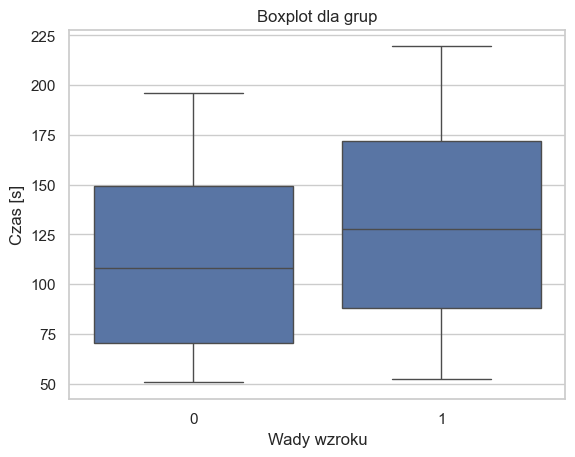

################################################
Ilość_snu
Zsumowane wszystkie grafiki:


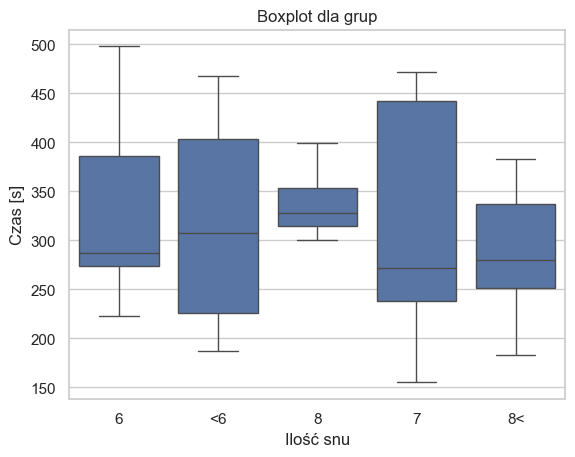

Zsumowane grafiki A:


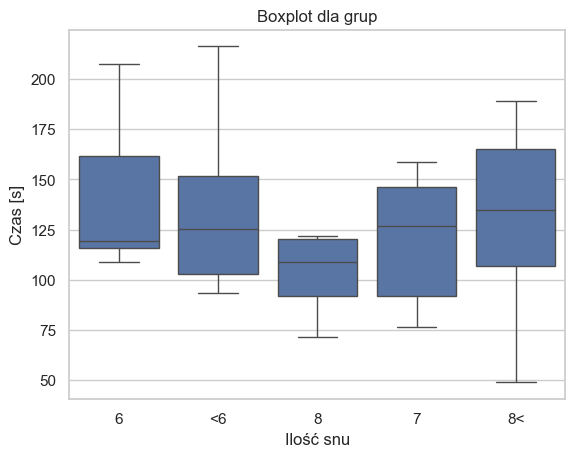

Zsumowane grafiki B:


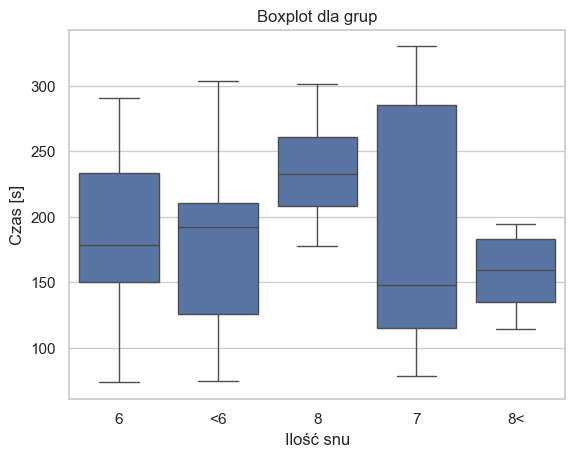

Zsumowane grafiki 1:


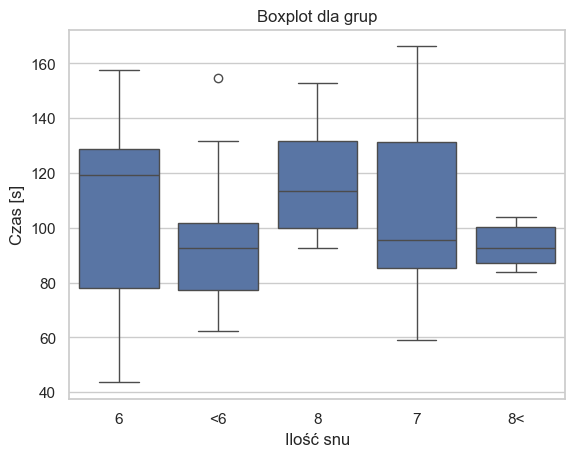

Zsumowane grafiki 2:


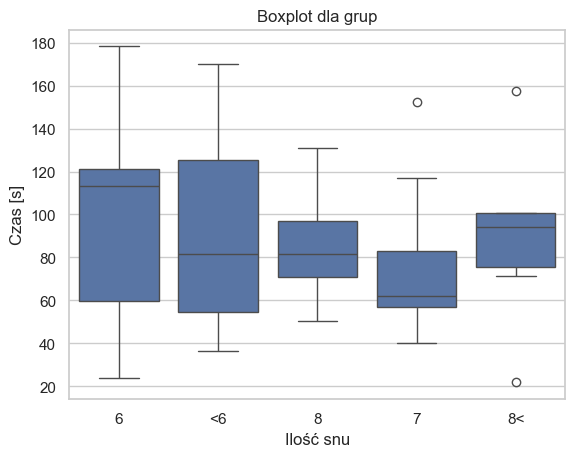

Zsumowane grafiki 3:


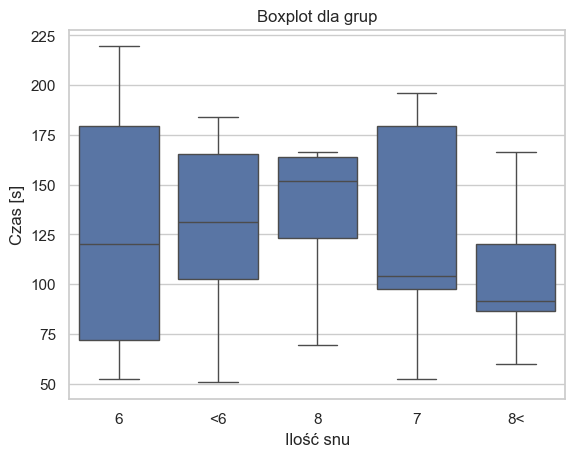

################################################
JP_podst
Zsumowane wszystkie grafiki:


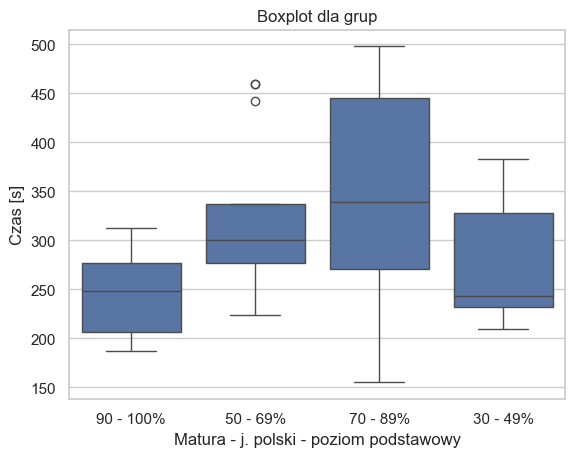

Zsumowane grafiki A:


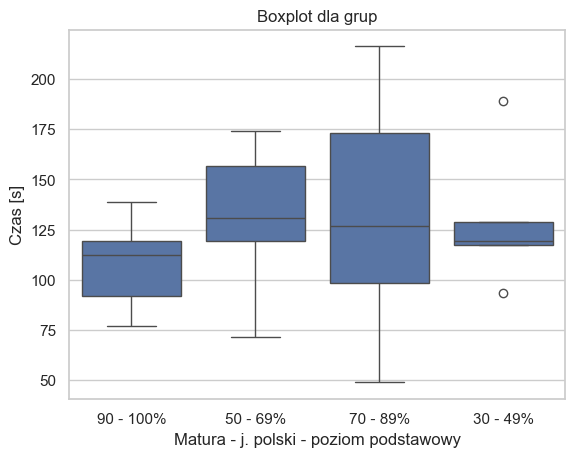

Zsumowane grafiki B:


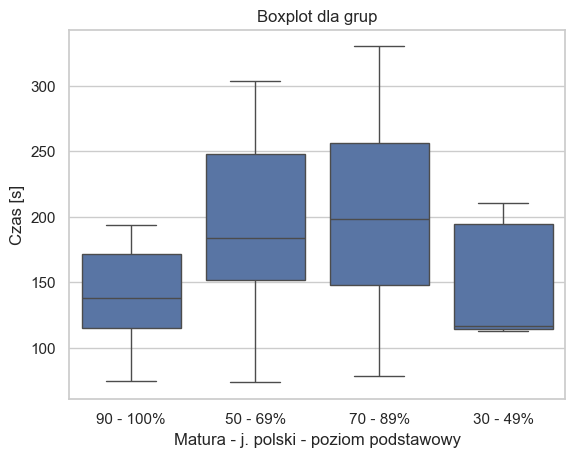

Zsumowane grafiki 1:


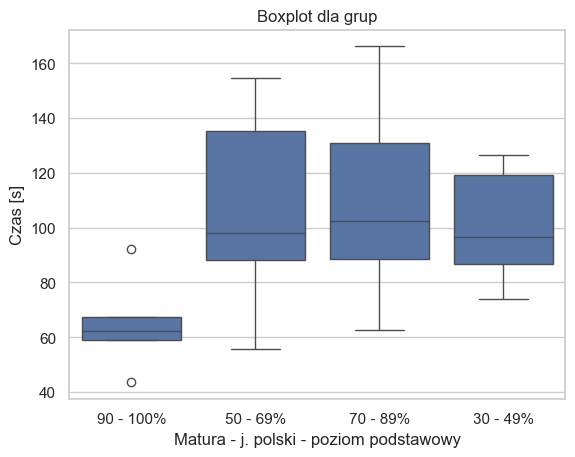

Zsumowane grafiki 2:


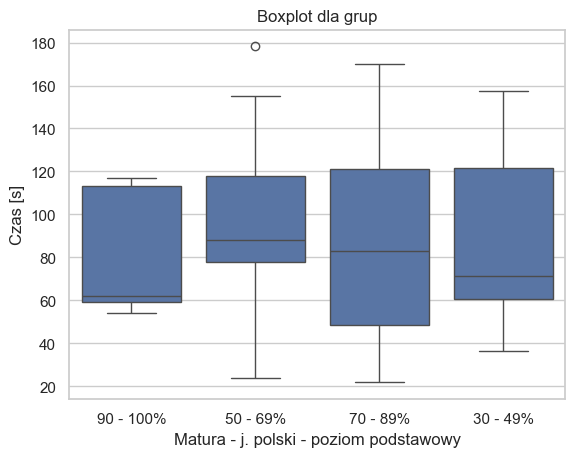

Zsumowane grafiki 3:


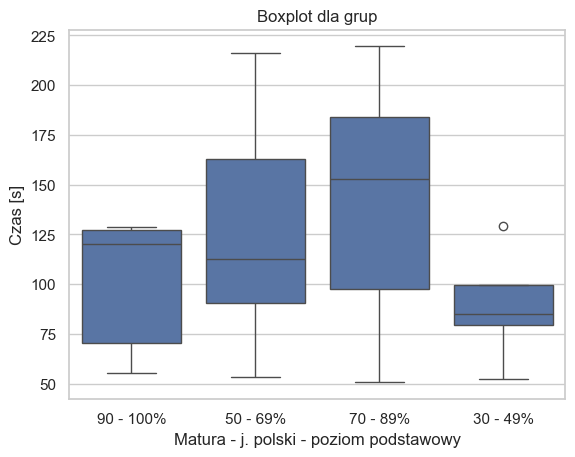

################################################
MAT_podst
Zsumowane wszystkie grafiki:


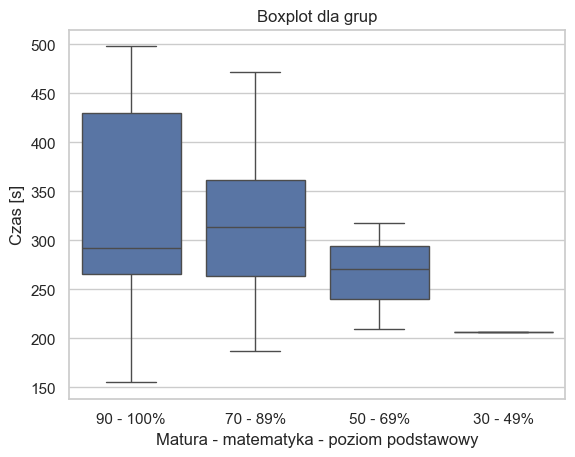

Zsumowane grafiki A:


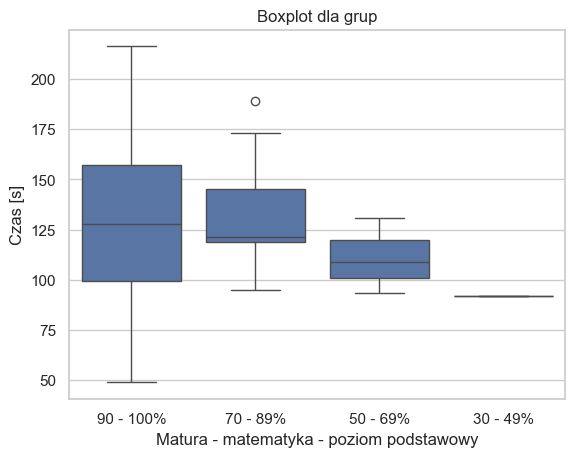

Zsumowane grafiki B:


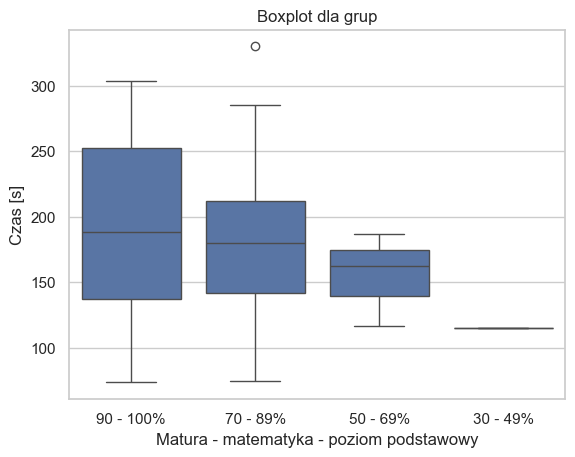

Zsumowane grafiki 1:


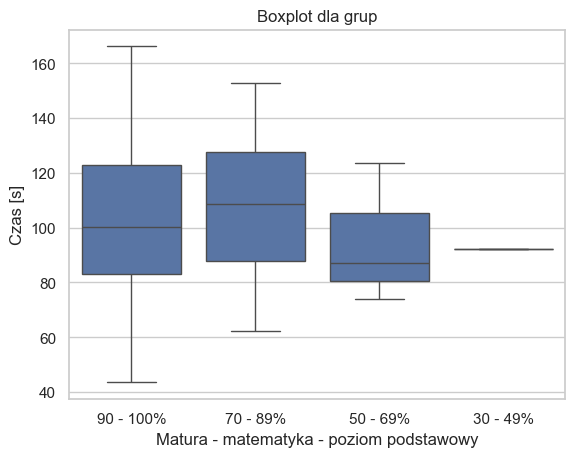

Zsumowane grafiki 2:


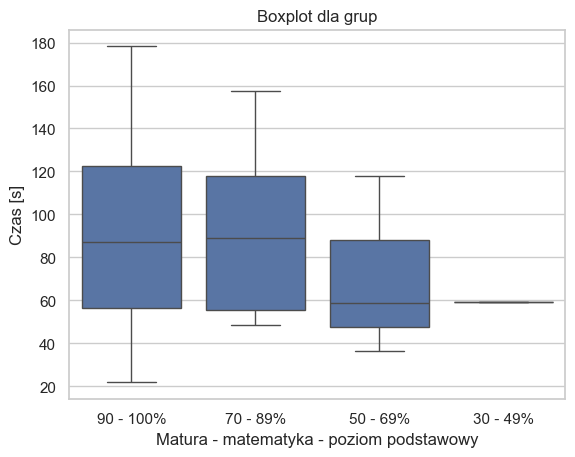

Zsumowane grafiki 3:


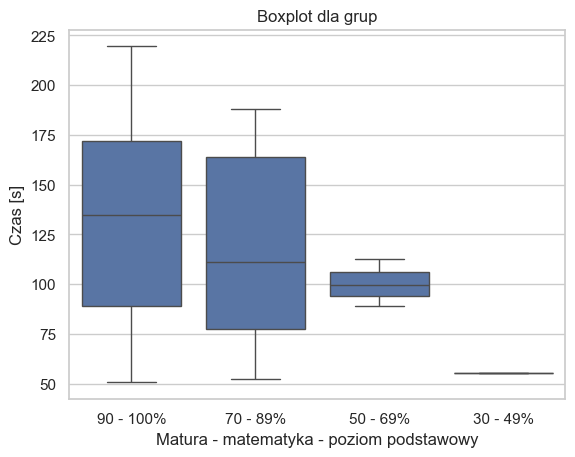

################################################
JP_roz
Zsumowane wszystkie grafiki:


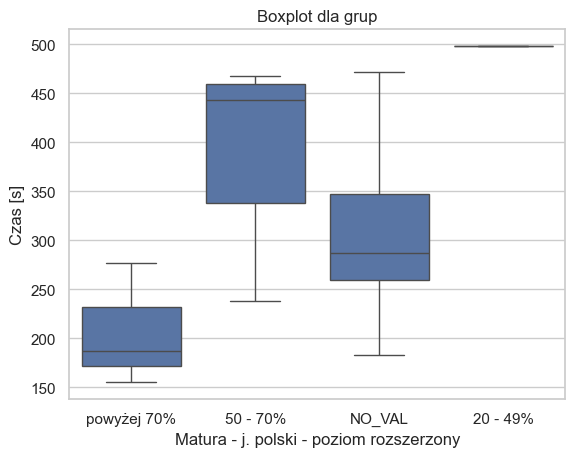

Zsumowane grafiki A:


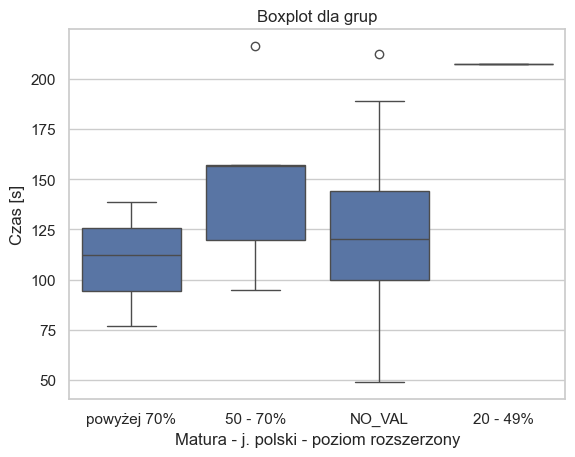

Zsumowane grafiki B:


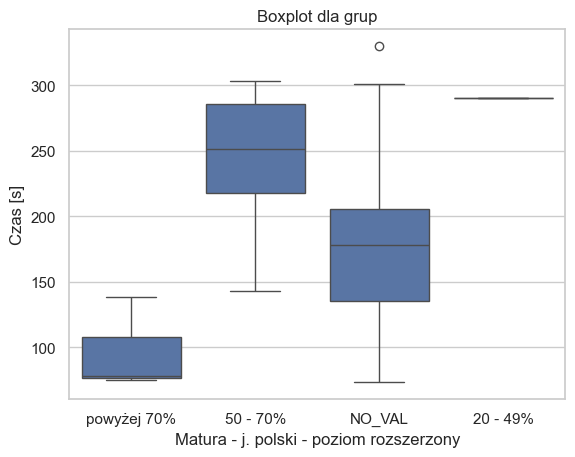

Zsumowane grafiki 1:


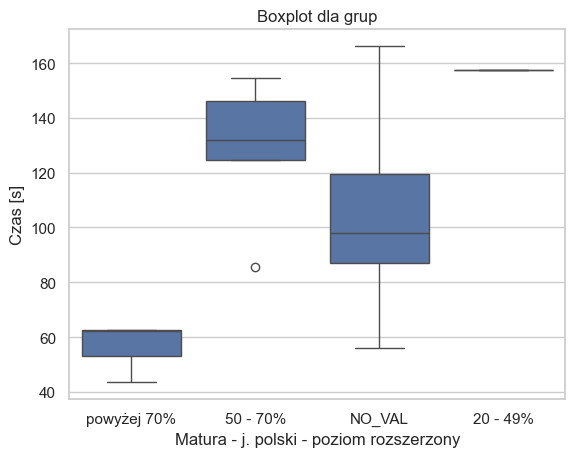

Zsumowane grafiki 2:


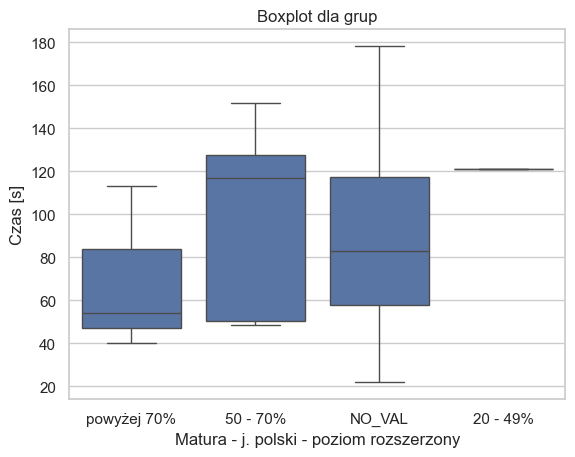

Zsumowane grafiki 3:


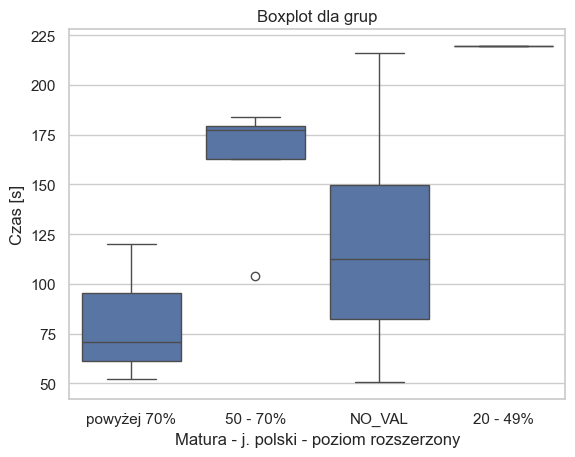

################################################
MAT_roz
Zsumowane wszystkie grafiki:


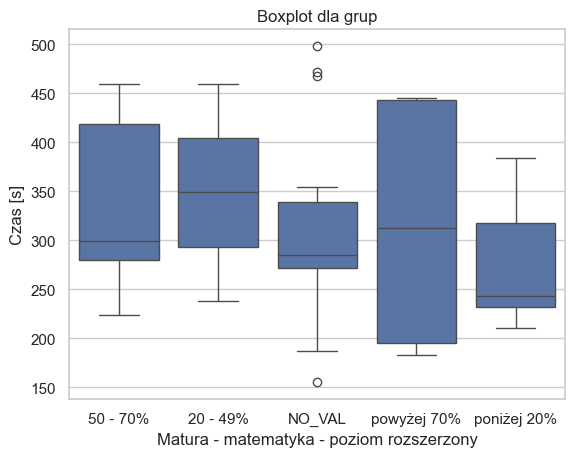

Zsumowane grafiki A:


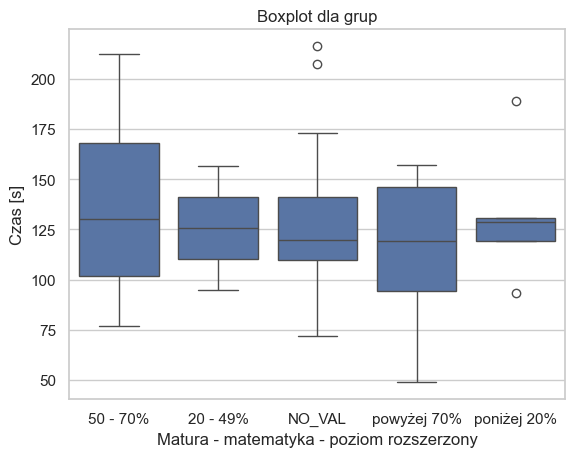

Zsumowane grafiki B:


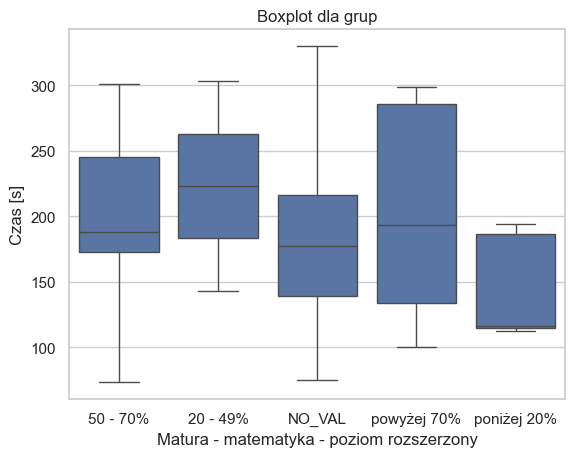

Zsumowane grafiki 1:


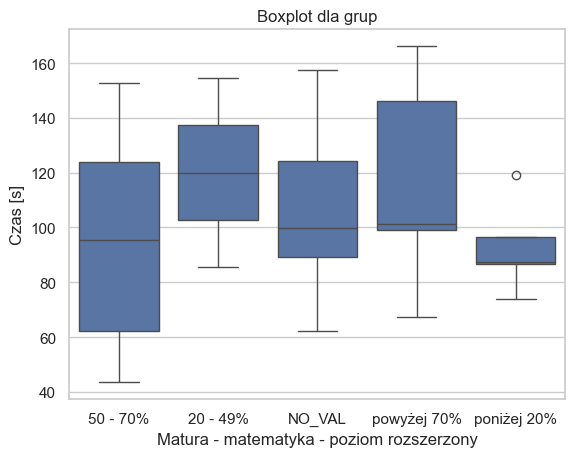

Zsumowane grafiki 2:


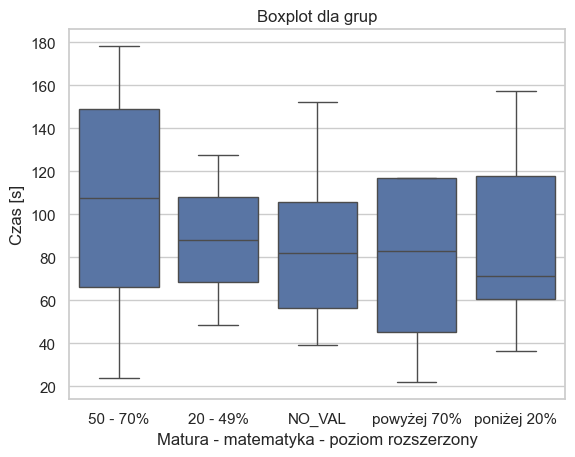

Zsumowane grafiki 3:


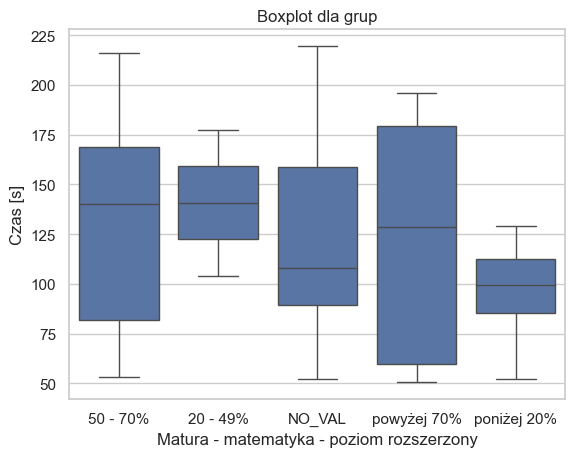

################################################
HIST_roz
Zsumowane wszystkie grafiki:


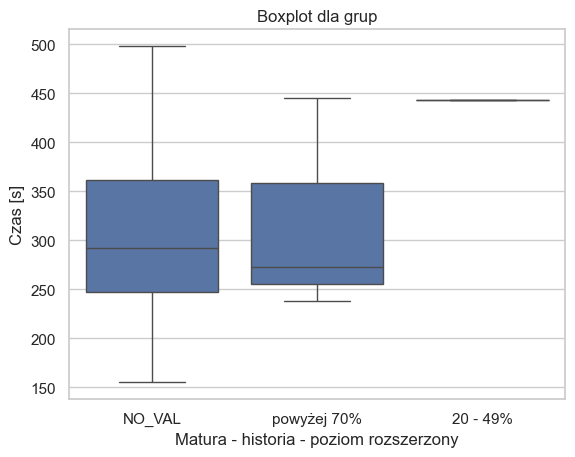

Zsumowane grafiki A:


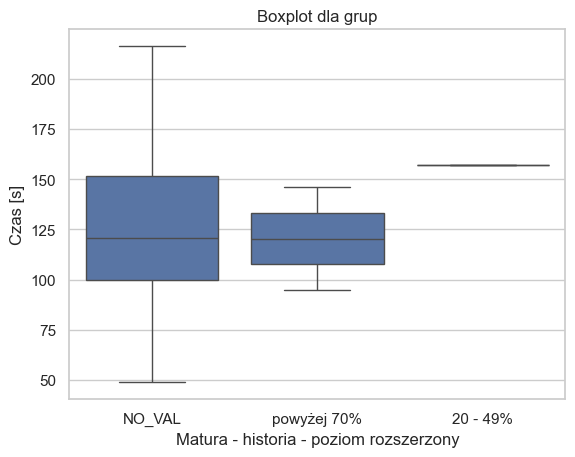

Zsumowane grafiki B:


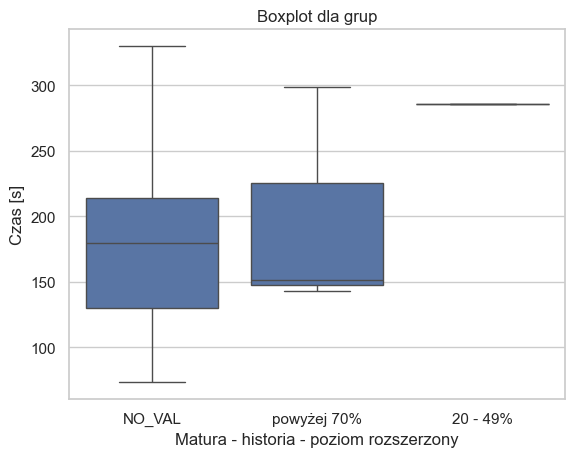

Zsumowane grafiki 1:


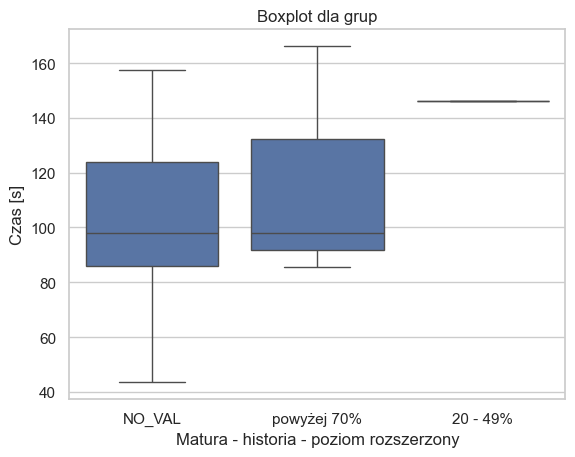

Zsumowane grafiki 2:


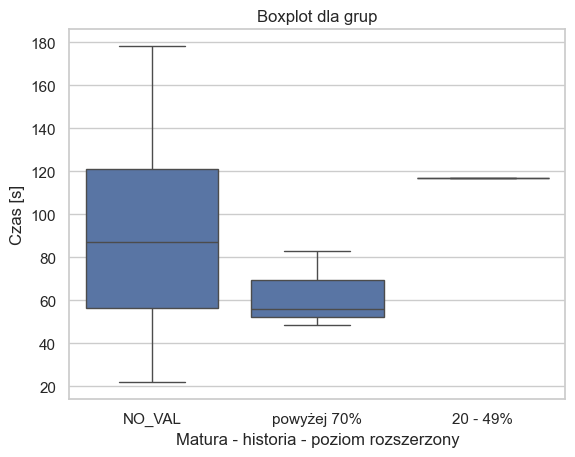

Zsumowane grafiki 3:


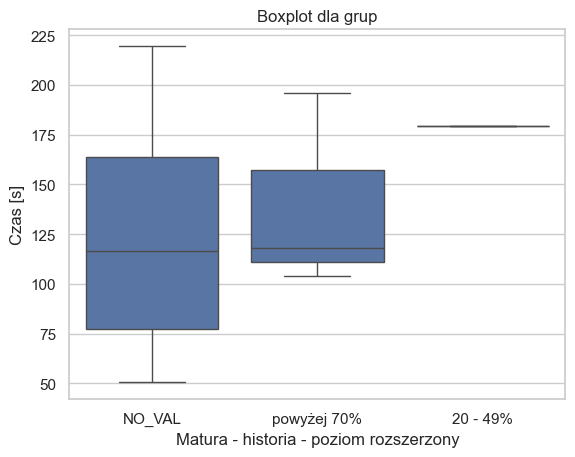

################################################
Samopocz
Zsumowane wszystkie grafiki:


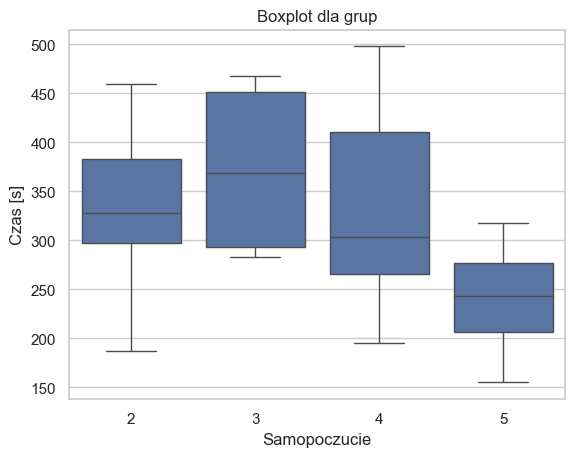

Zsumowane grafiki A:


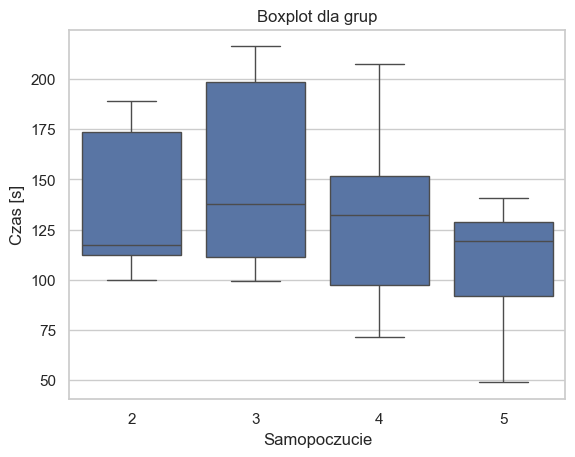

Zsumowane grafiki B:


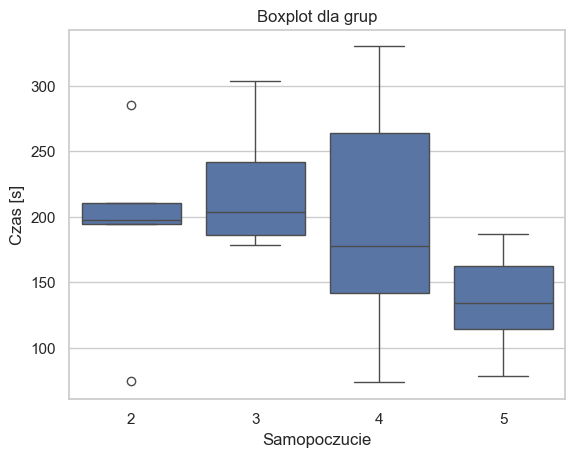

Zsumowane grafiki 1:


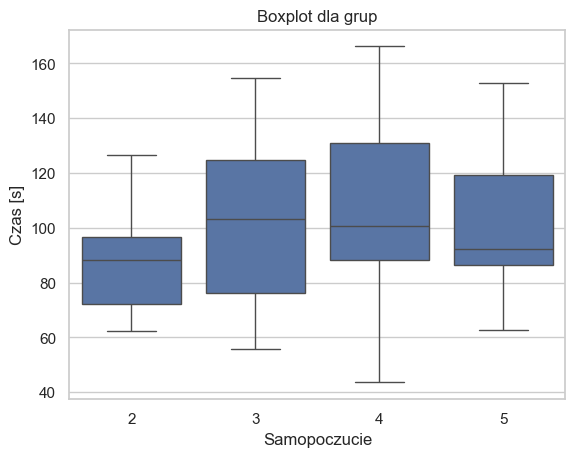

Zsumowane grafiki 2:


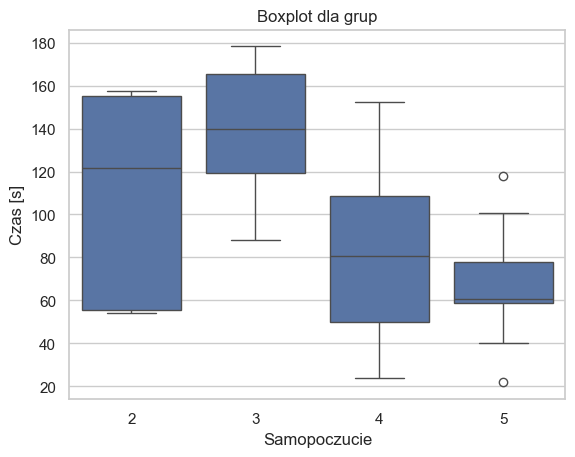

Zsumowane grafiki 3:


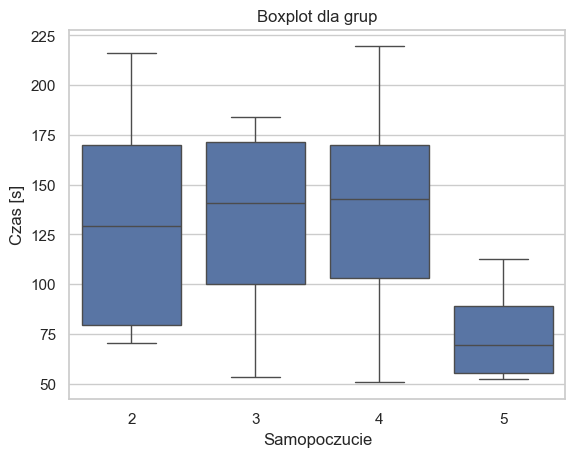

################################################
Stres
Zsumowane wszystkie grafiki:


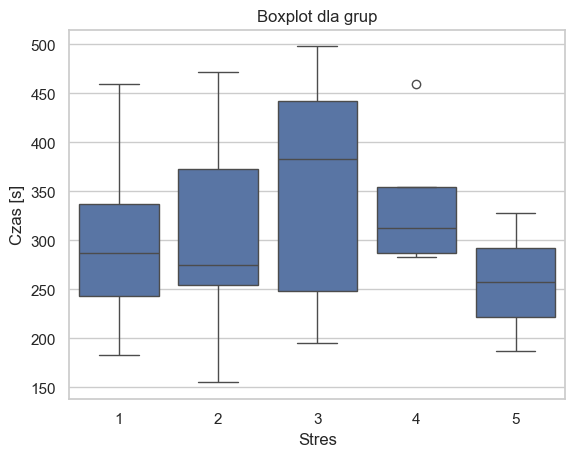

Zsumowane grafiki A:


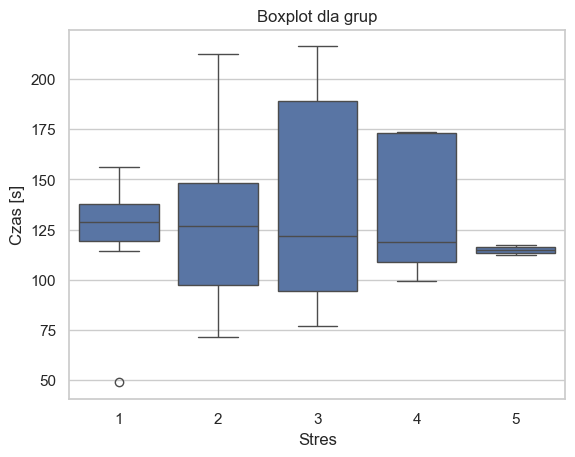

Zsumowane grafiki B:


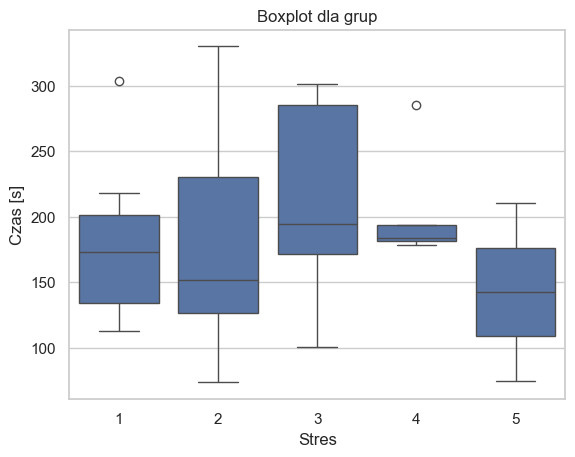

Zsumowane grafiki 1:


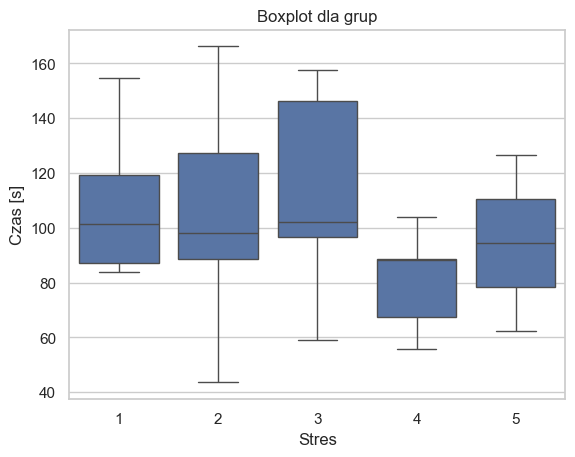

Zsumowane grafiki 2:


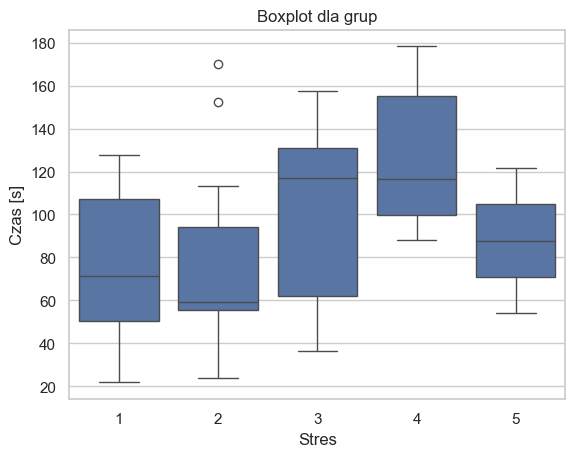

Zsumowane grafiki 3:


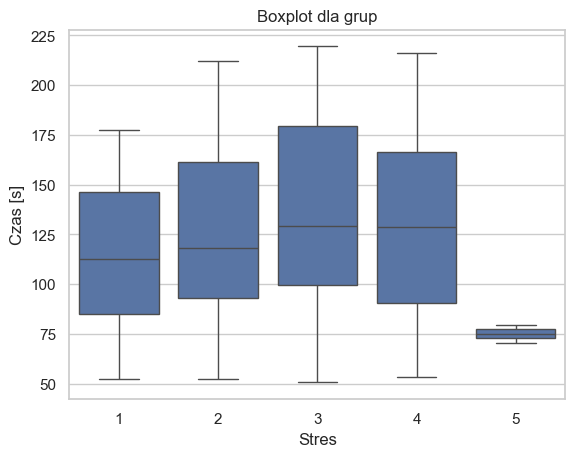

################################################
Zmęcz
Zsumowane wszystkie grafiki:


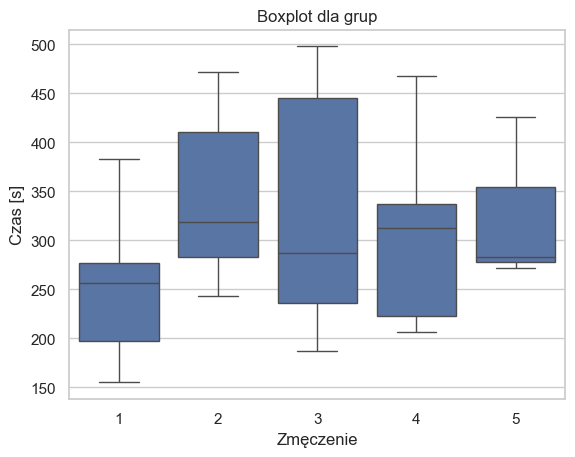

Zsumowane grafiki A:


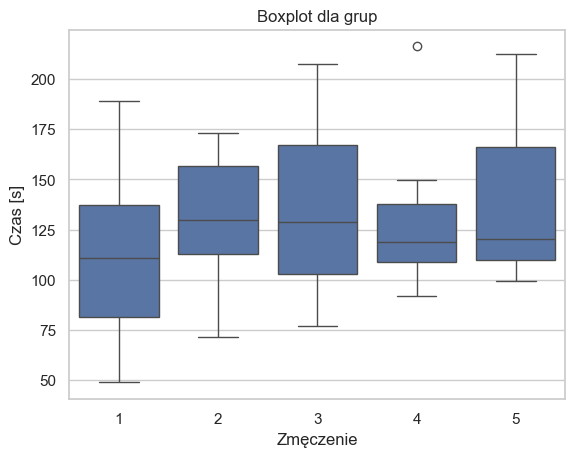

Zsumowane grafiki B:


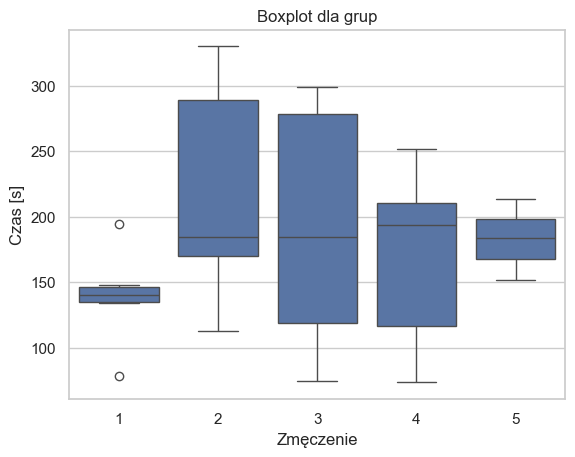

Zsumowane grafiki 1:


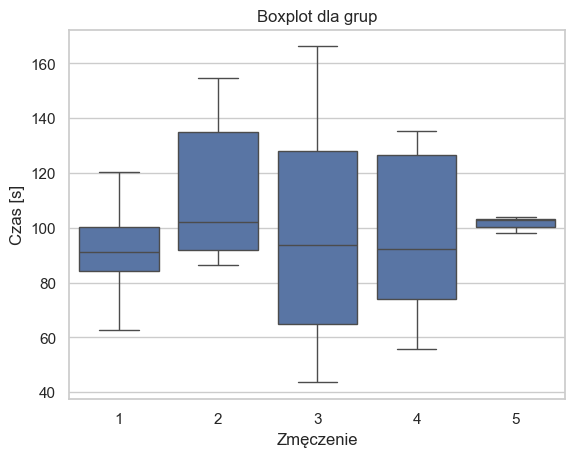

Zsumowane grafiki 2:


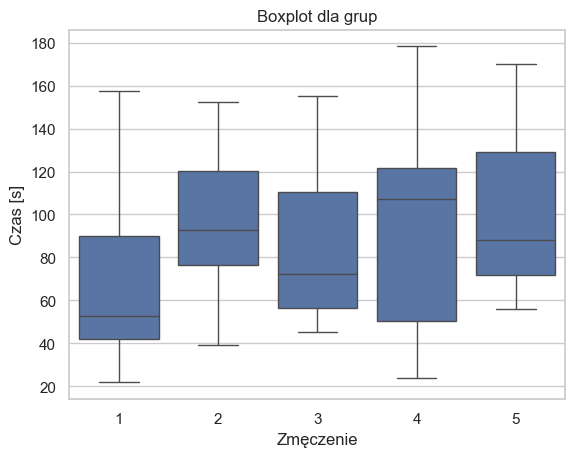

Zsumowane grafiki 3:


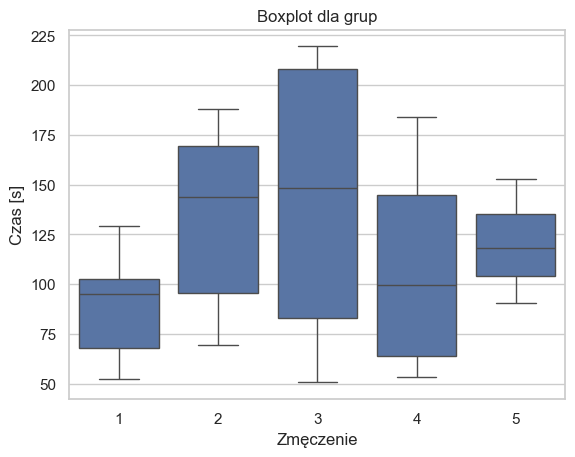

################################################
Czyt_map
Zsumowane wszystkie grafiki:


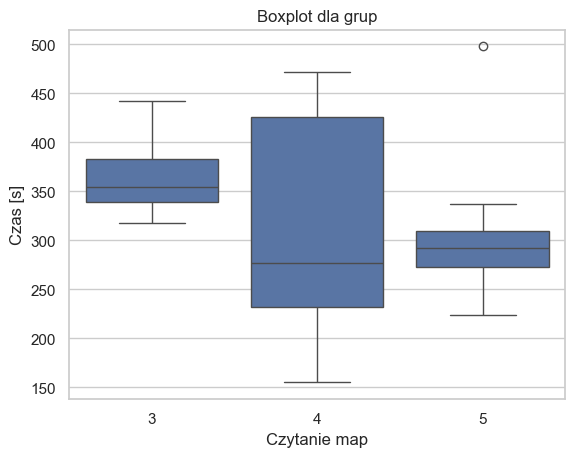

Zsumowane grafiki A:


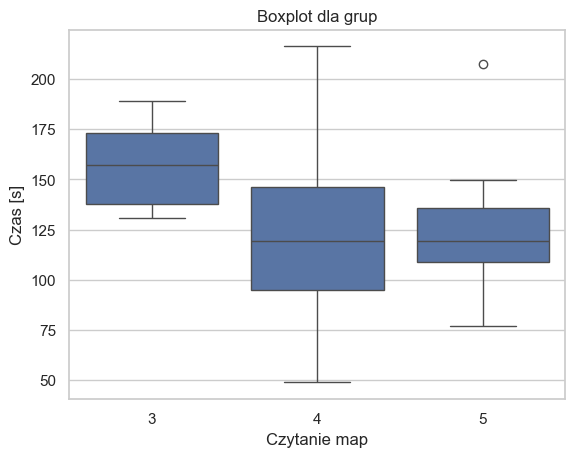

Zsumowane grafiki B:


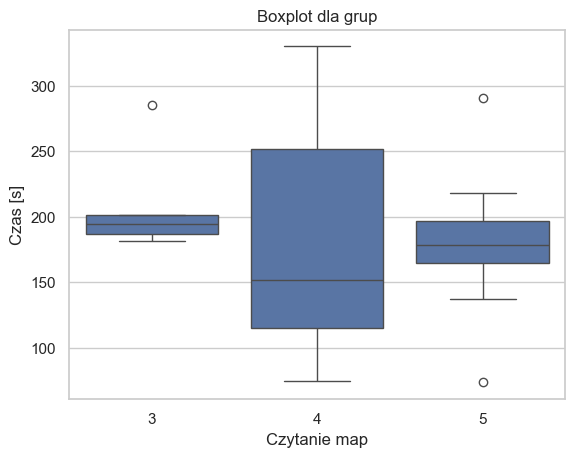

Zsumowane grafiki 1:


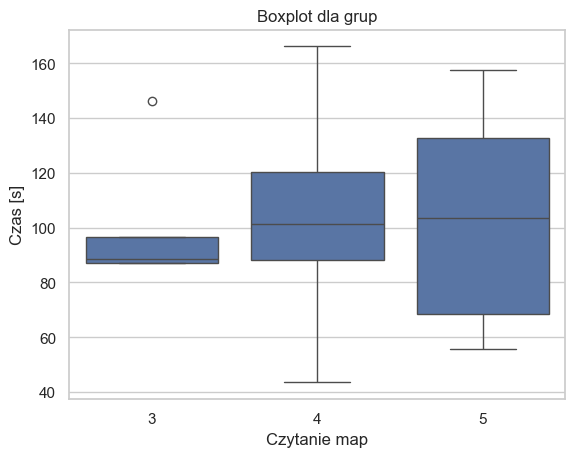

Zsumowane grafiki 2:


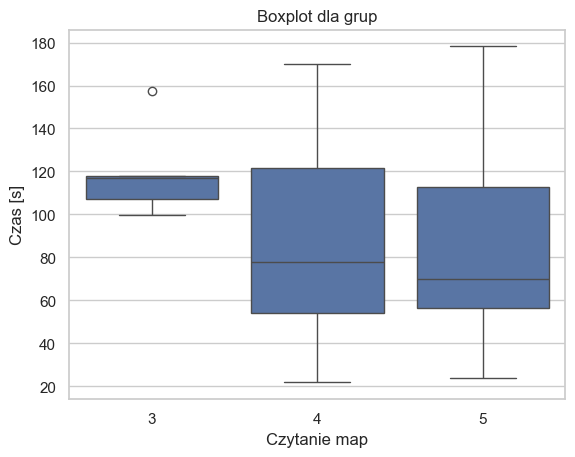

Zsumowane grafiki 3:


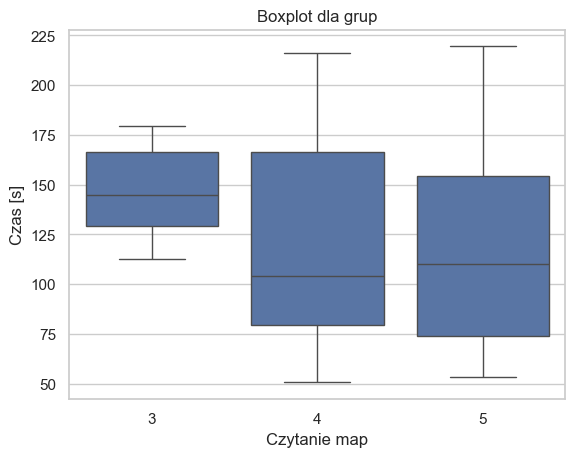

################################################
Podziel_uwg
Zsumowane wszystkie grafiki:


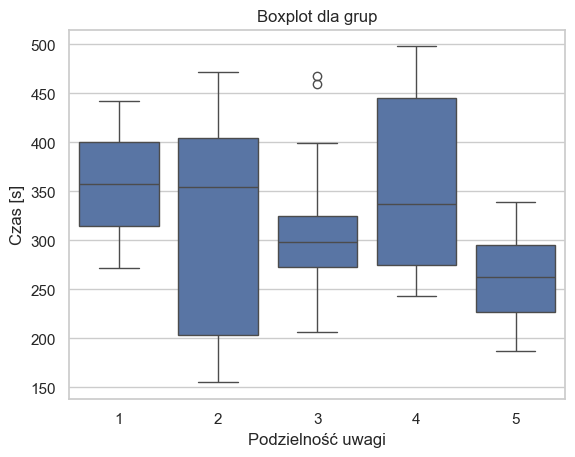

Zsumowane grafiki A:


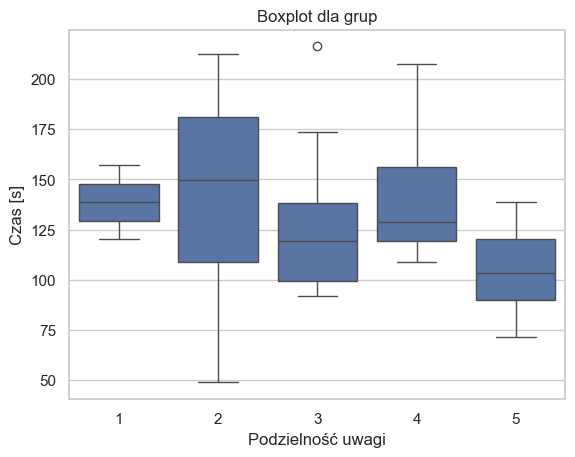

Zsumowane grafiki B:


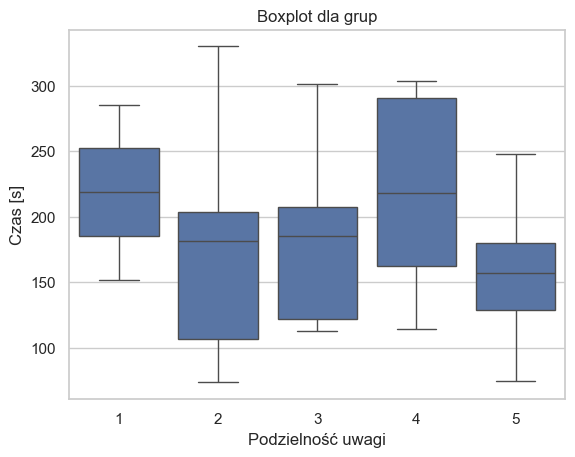

Zsumowane grafiki 1:


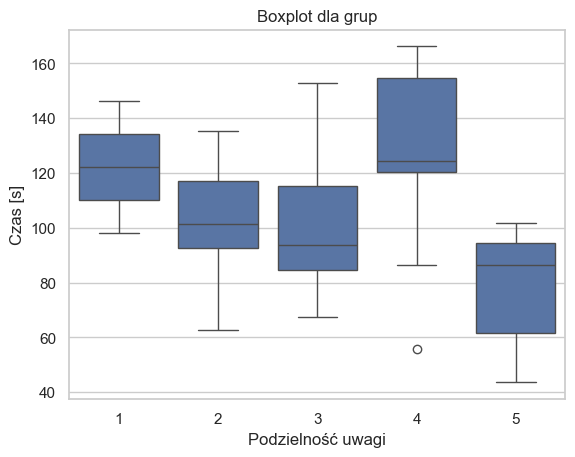

Zsumowane grafiki 2:


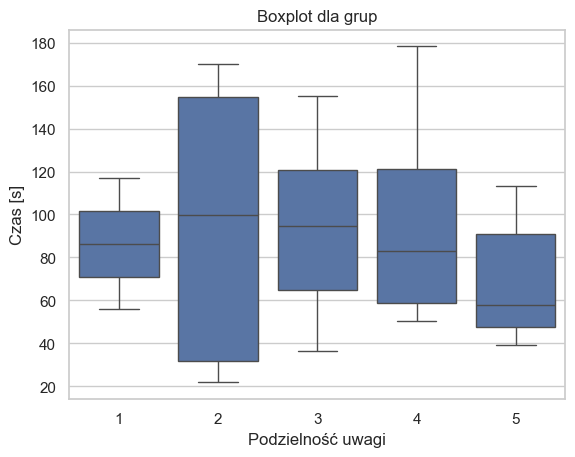

Zsumowane grafiki 3:


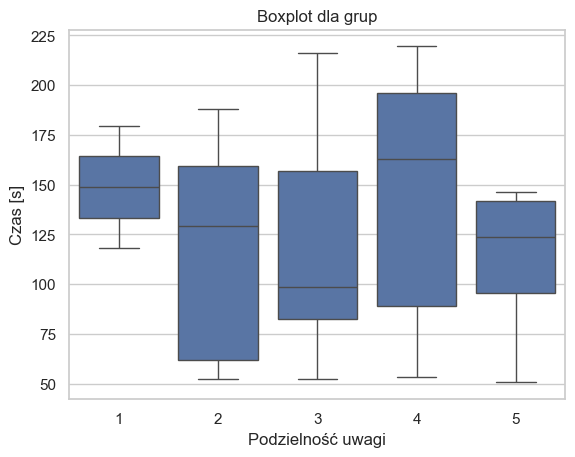

################################################
Analit_myśl
Zsumowane wszystkie grafiki:


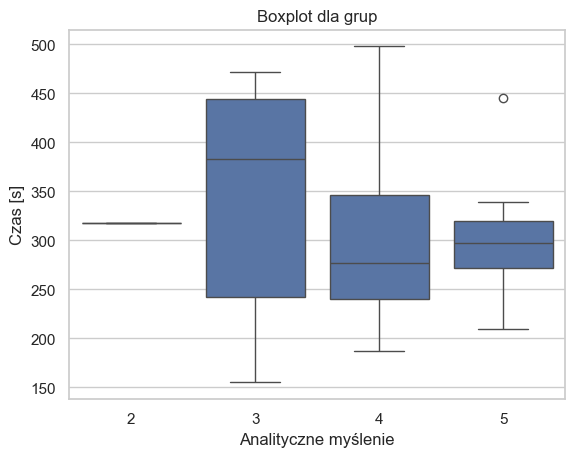

Zsumowane grafiki A:


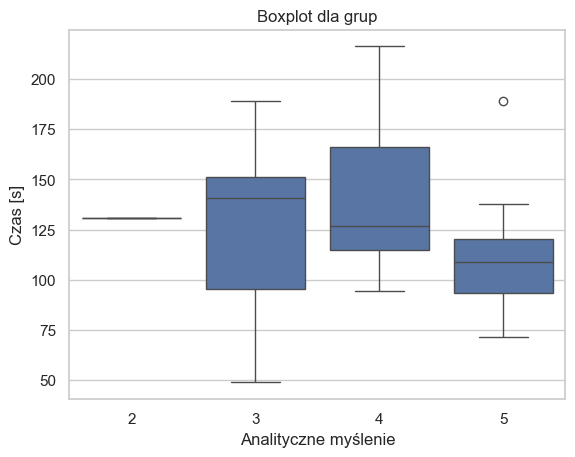

Zsumowane grafiki B:


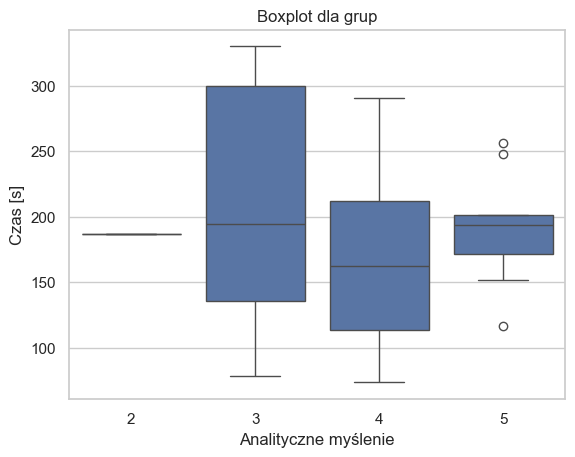

Zsumowane grafiki 1:


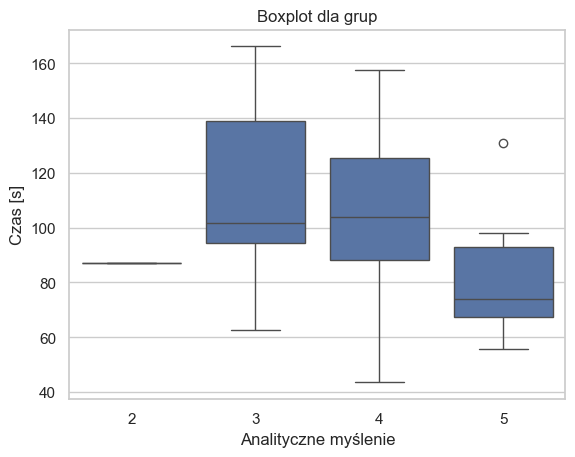

Zsumowane grafiki 2:


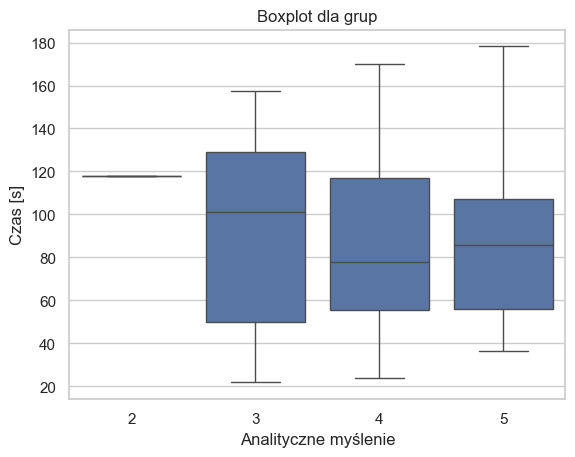

Zsumowane grafiki 3:


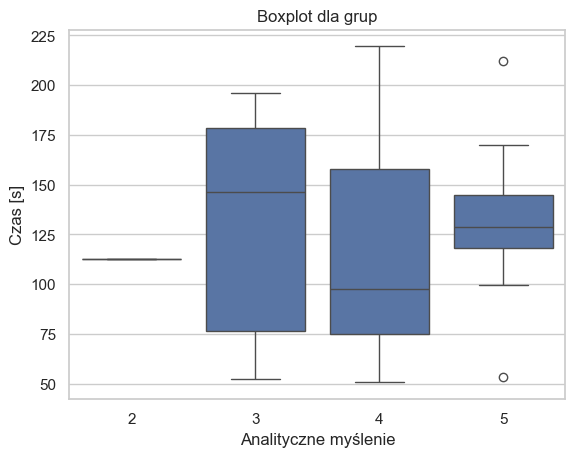

################################################
Spostrzeg
Zsumowane wszystkie grafiki:


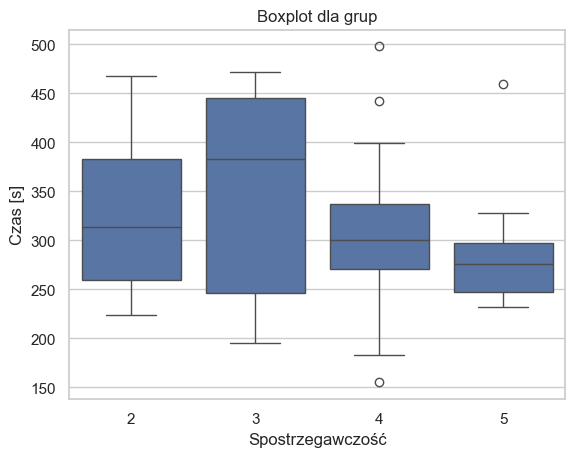

Zsumowane grafiki A:


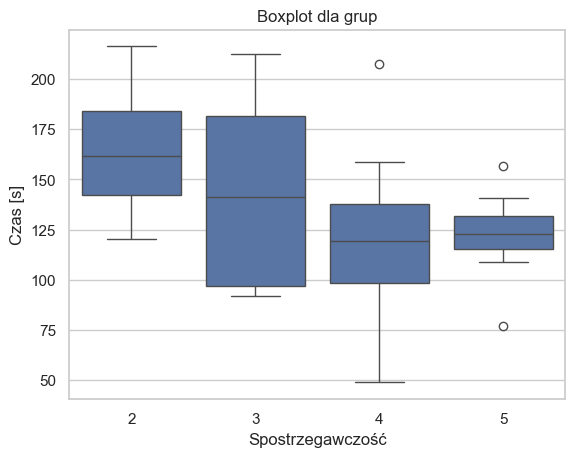

Zsumowane grafiki B:


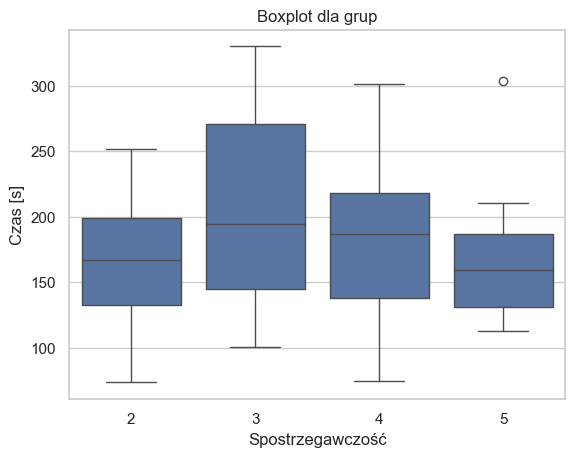

Zsumowane grafiki 1:


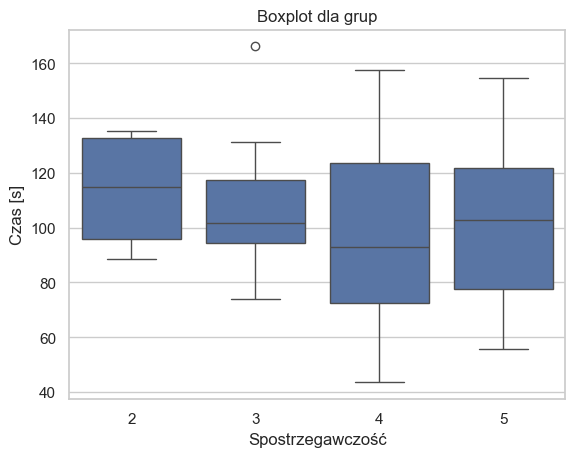

Zsumowane grafiki 2:


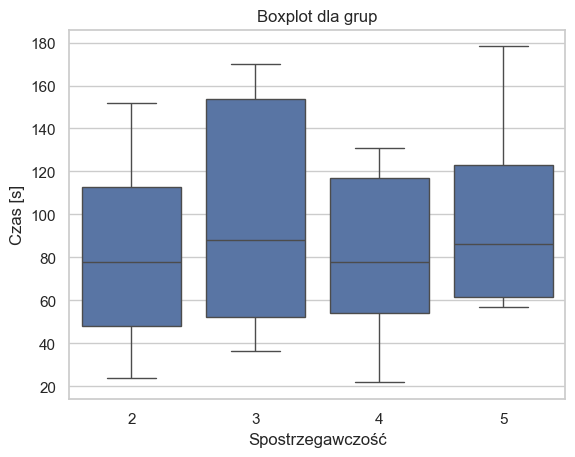

Zsumowane grafiki 3:


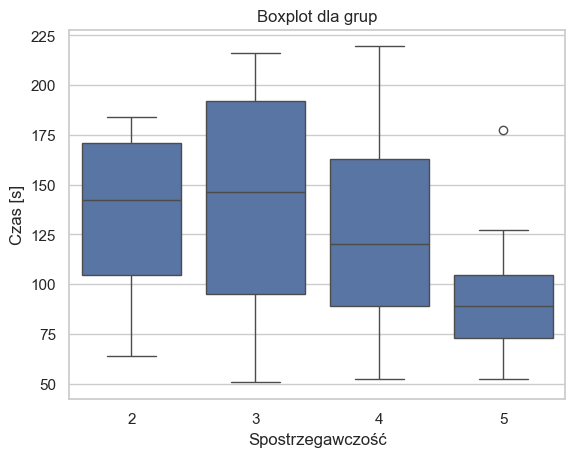

################################################
Czyt_ze_zroz
Zsumowane wszystkie grafiki:


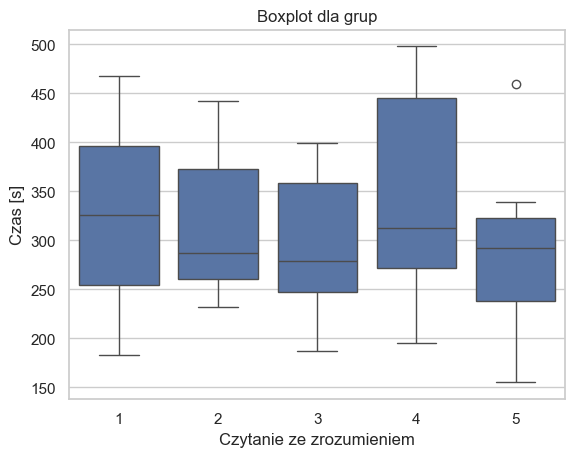

Zsumowane grafiki A:


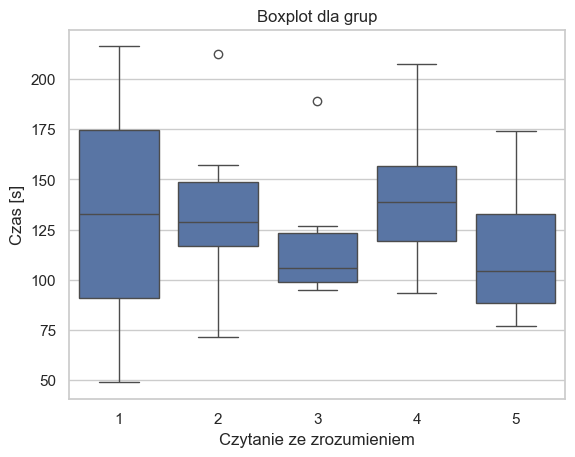

Zsumowane grafiki B:


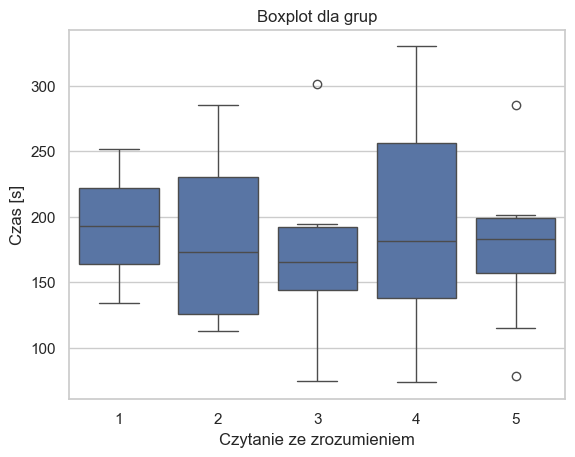

Zsumowane grafiki 1:


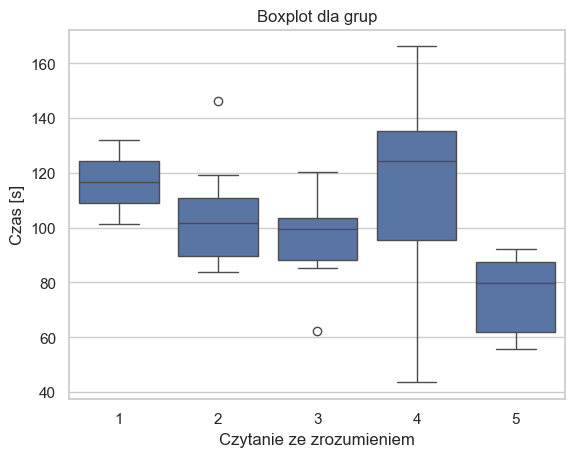

Zsumowane grafiki 2:


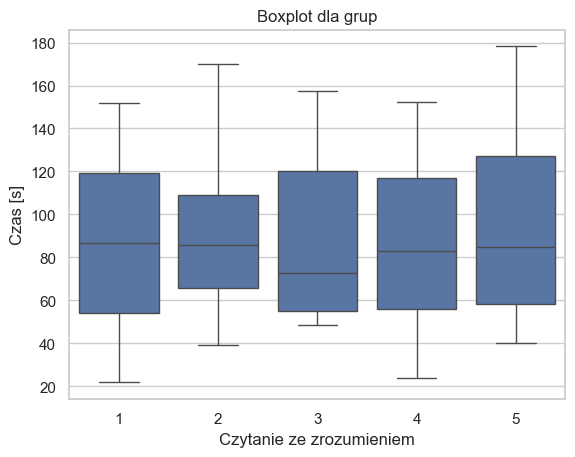

Zsumowane grafiki 3:


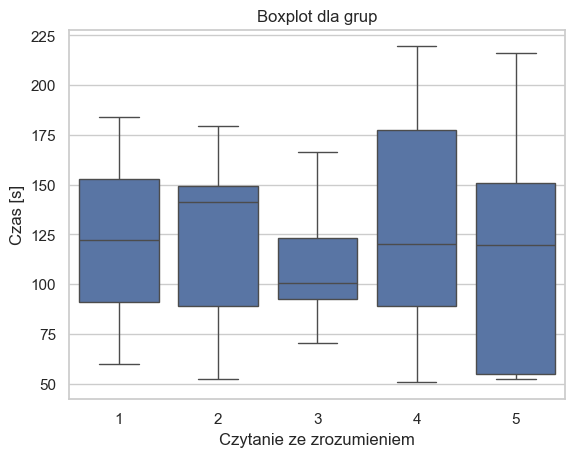

################################################
Wzrokowiec
Zsumowane wszystkie grafiki:


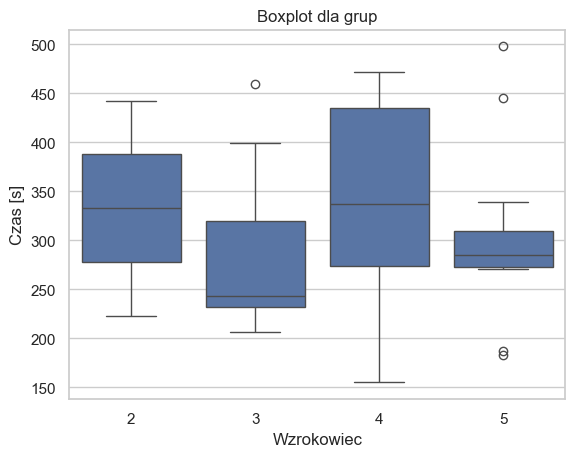

Zsumowane grafiki A:


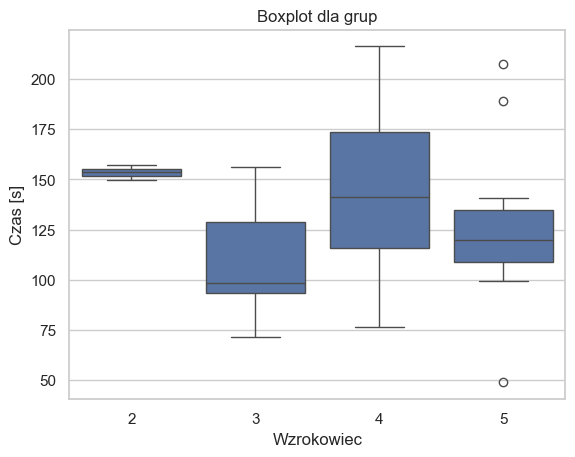

Zsumowane grafiki B:


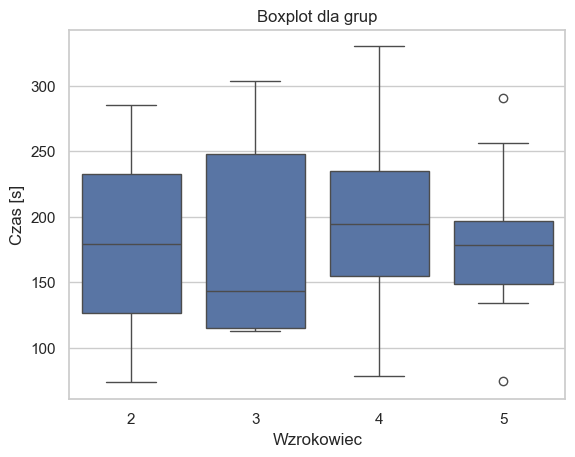

Zsumowane grafiki 1:


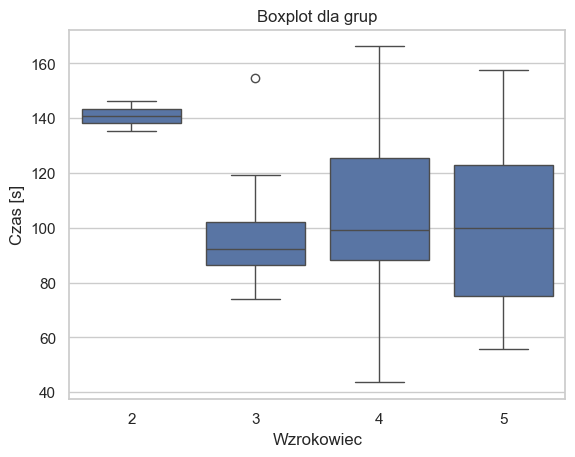

Zsumowane grafiki 2:


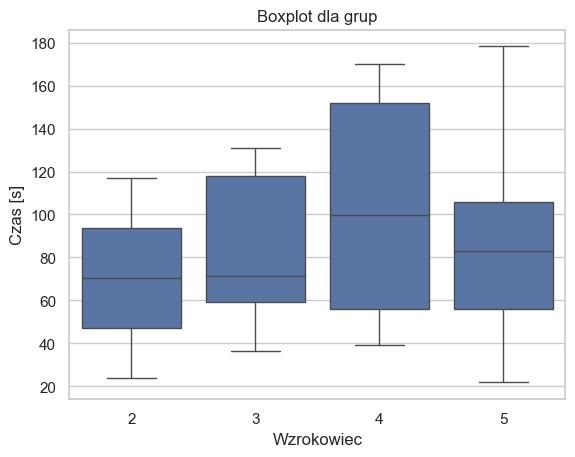

Zsumowane grafiki 3:


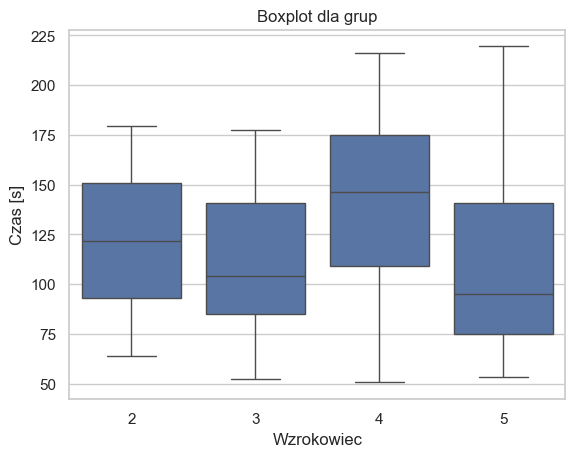

################################################
Słuchowiec
Zsumowane wszystkie grafiki:


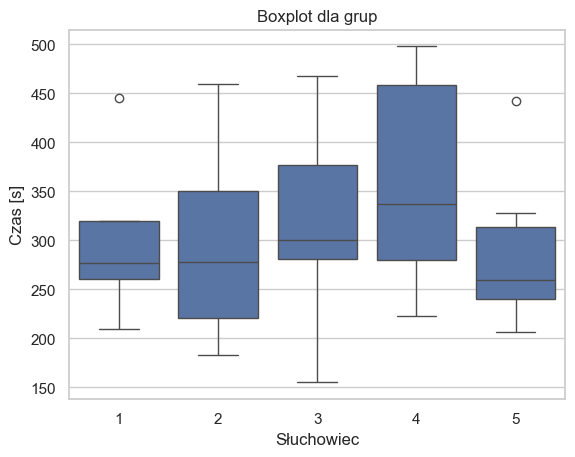

Zsumowane grafiki A:


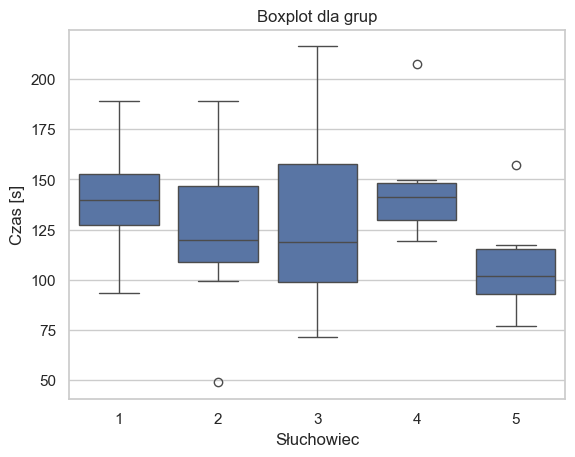

Zsumowane grafiki B:


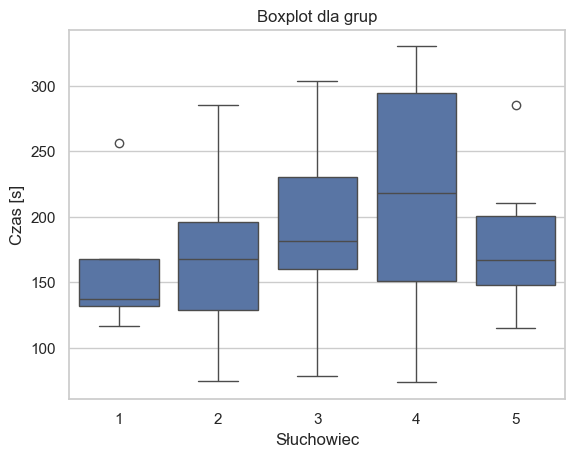

Zsumowane grafiki 1:


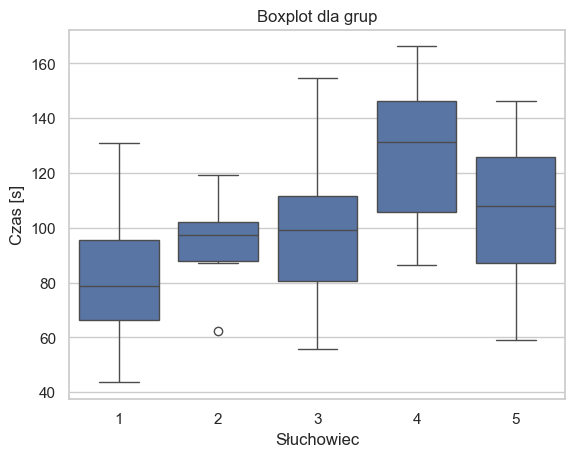

Zsumowane grafiki 2:


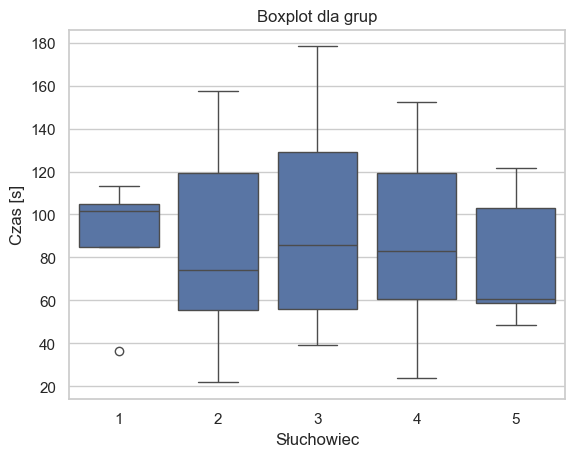

Zsumowane grafiki 3:


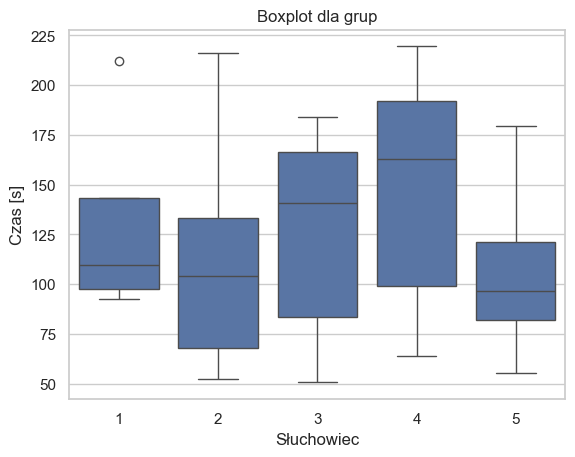

################################################
Kinestetyk
Zsumowane wszystkie grafiki:


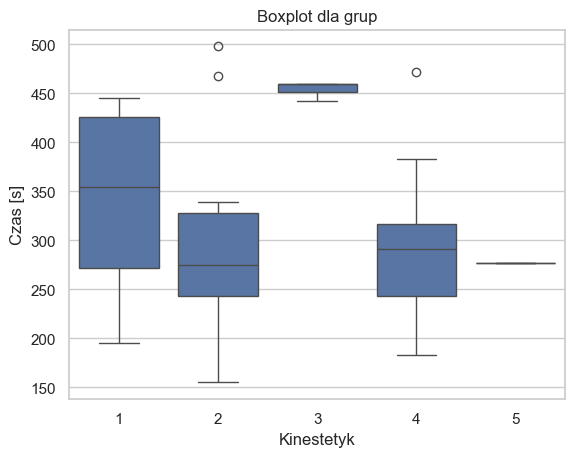

Zsumowane grafiki A:


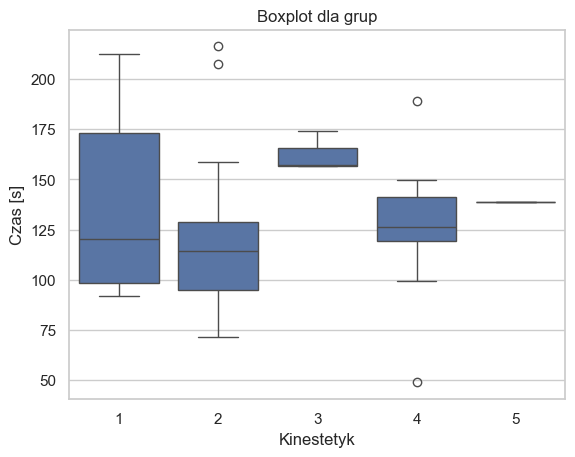

Zsumowane grafiki B:


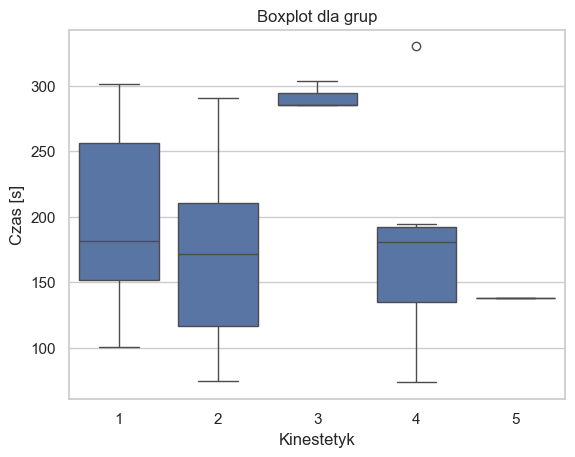

Zsumowane grafiki 1:


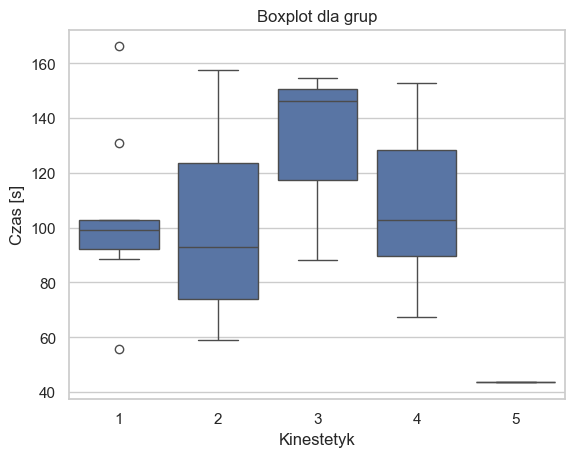

Zsumowane grafiki 2:


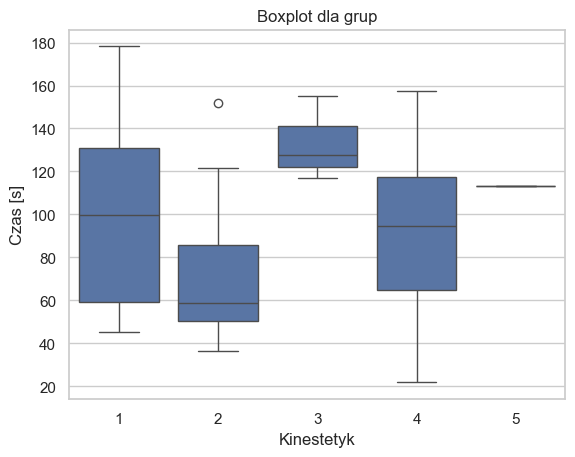

Zsumowane grafiki 3:


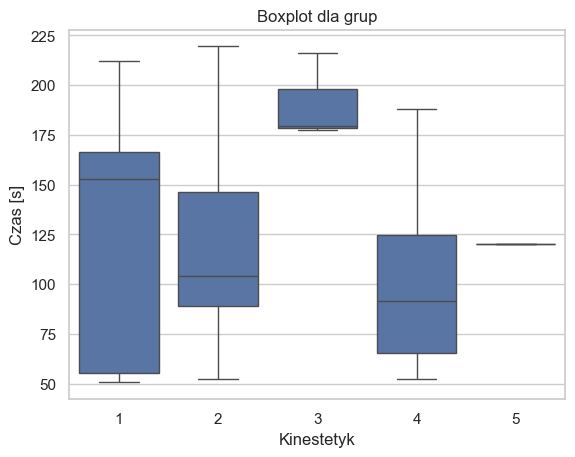

################################################
MAT
Zsumowane wszystkie grafiki:


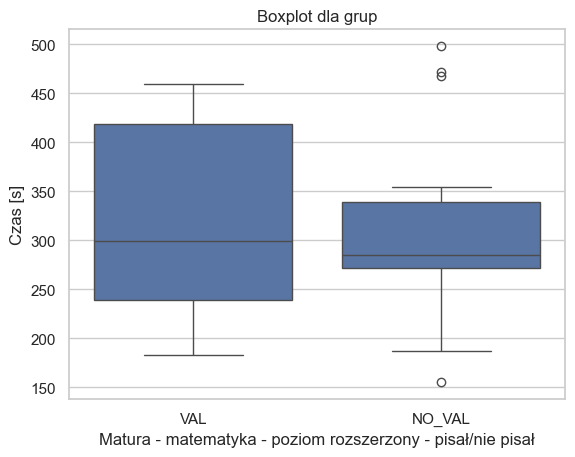

Zsumowane grafiki A:


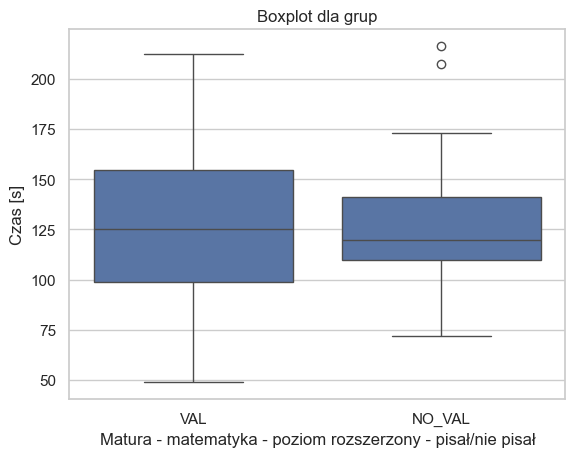

Zsumowane grafiki B:


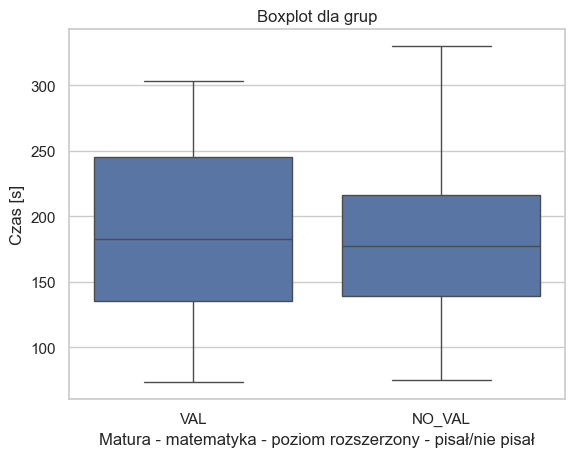

Zsumowane grafiki 1:


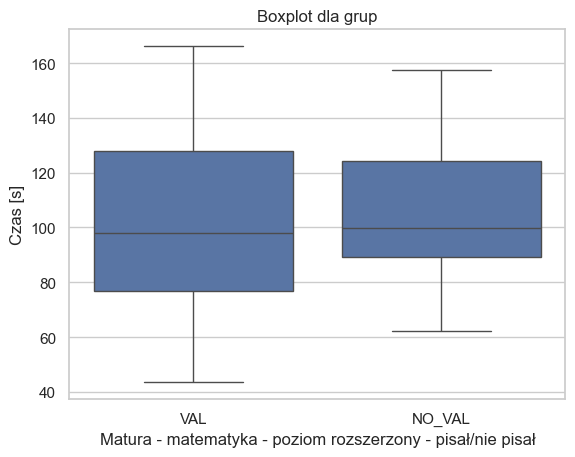

Zsumowane grafiki 2:


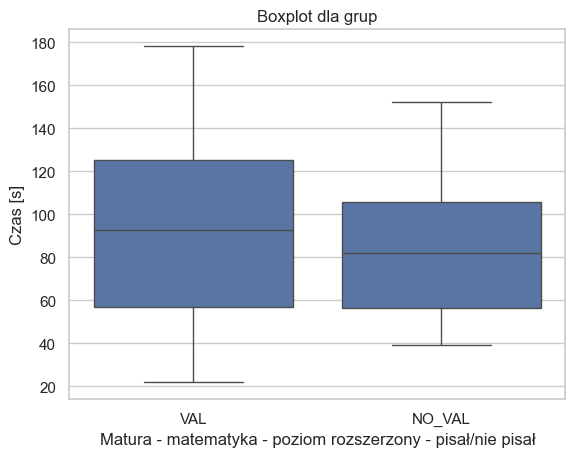

Zsumowane grafiki 3:


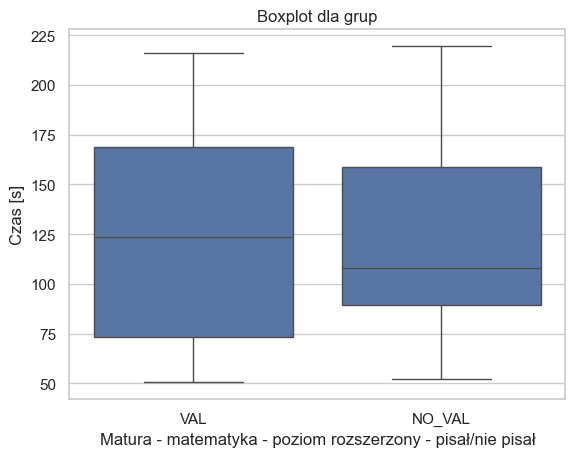

################################################
POL
Zsumowane wszystkie grafiki:


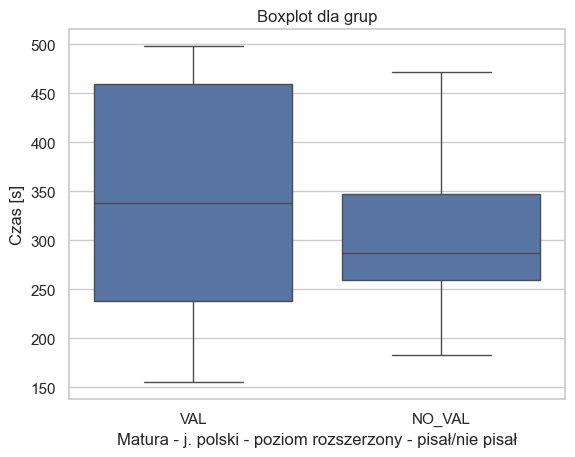

Zsumowane grafiki A:


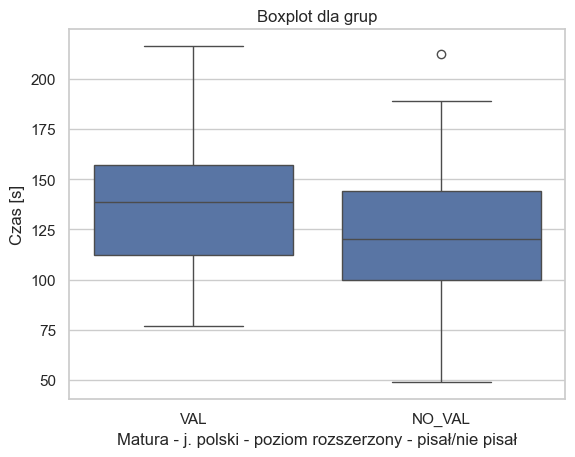

Zsumowane grafiki B:


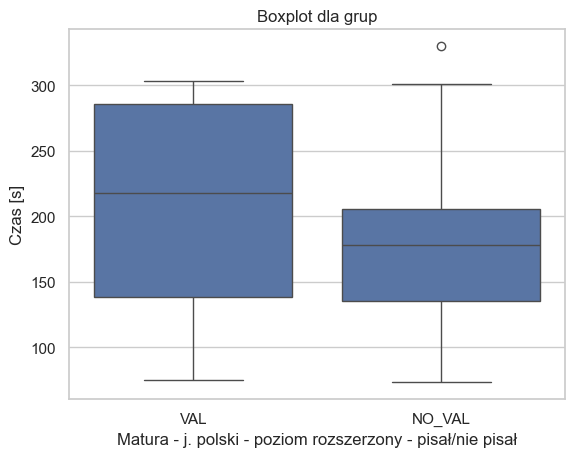

Zsumowane grafiki 1:


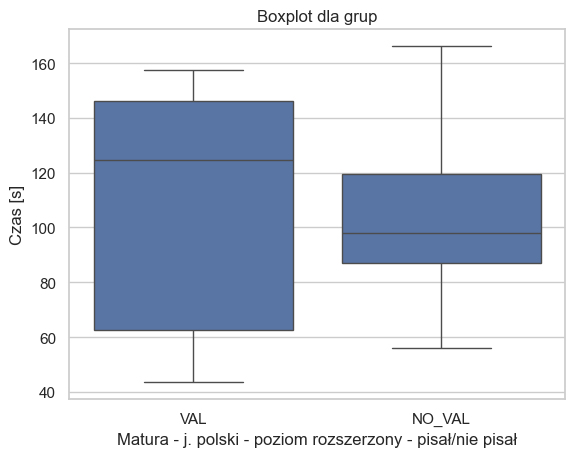

Zsumowane grafiki 2:


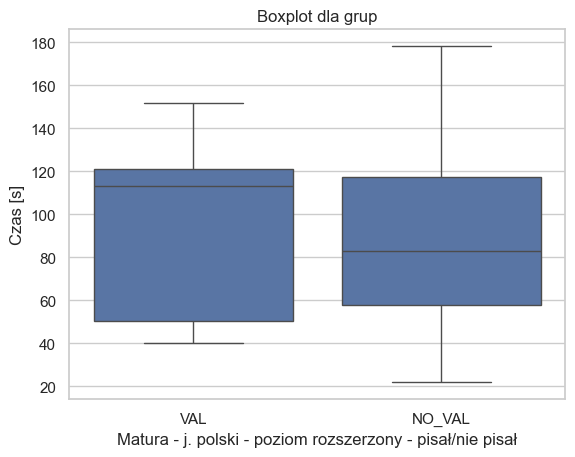

Zsumowane grafiki 3:


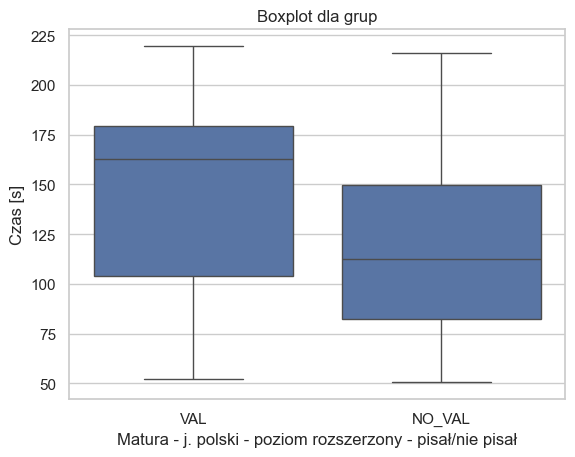

################################################
HIST
Zsumowane wszystkie grafiki:


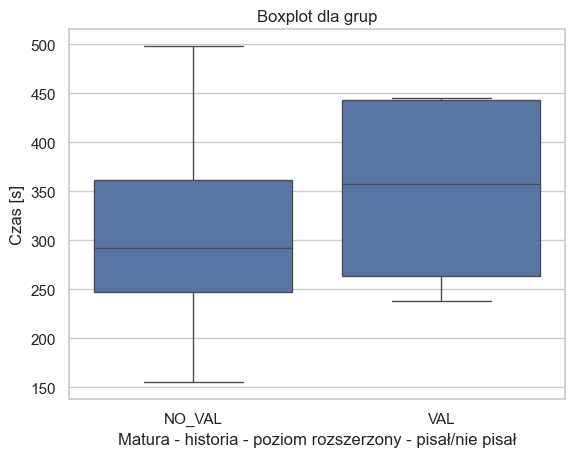

Zsumowane grafiki A:


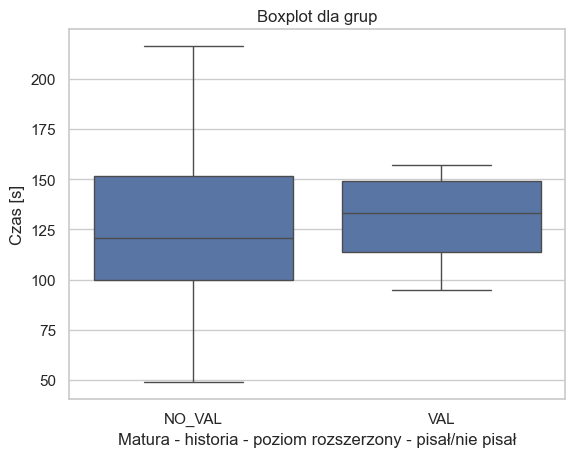

Zsumowane grafiki B:


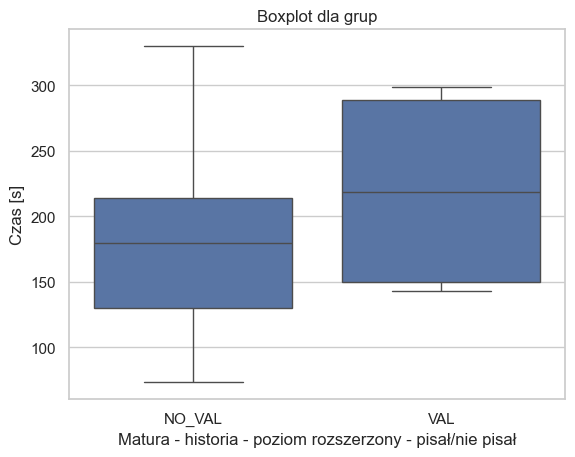

Zsumowane grafiki 1:


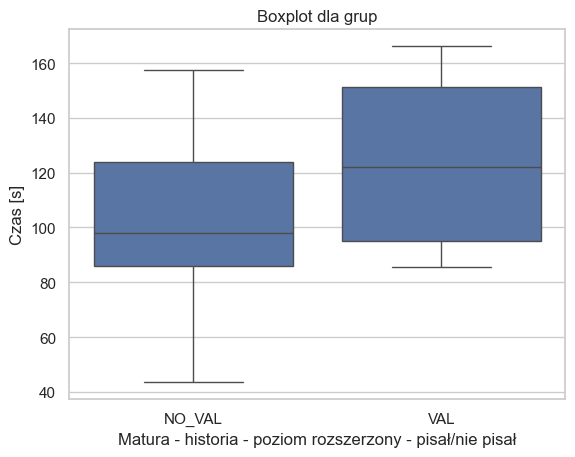

Zsumowane grafiki 2:


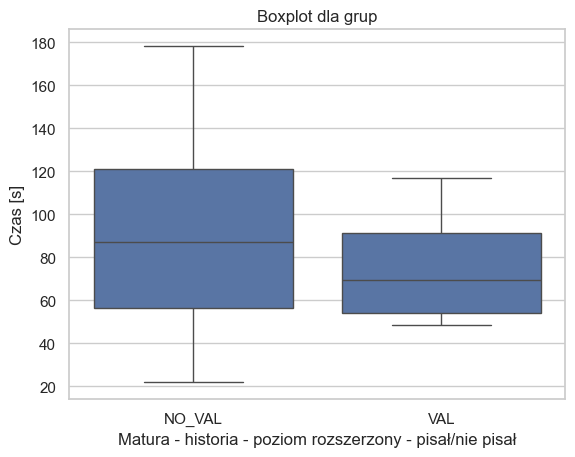

Zsumowane grafiki 3:


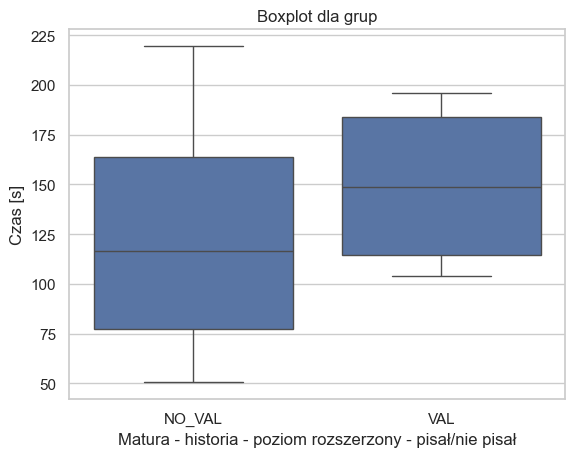

################################################
Typ_uczenia
Zsumowane wszystkie grafiki:


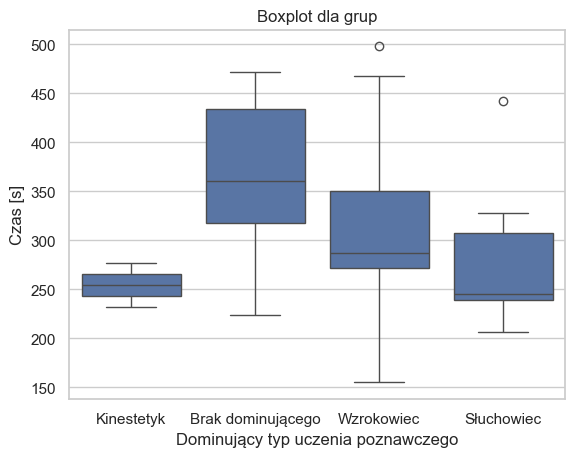

Zsumowane grafiki A:


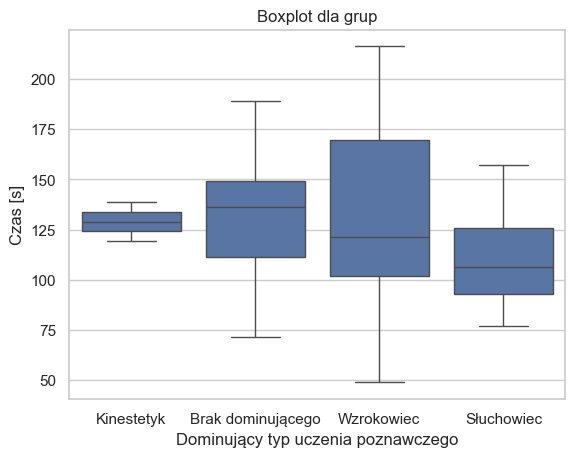

Zsumowane grafiki B:


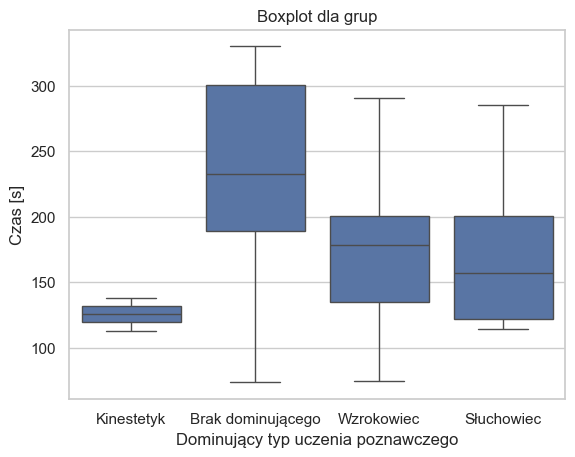

Zsumowane grafiki 1:


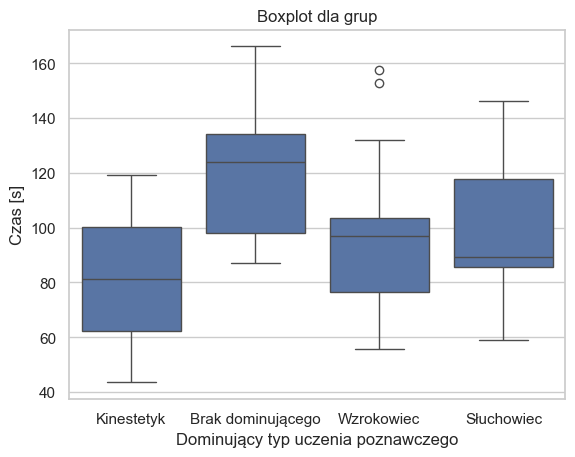

Zsumowane grafiki 2:


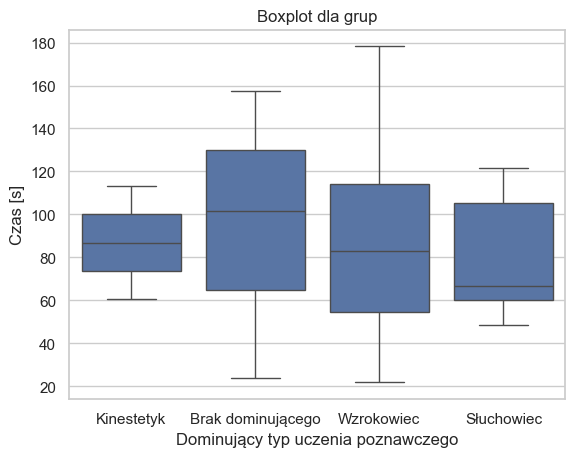

Zsumowane grafiki 3:


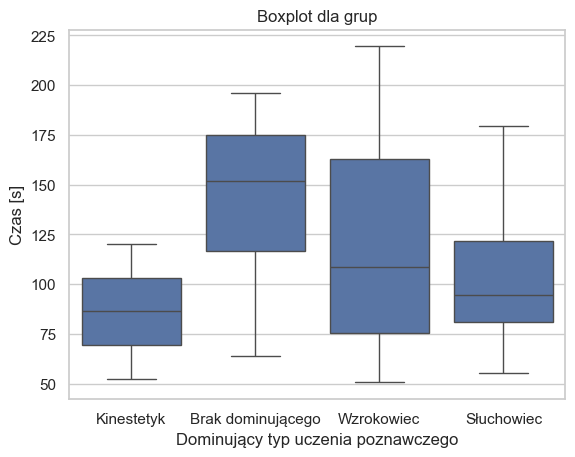

In [6]:
for col in columns:
    print('################################################')
    print(col)
    for i, df in enumerate(dfs):
        print(names[i+1])
        plot_multi_boxplot(df, col, 'time', names_columns[col], 'Czas [s]')

##############################################################
Płeć
-------------------------------------
1a


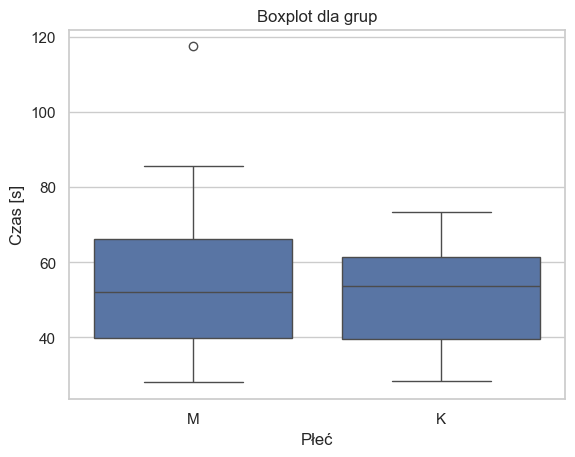

-------------------------------------
1b


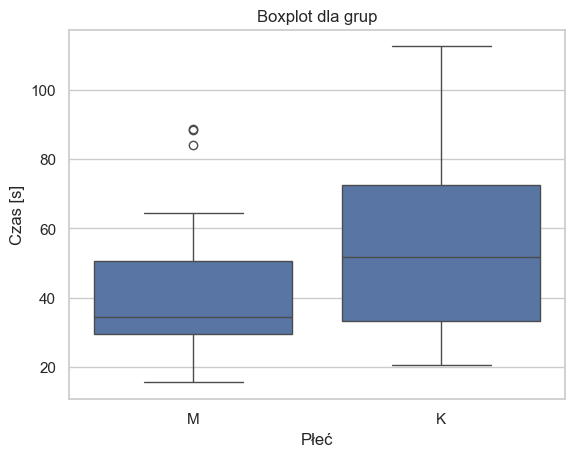

-------------------------------------
2a


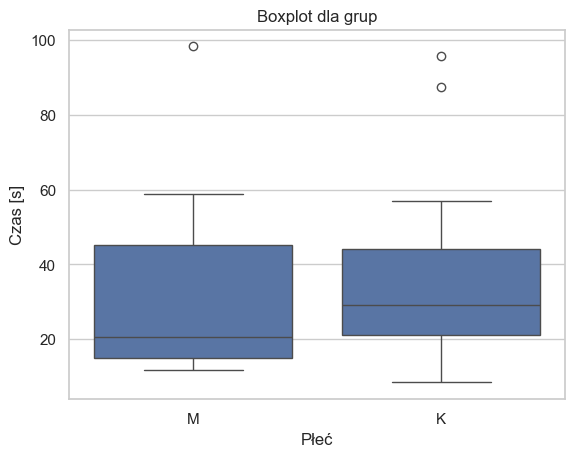

-------------------------------------
2b


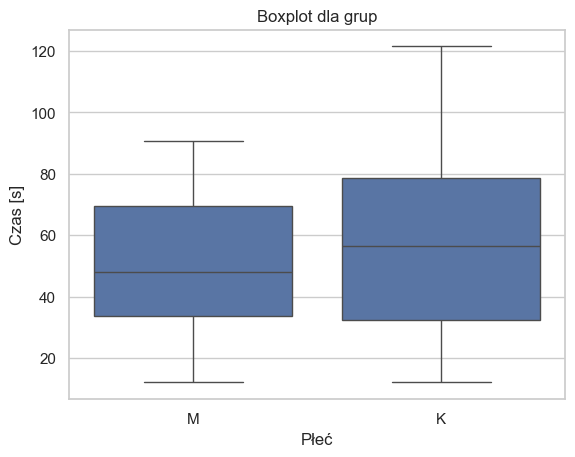

-------------------------------------
3a


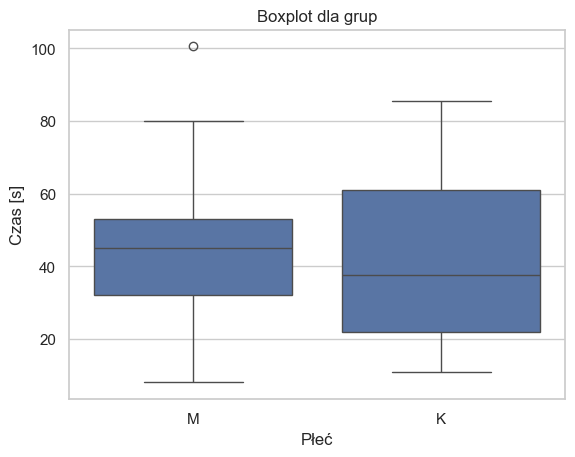

-------------------------------------
3b


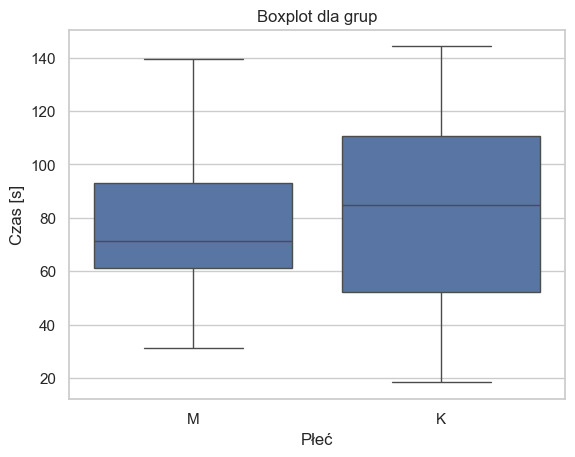

##############################################################
Rok_urodzenia
-------------------------------------
1a


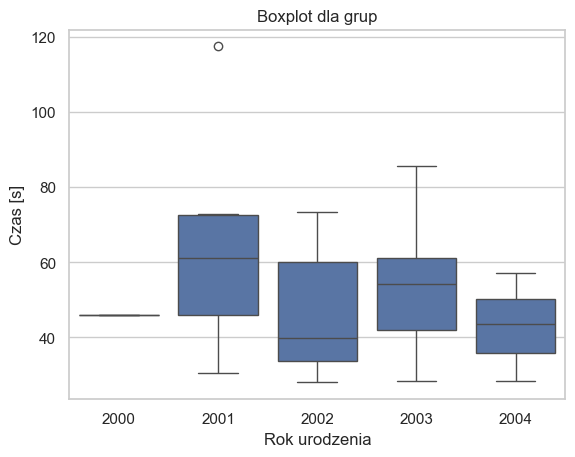

-------------------------------------
1b


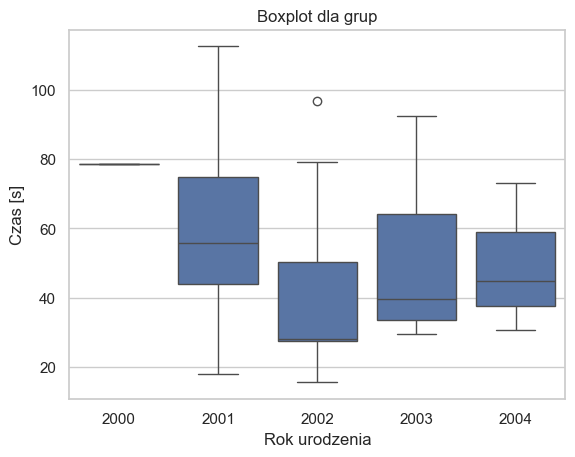

-------------------------------------
2a


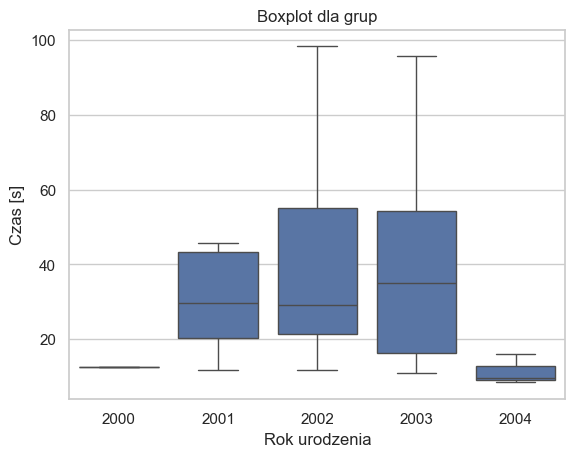

-------------------------------------
2b


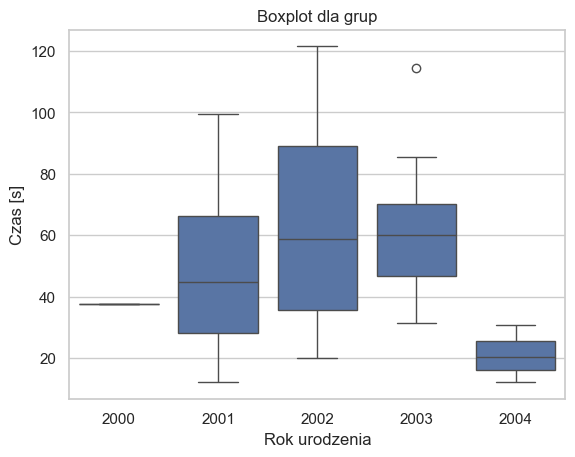

-------------------------------------
3a


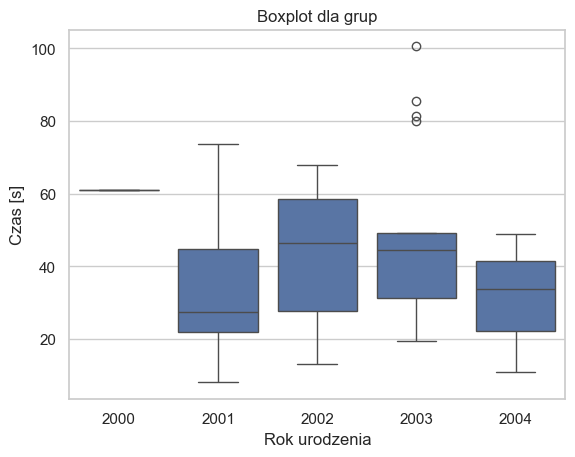

-------------------------------------
3b


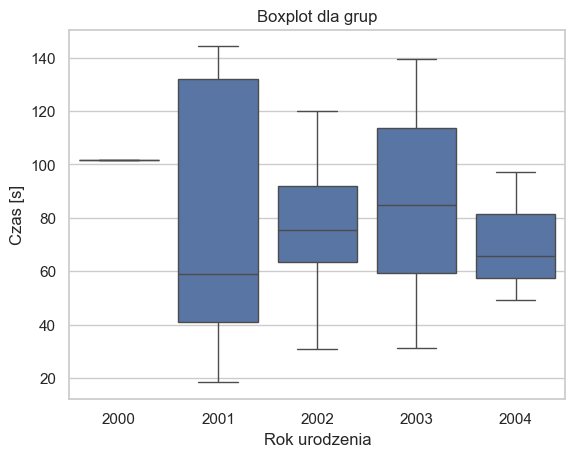

##############################################################
Kierunek_studiów
-------------------------------------
1a


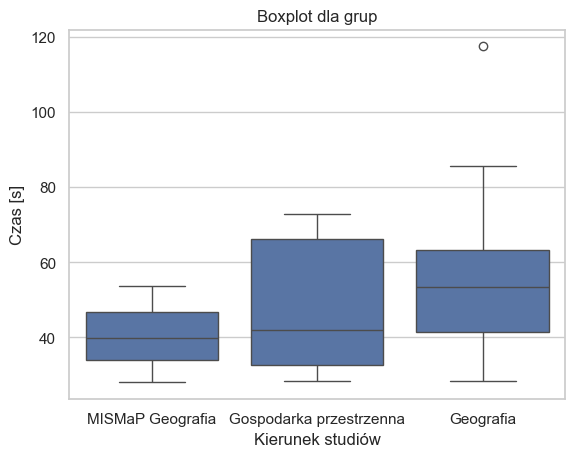

-------------------------------------
1b


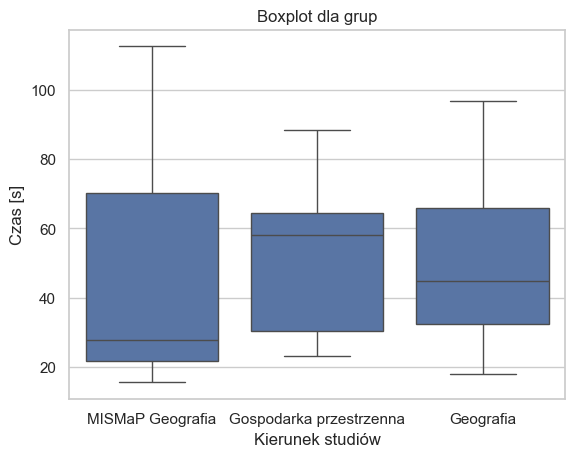

-------------------------------------
2a


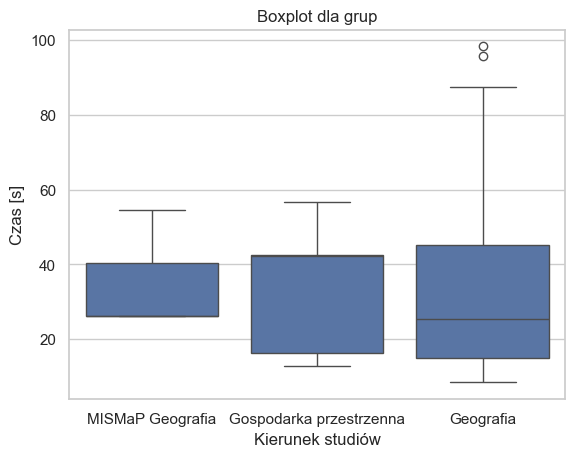

-------------------------------------
2b


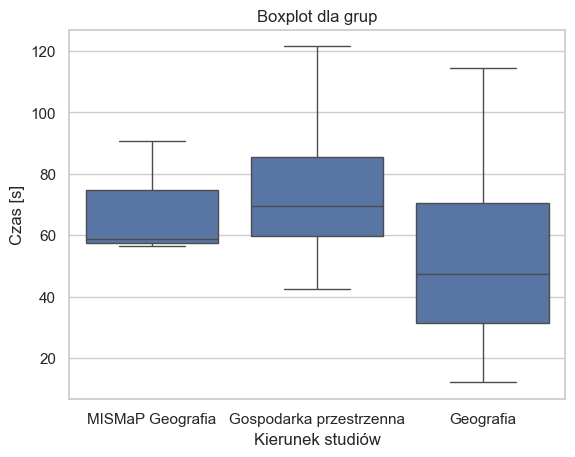

-------------------------------------
3a


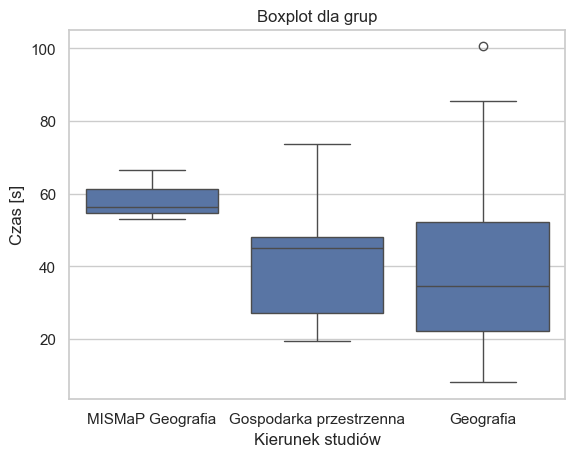

-------------------------------------
3b


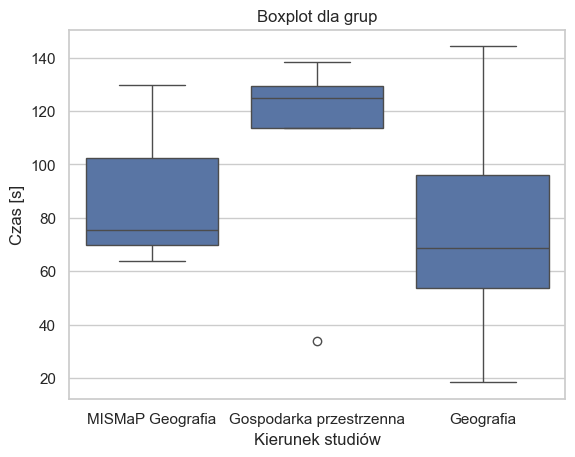

##############################################################
Rok_studiów
-------------------------------------
1a


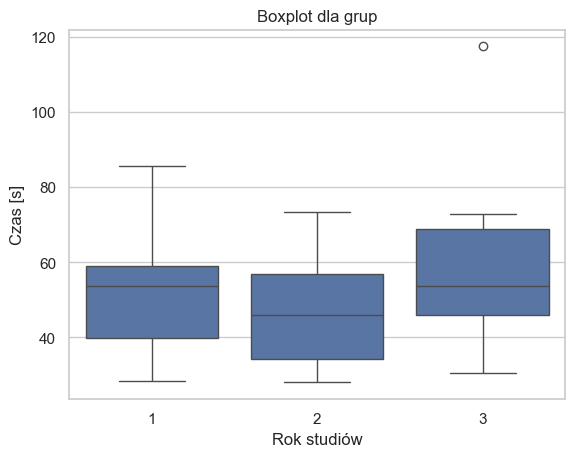

-------------------------------------
1b


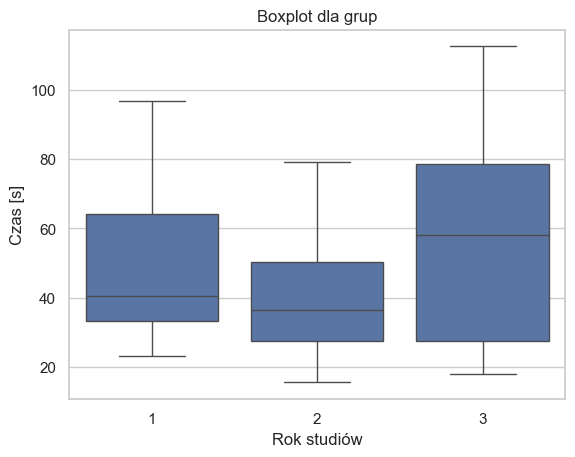

-------------------------------------
2a


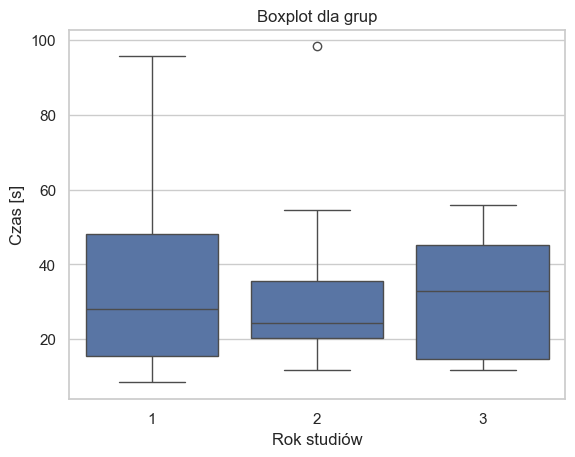

-------------------------------------
2b


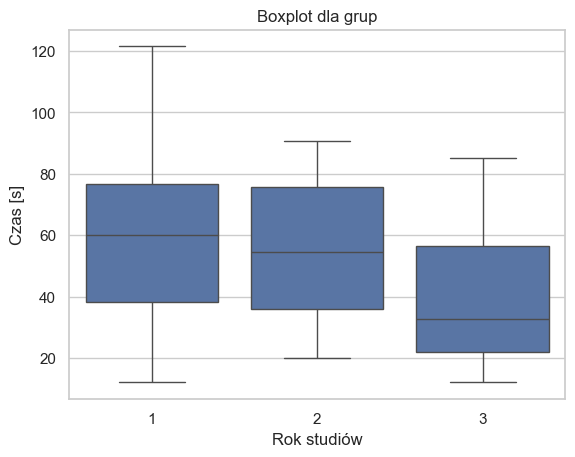

-------------------------------------
3a


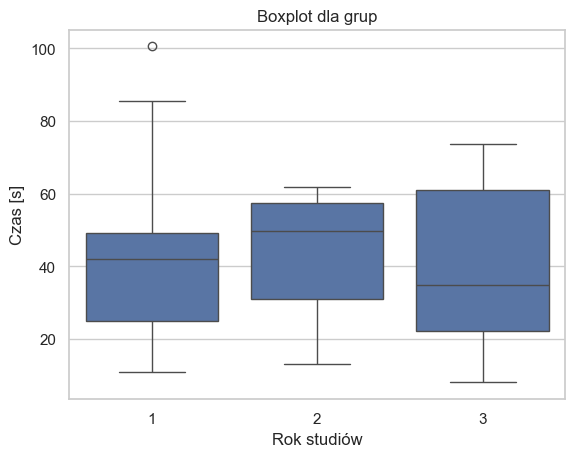

-------------------------------------
3b


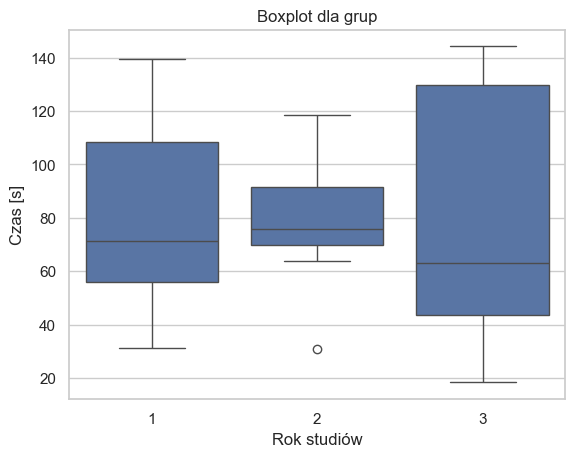

##############################################################
Specjalność
-------------------------------------
1a


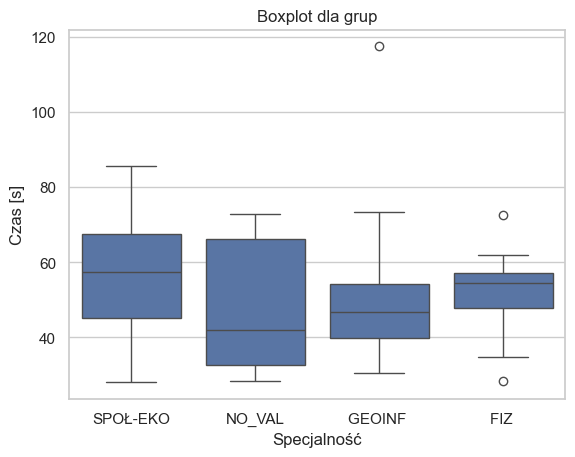

-------------------------------------
1b


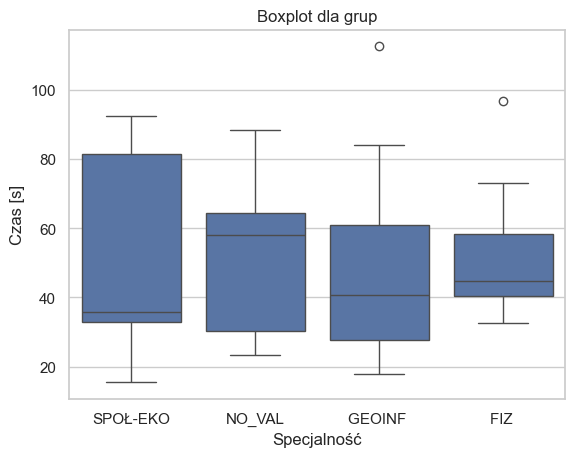

-------------------------------------
2a


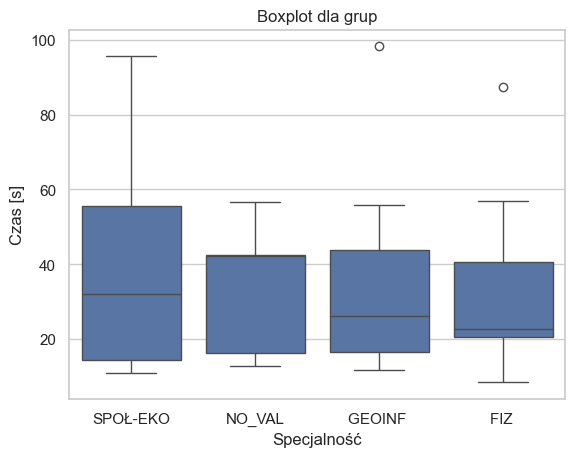

-------------------------------------
2b


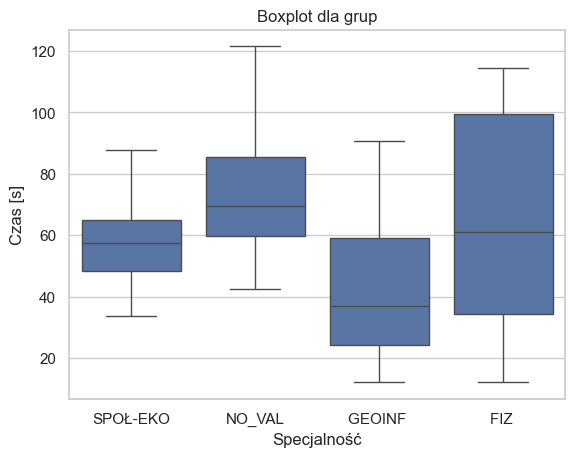

-------------------------------------
3a


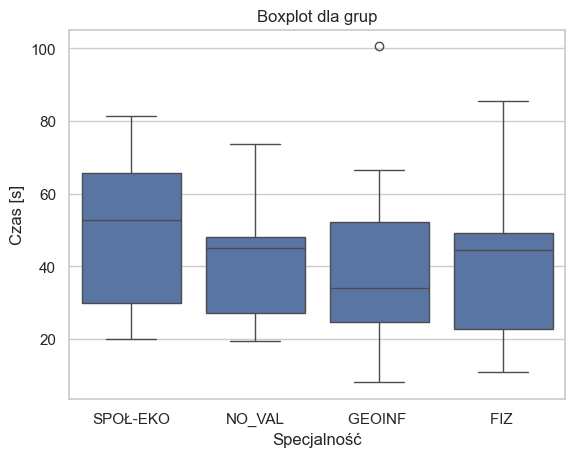

-------------------------------------
3b


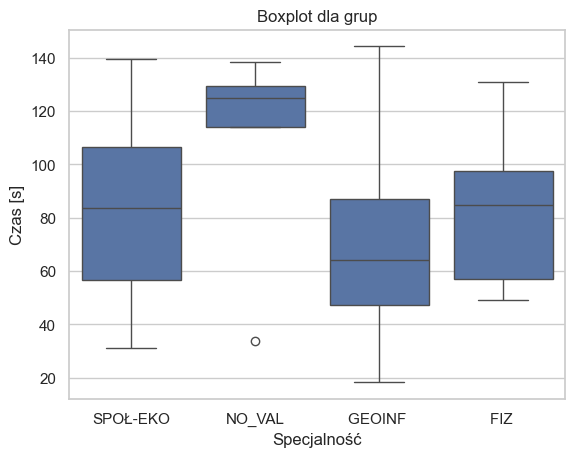

##############################################################
Wady_wzroku
-------------------------------------
1a


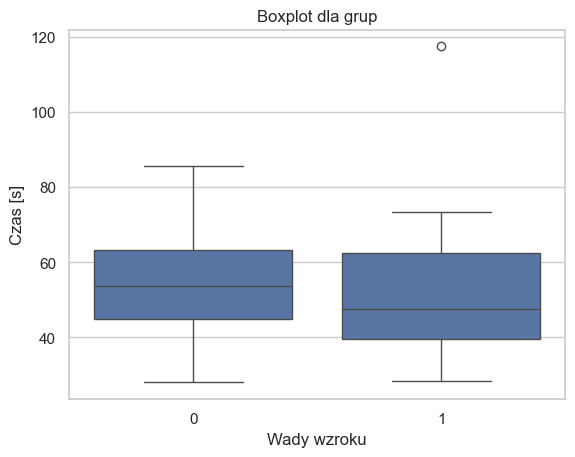

-------------------------------------
1b


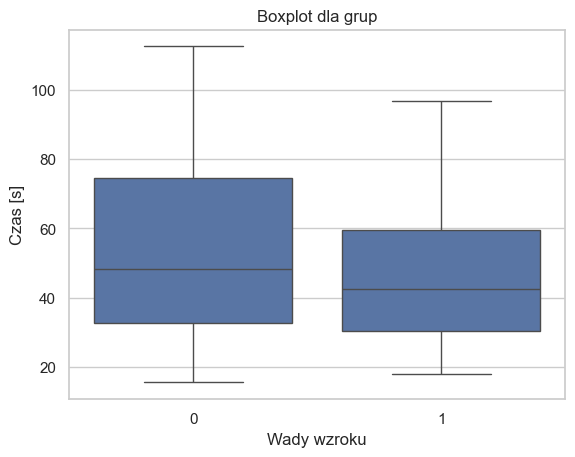

-------------------------------------
2a


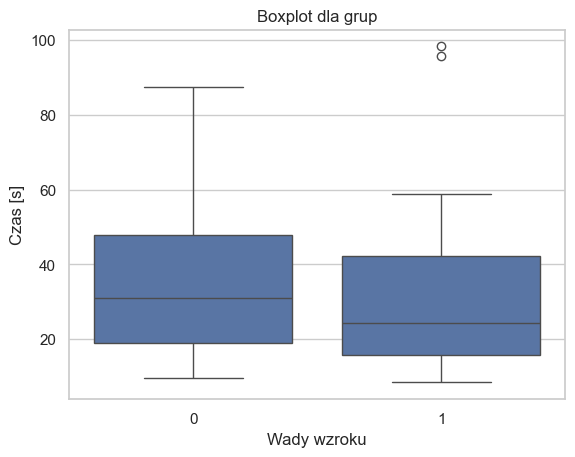

-------------------------------------
2b


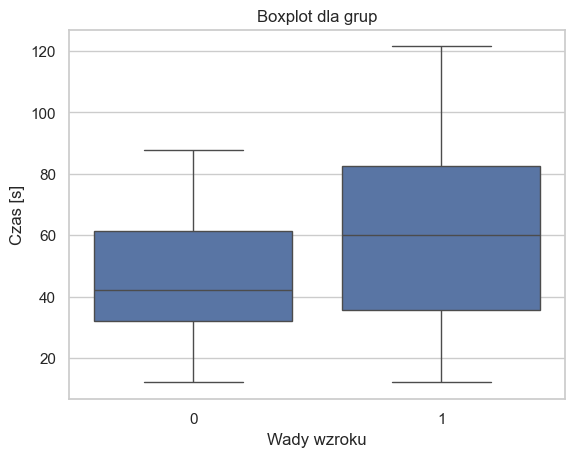

-------------------------------------
3a


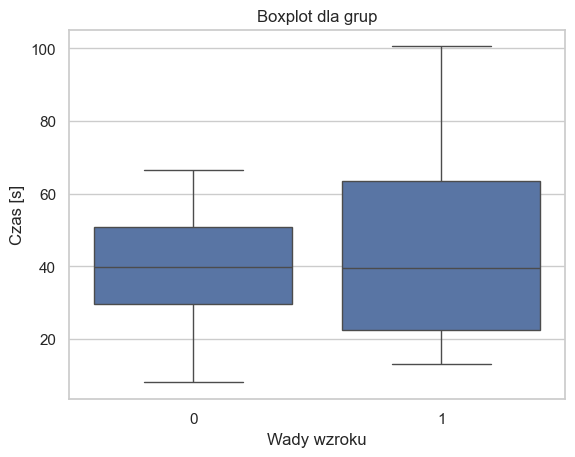

-------------------------------------
3b


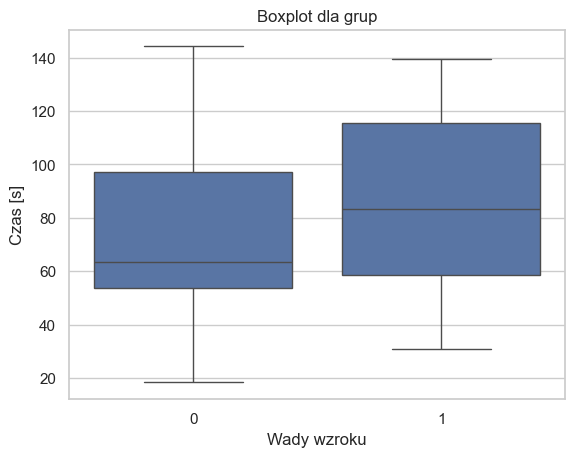

##############################################################
Ilość_snu
-------------------------------------
1a


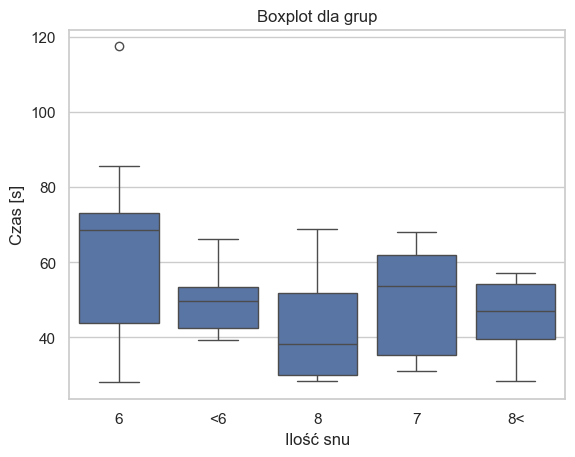

-------------------------------------
1b


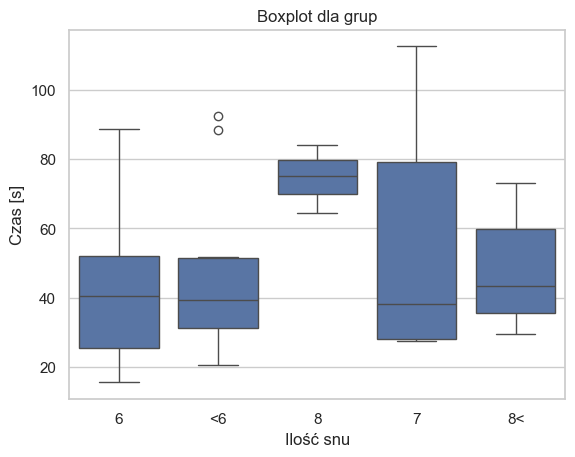

-------------------------------------
2a


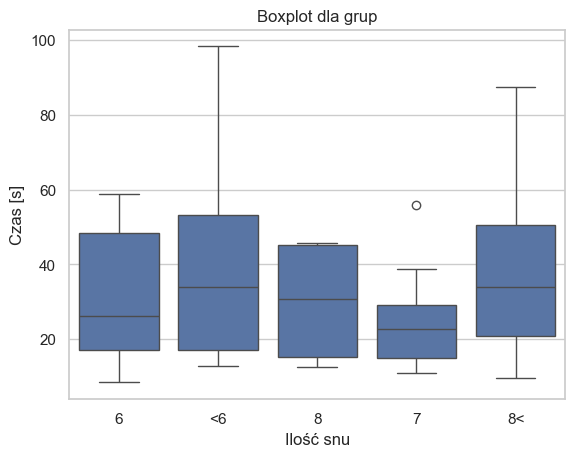

-------------------------------------
2b


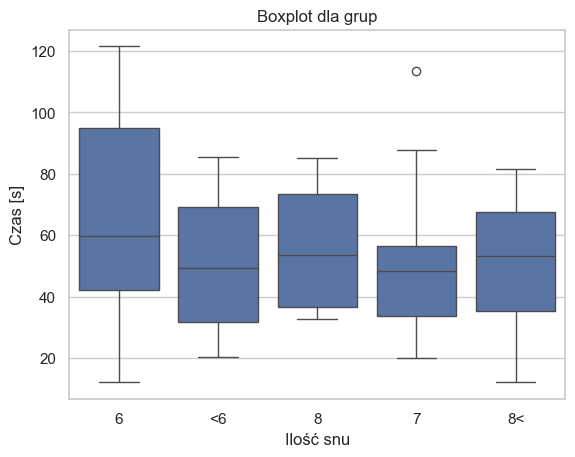

-------------------------------------
3a


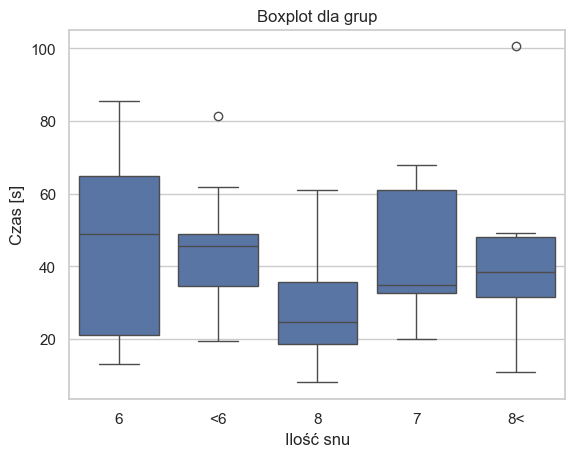

-------------------------------------
3b


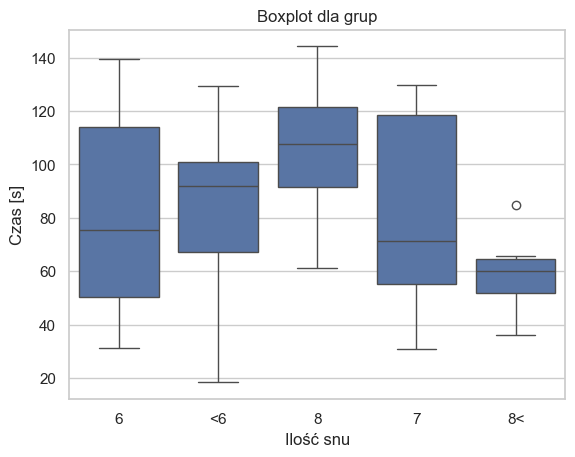

##############################################################
JP_podst
-------------------------------------
1a


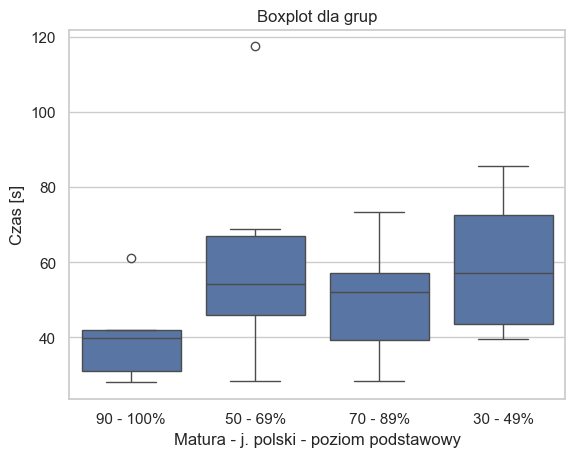

-------------------------------------
1b


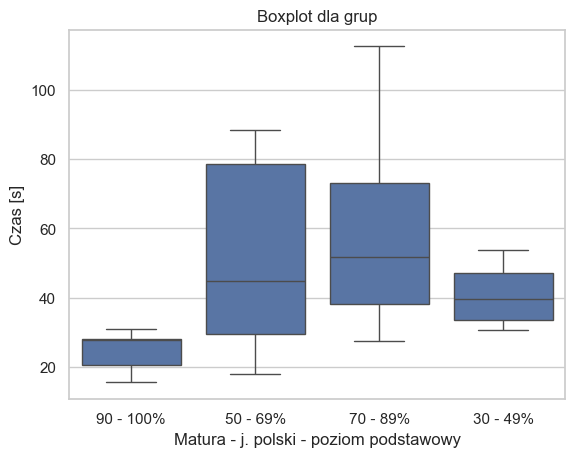

-------------------------------------
2a


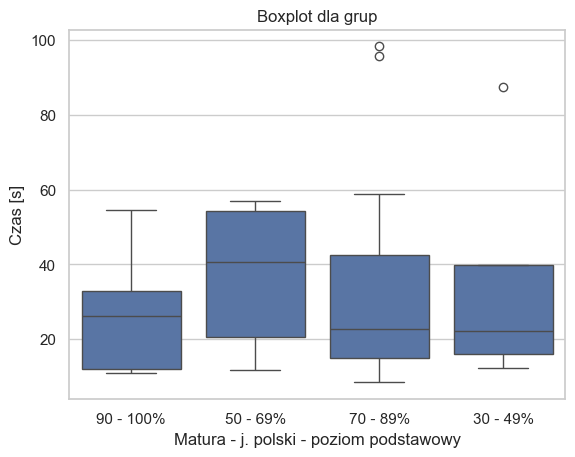

-------------------------------------
2b


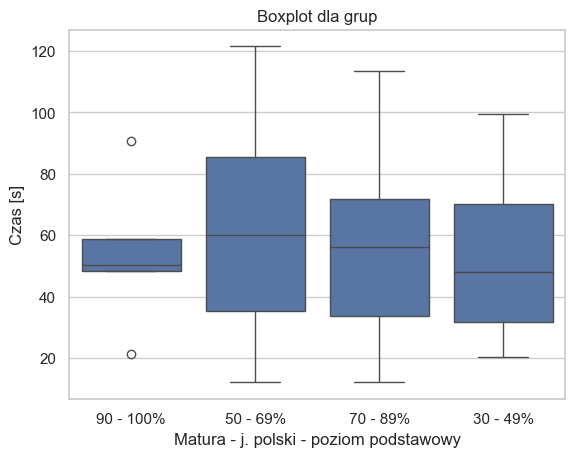

-------------------------------------
3a


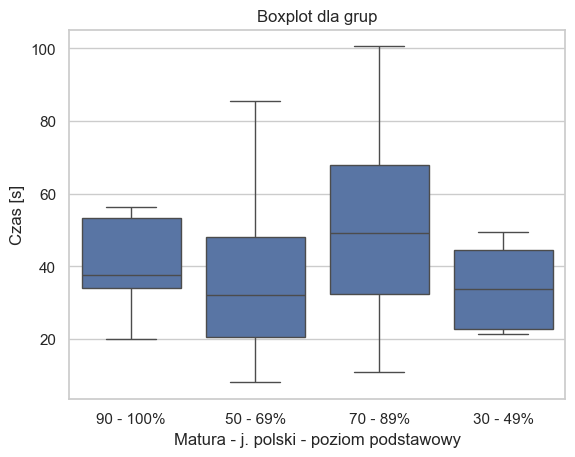

-------------------------------------
3b


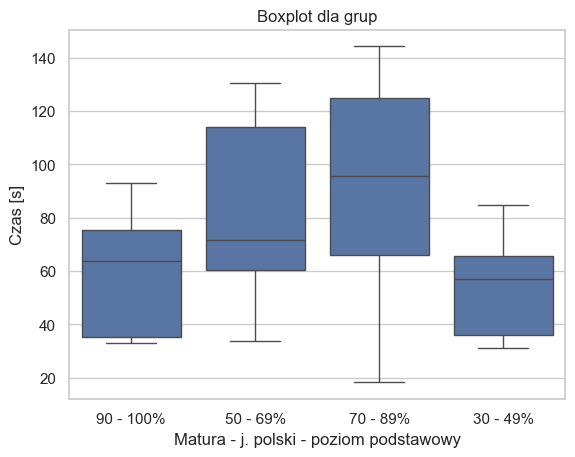

##############################################################
MAT_podst
-------------------------------------
1a


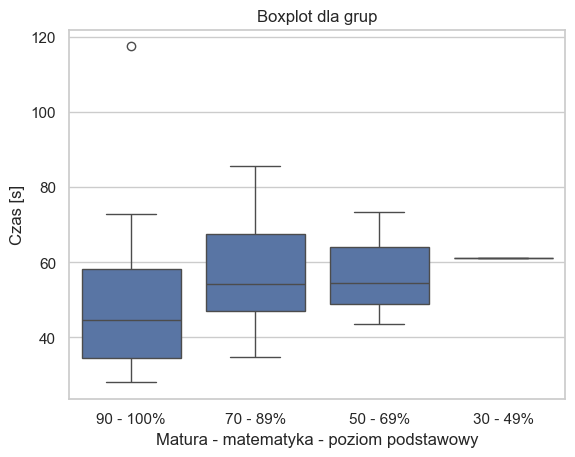

-------------------------------------
1b


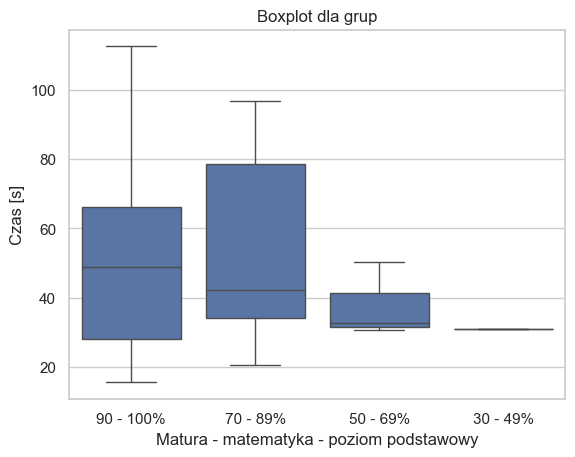

-------------------------------------
2a


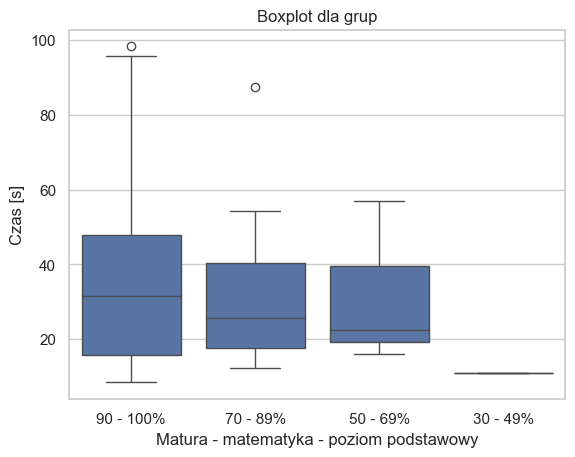

-------------------------------------
2b


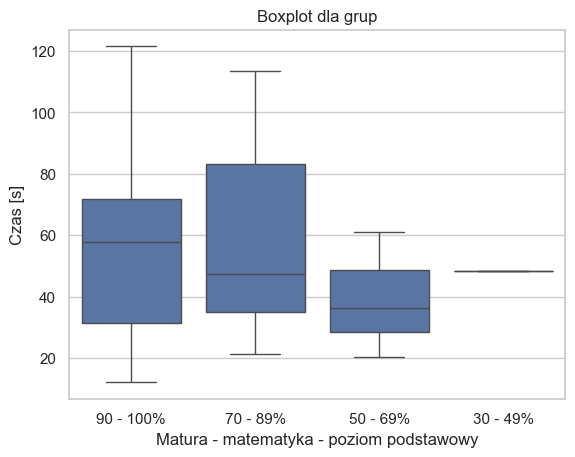

-------------------------------------
3a


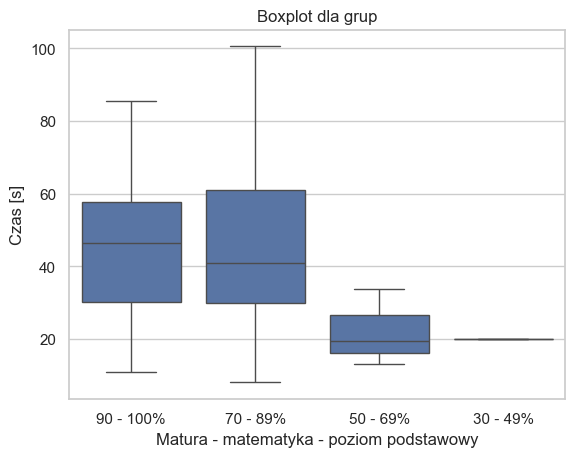

-------------------------------------
3b


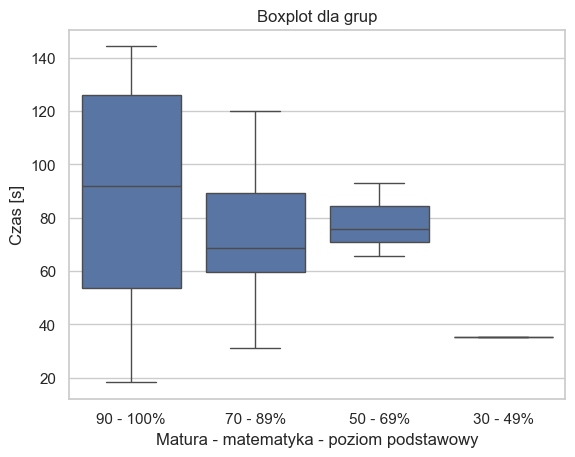

##############################################################
JP_roz
-------------------------------------
1a


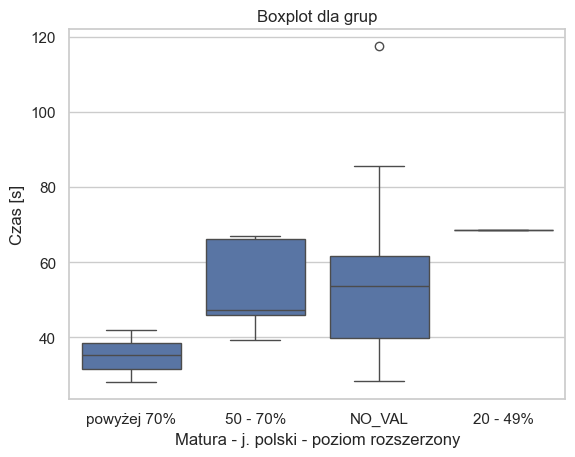

-------------------------------------
1b


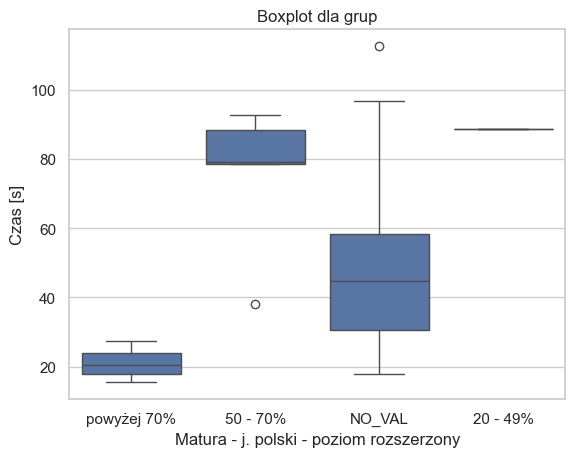

-------------------------------------
2a


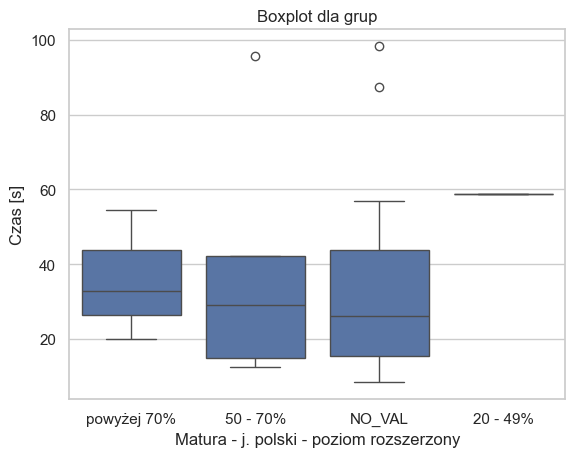

-------------------------------------
2b


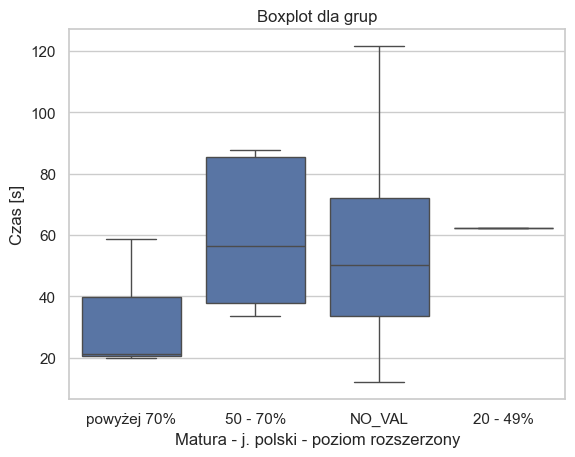

-------------------------------------
3a


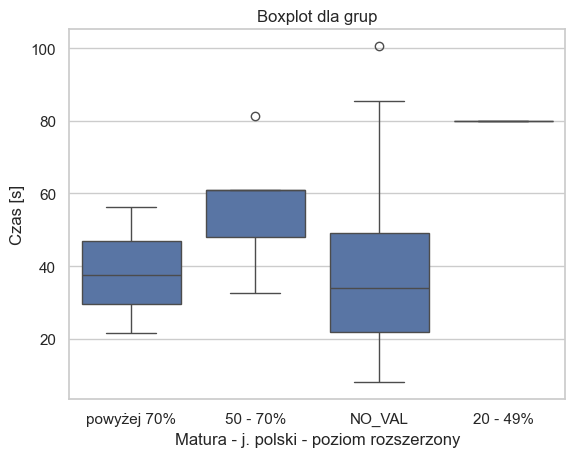

-------------------------------------
3b


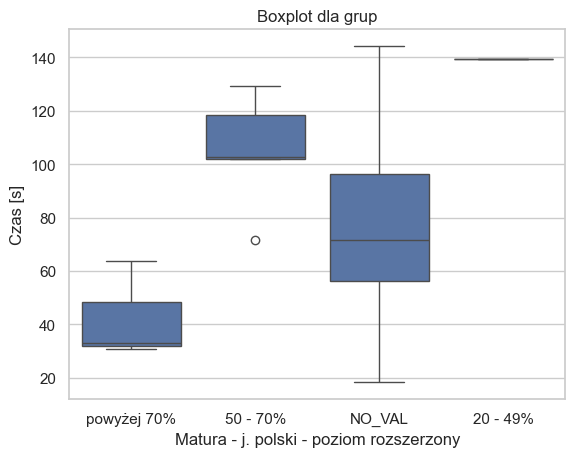

##############################################################
MAT_roz
-------------------------------------
1a


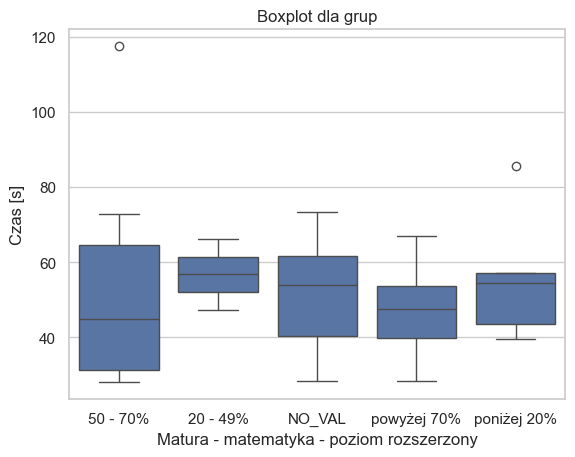

-------------------------------------
1b


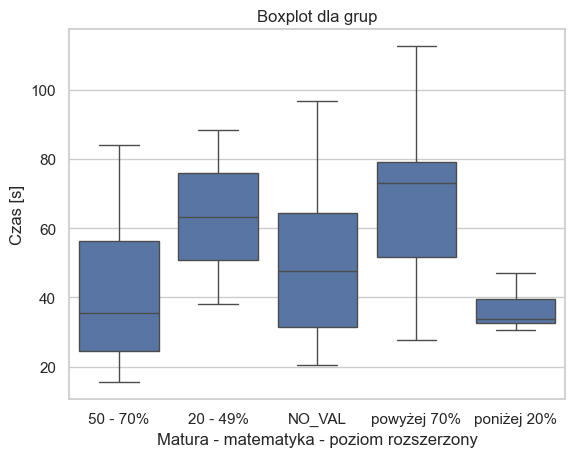

-------------------------------------
2a


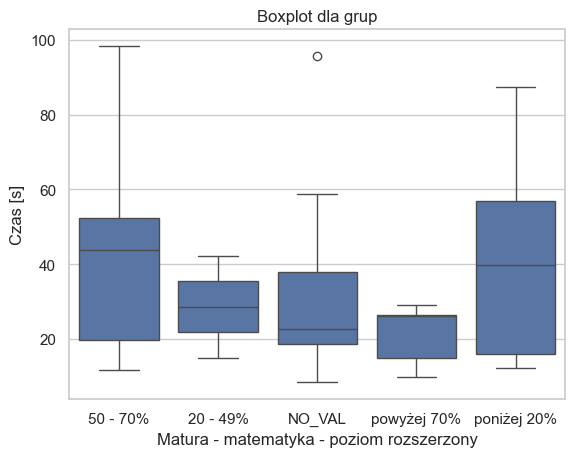

-------------------------------------
2b


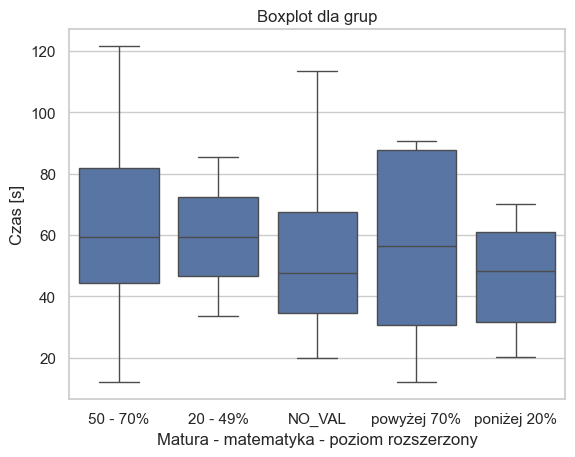

-------------------------------------
3a


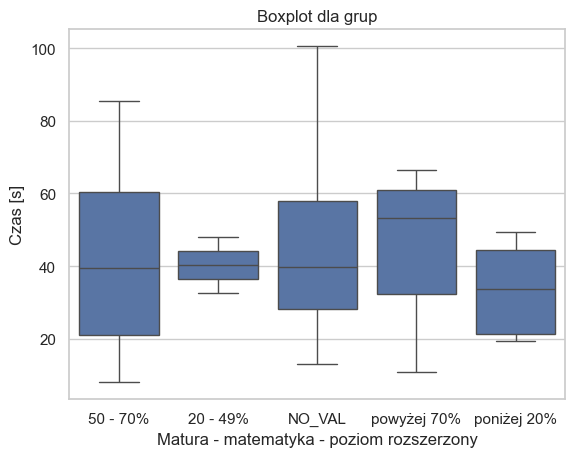

-------------------------------------
3b


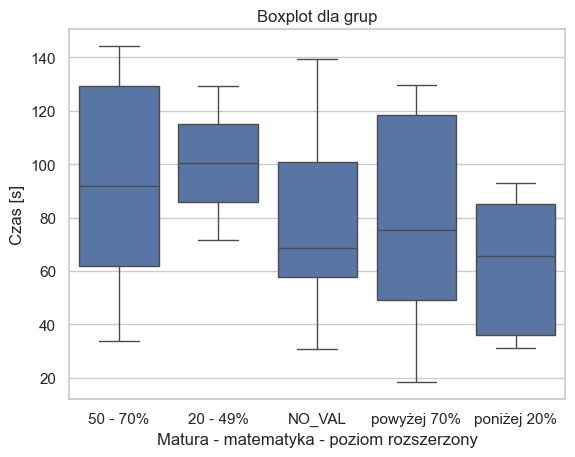

##############################################################
HIST_roz
-------------------------------------
1a


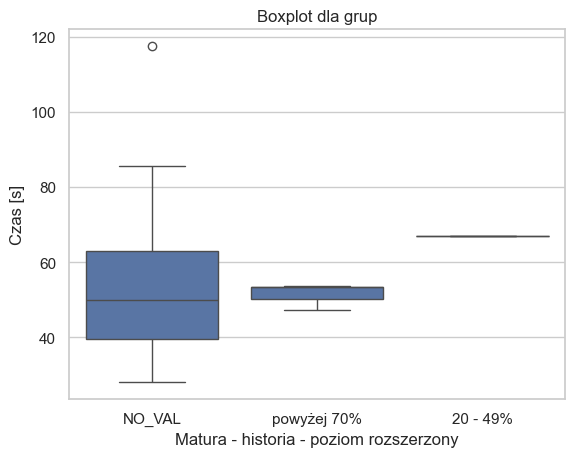

-------------------------------------
1b


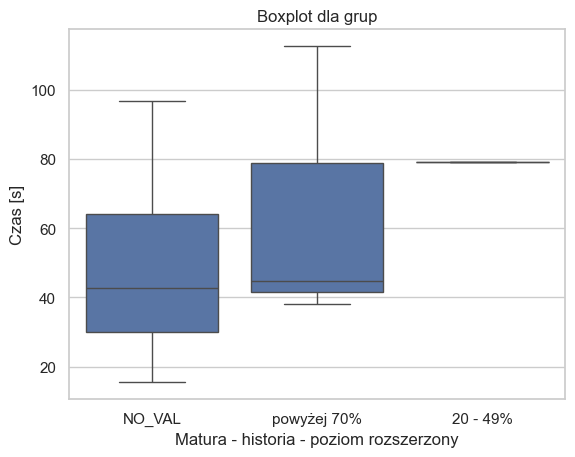

-------------------------------------
2a


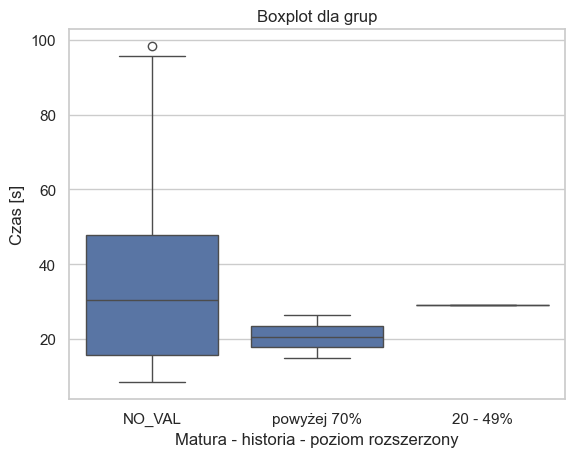

-------------------------------------
2b


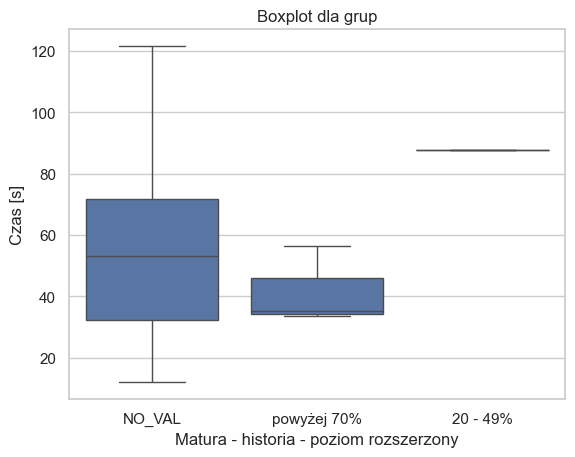

-------------------------------------
3a


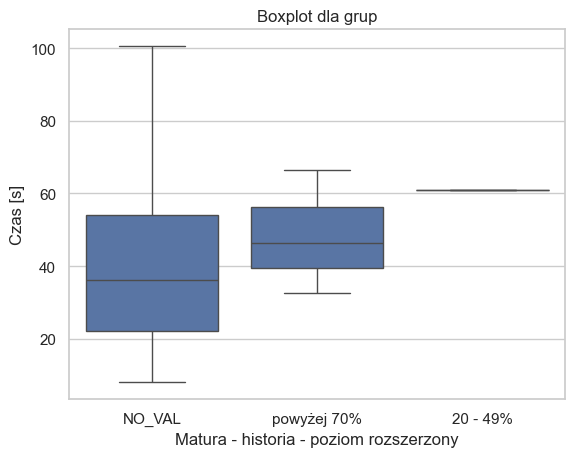

-------------------------------------
3b


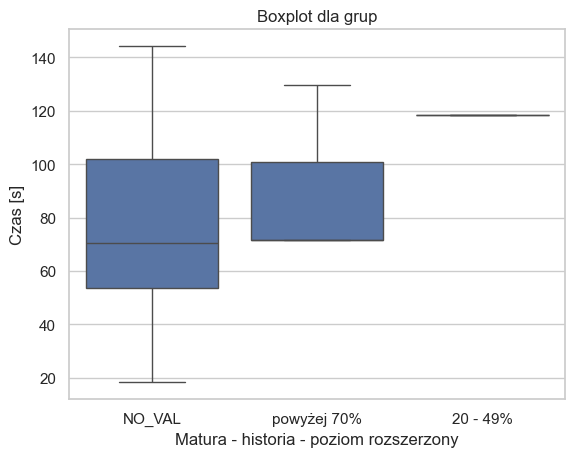

##############################################################
Samopocz
-------------------------------------
1a


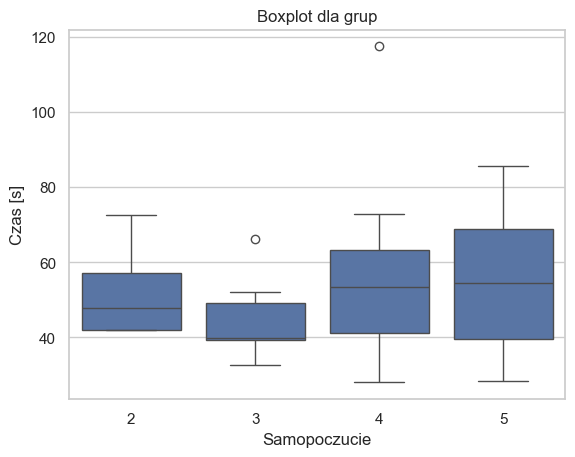

-------------------------------------
1b


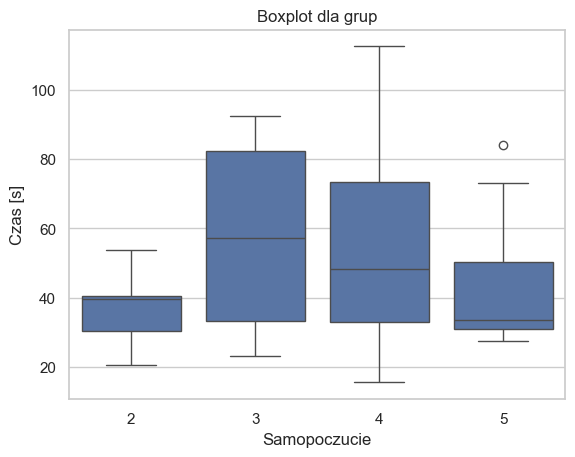

-------------------------------------
2a


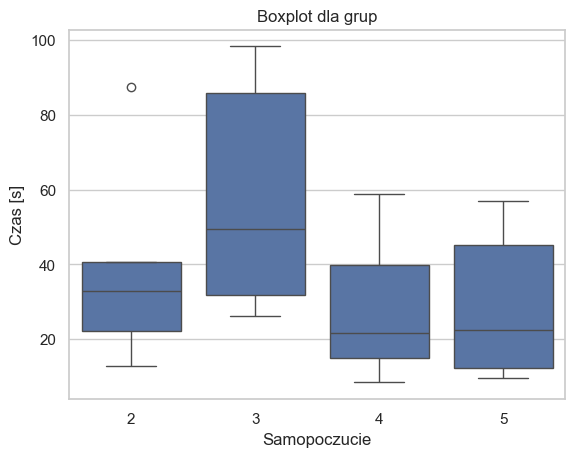

-------------------------------------
2b


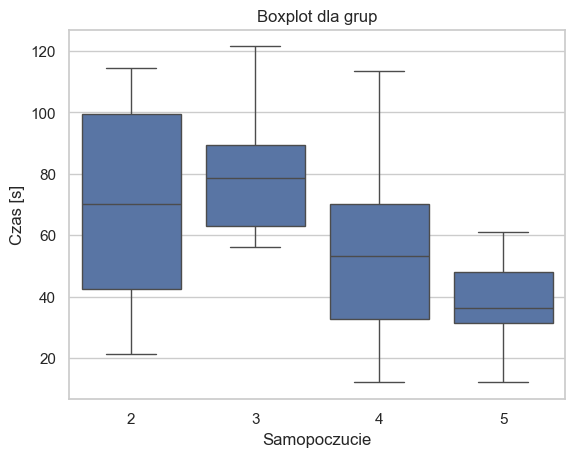

-------------------------------------
3a


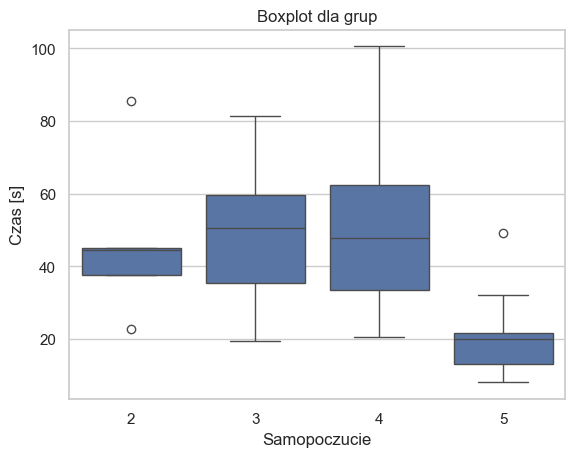

-------------------------------------
3b


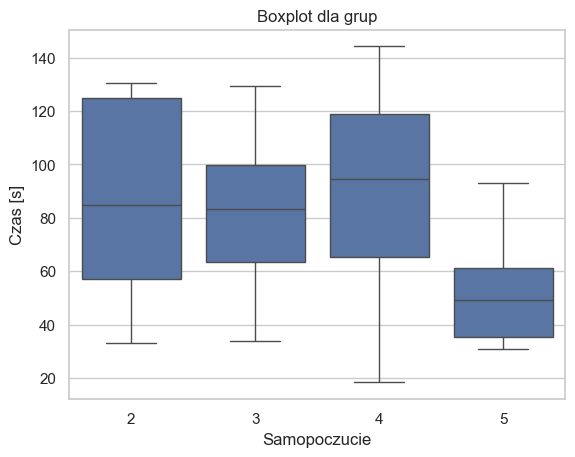

##############################################################
Stres
-------------------------------------
1a


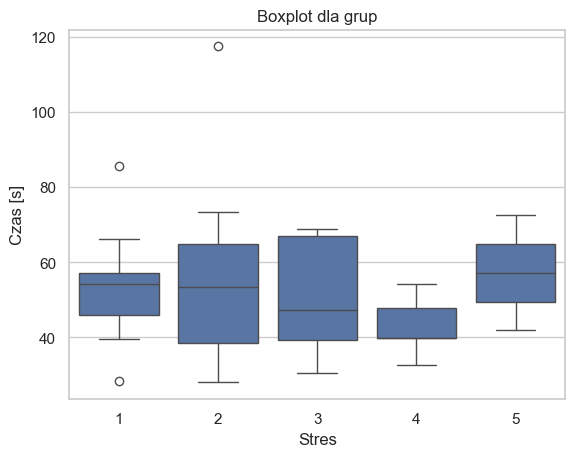

-------------------------------------
1b


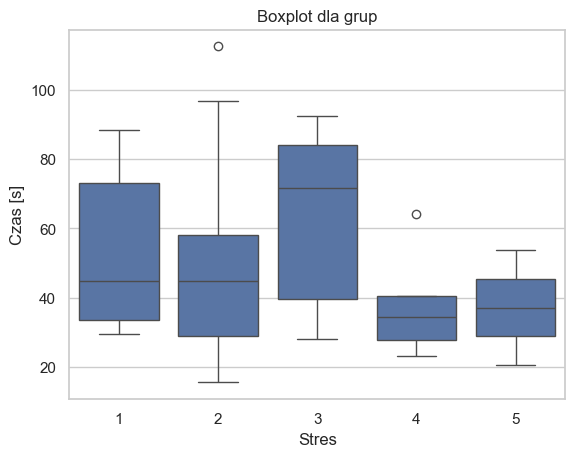

-------------------------------------
2a


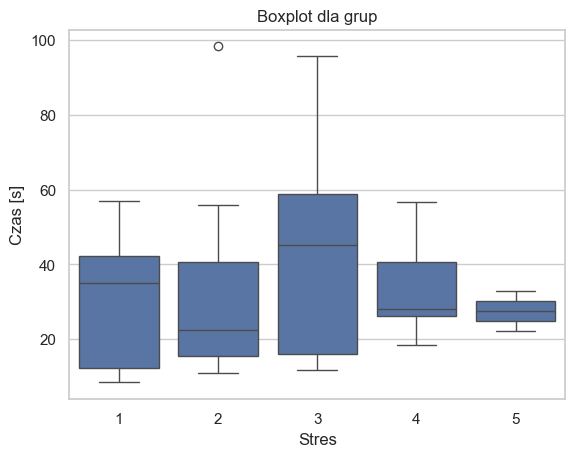

-------------------------------------
2b


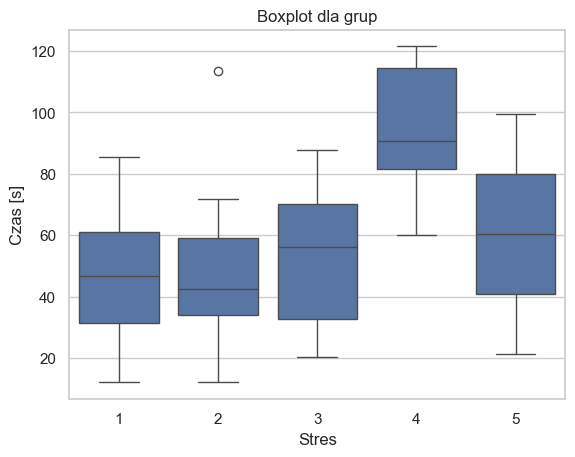

-------------------------------------
3a


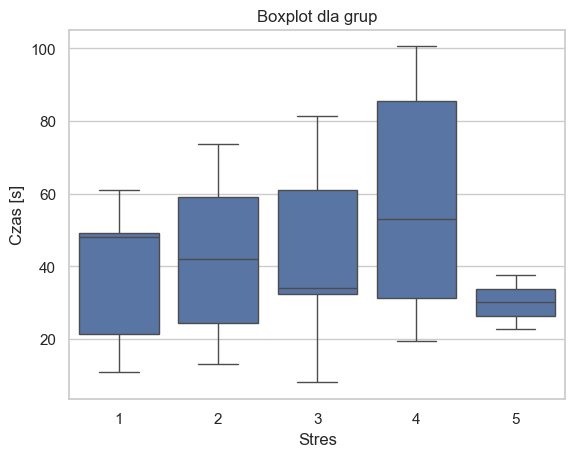

-------------------------------------
3b


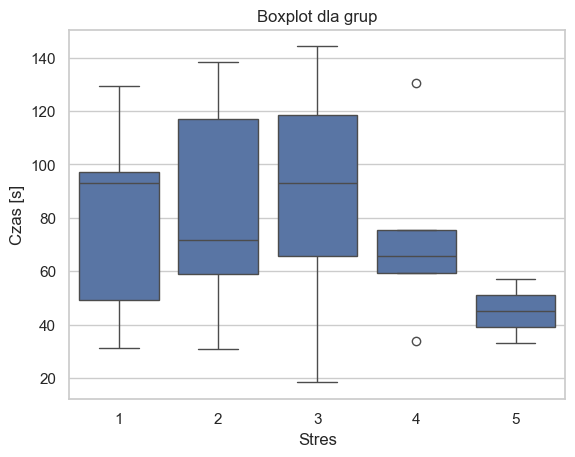

##############################################################
Zmęcz
-------------------------------------
1a


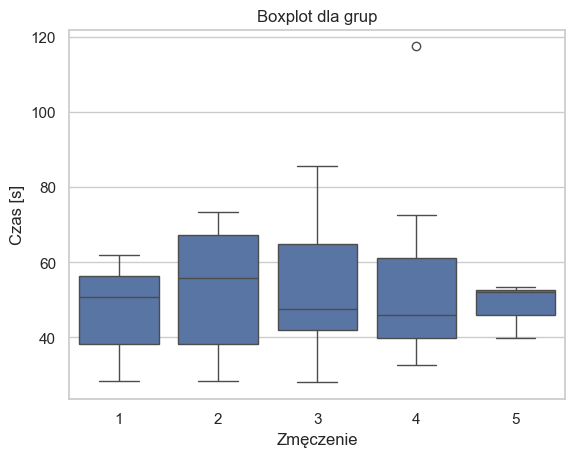

-------------------------------------
1b


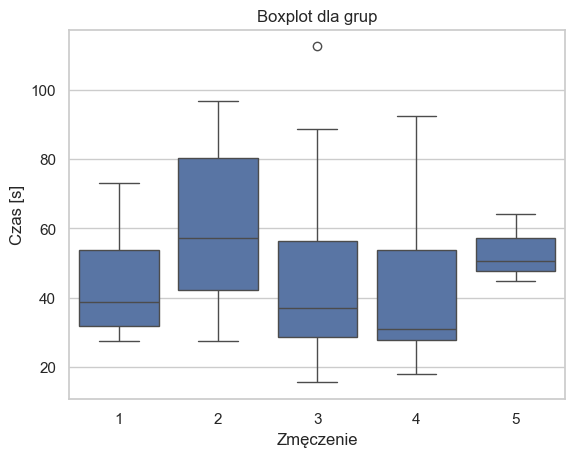

-------------------------------------
2a


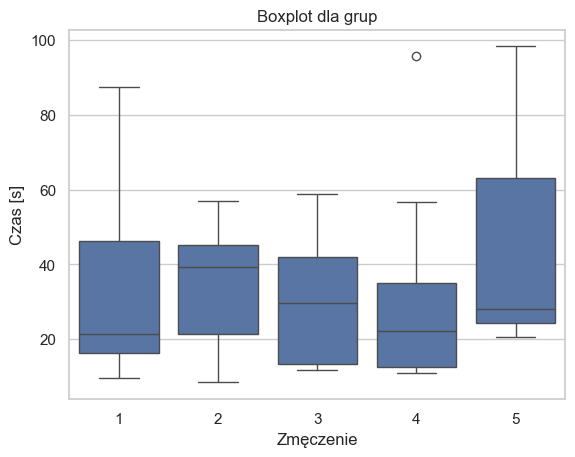

-------------------------------------
2b


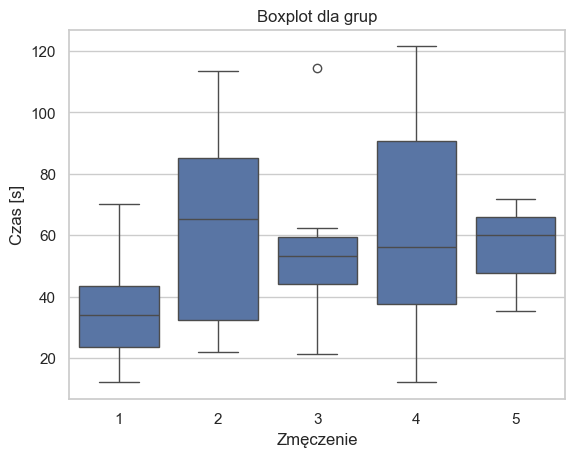

-------------------------------------
3a


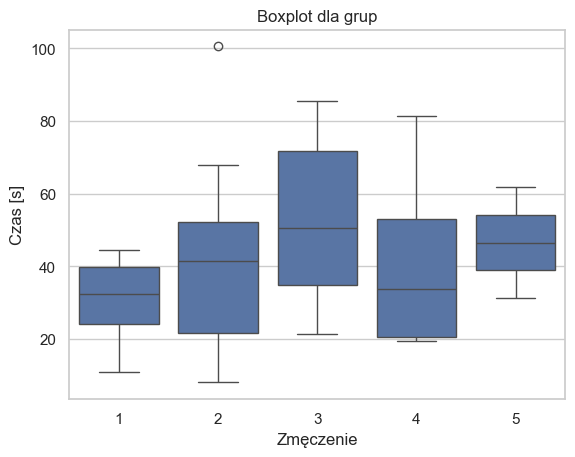

-------------------------------------
3b


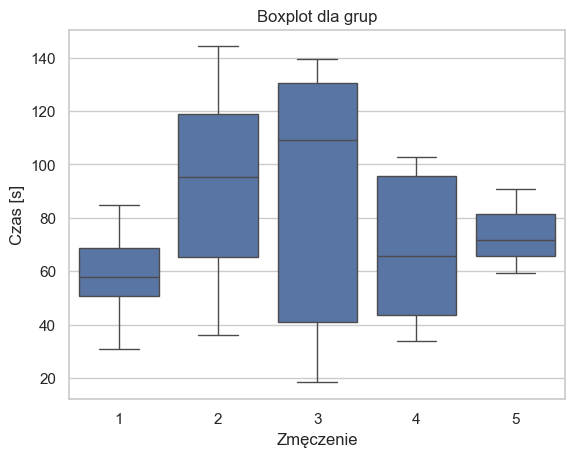

##############################################################
Czyt_map
-------------------------------------
1a


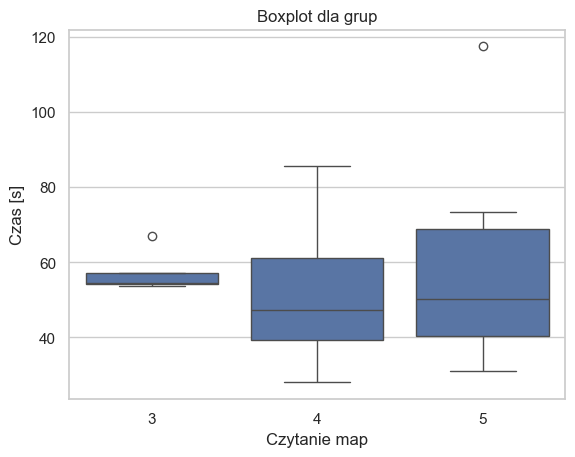

-------------------------------------
1b


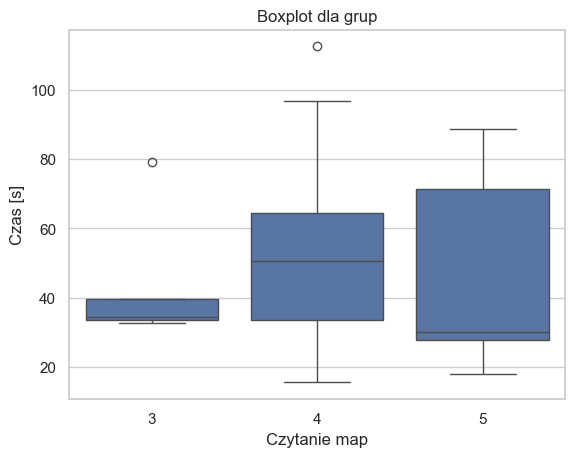

-------------------------------------
2a


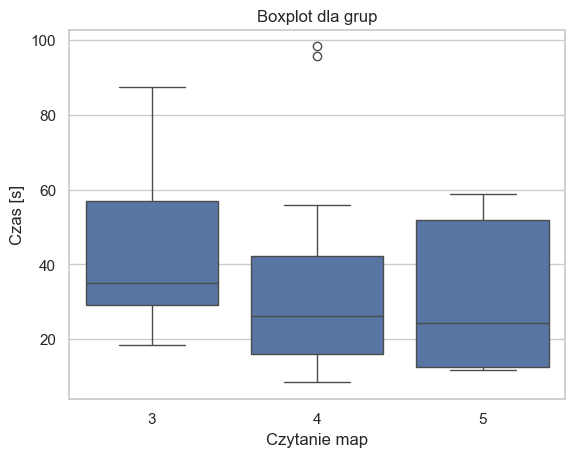

-------------------------------------
2b


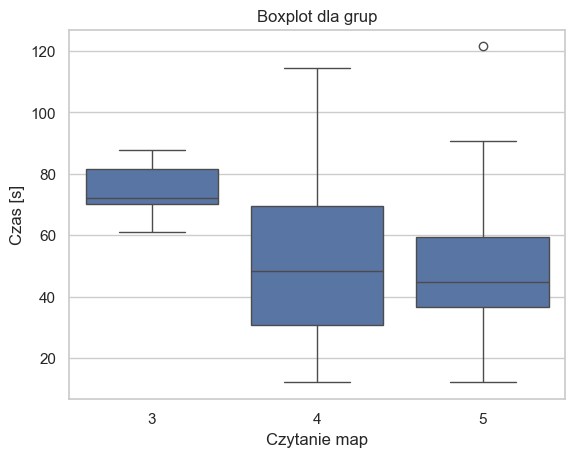

-------------------------------------
3a


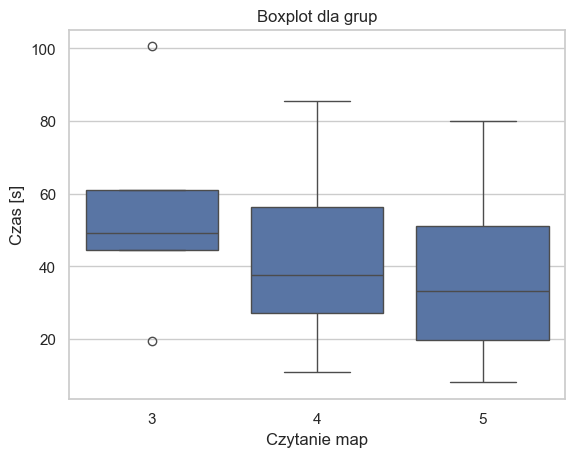

-------------------------------------
3b


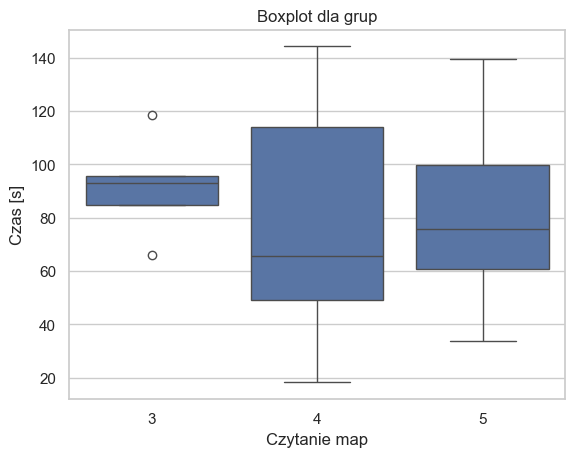

##############################################################
Podziel_uwg
-------------------------------------
1a


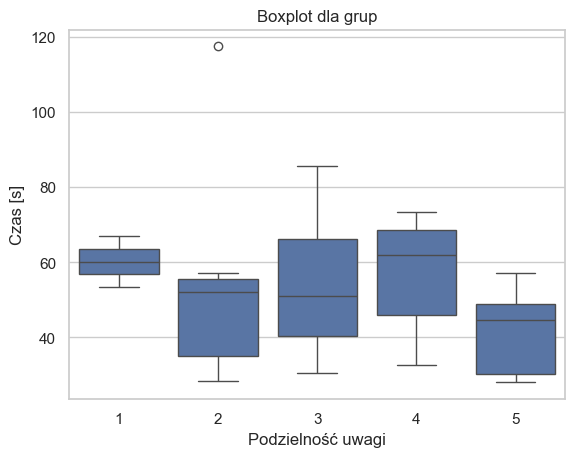

-------------------------------------
1b


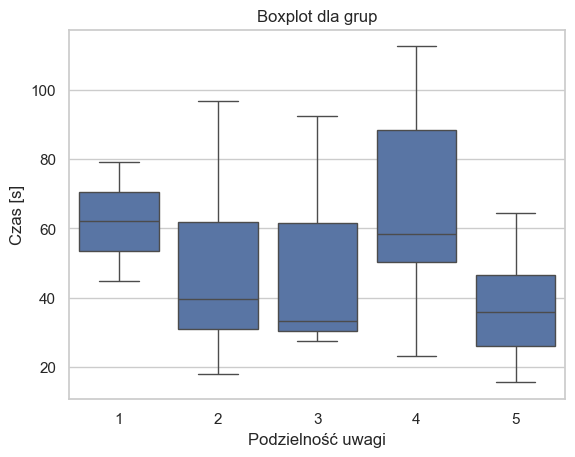

-------------------------------------
2a


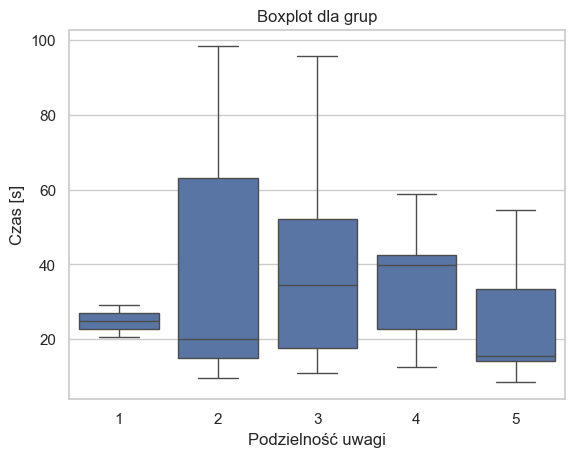

-------------------------------------
2b


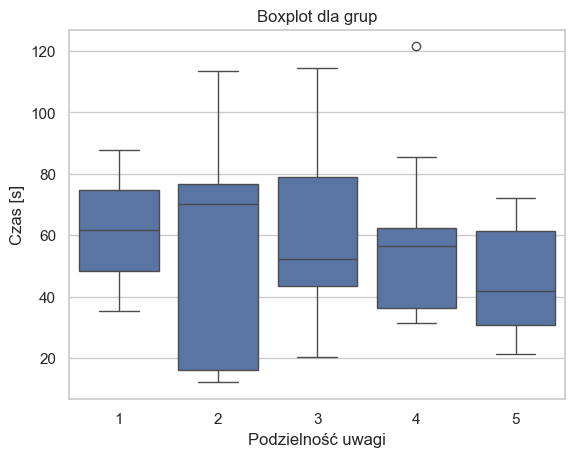

-------------------------------------
3a


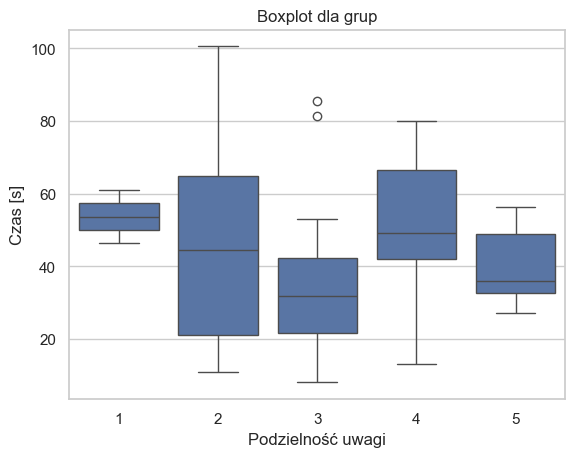

-------------------------------------
3b


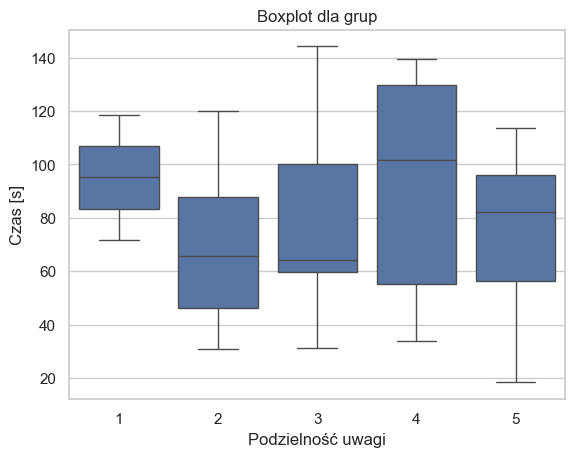

##############################################################
Analit_myśl
-------------------------------------
1a


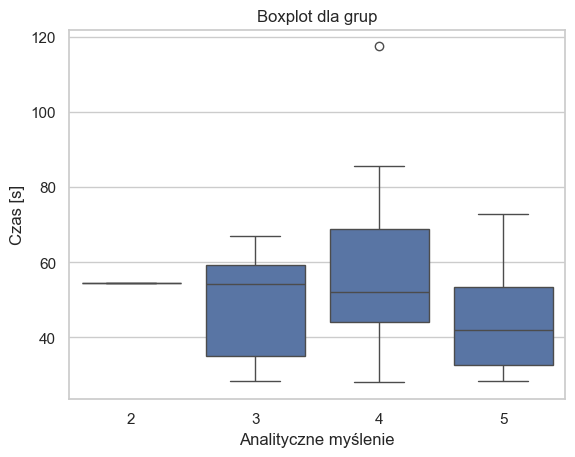

-------------------------------------
1b


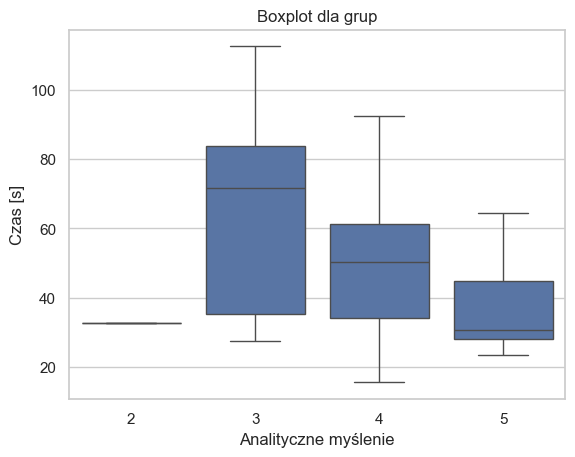

-------------------------------------
2a


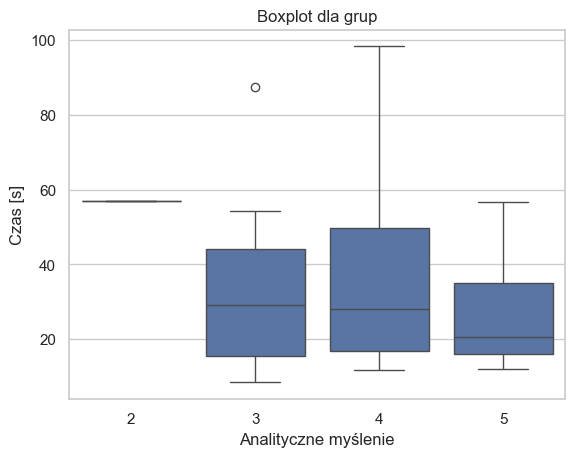

-------------------------------------
2b


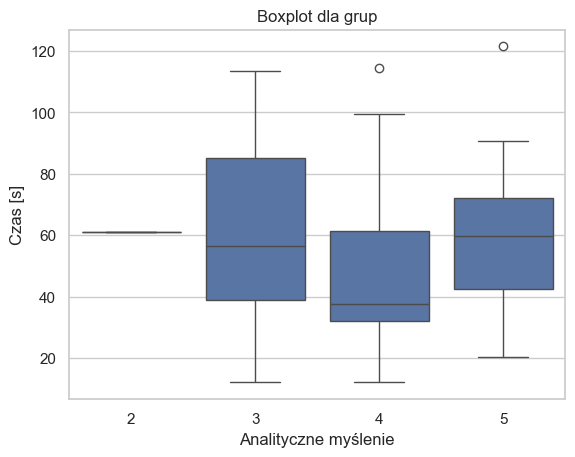

-------------------------------------
3a


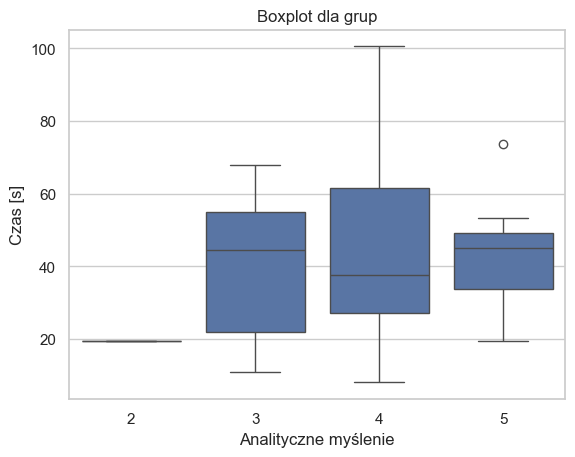

-------------------------------------
3b


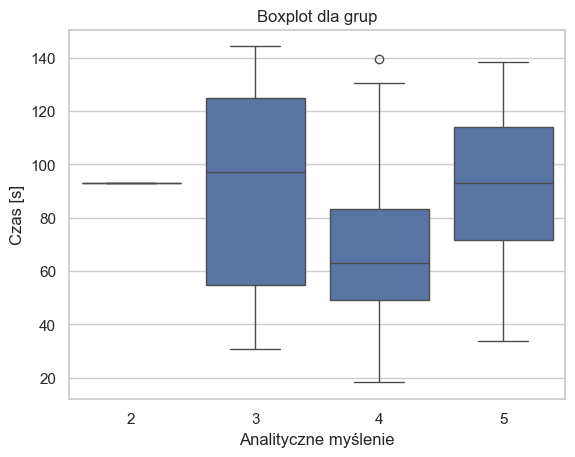

##############################################################
Spostrzeg
-------------------------------------
1a


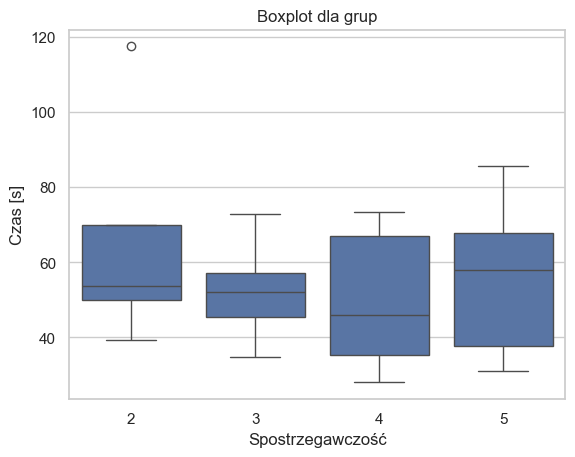

-------------------------------------
1b


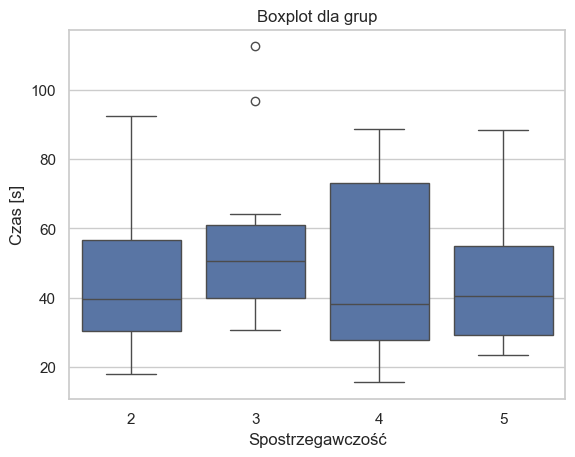

-------------------------------------
2a


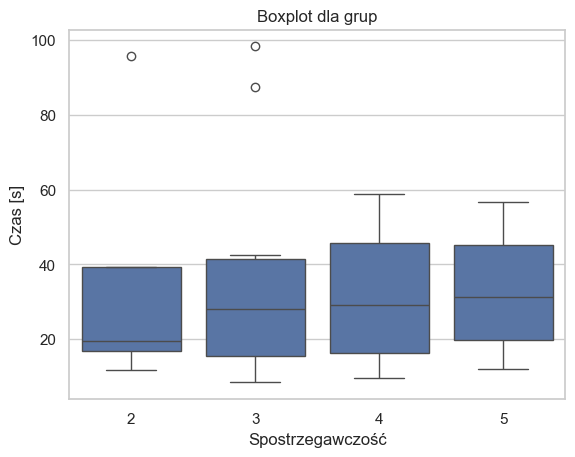

-------------------------------------
2b


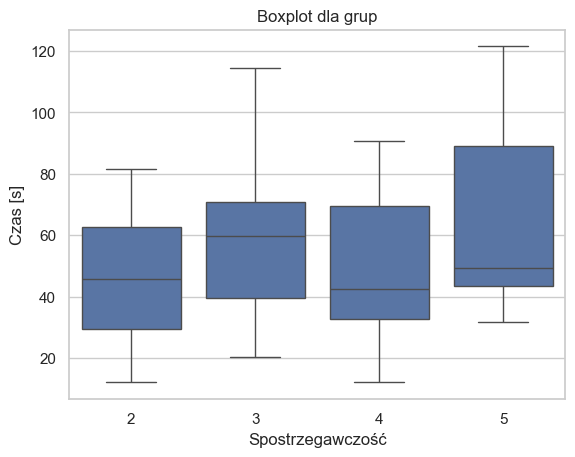

-------------------------------------
3a


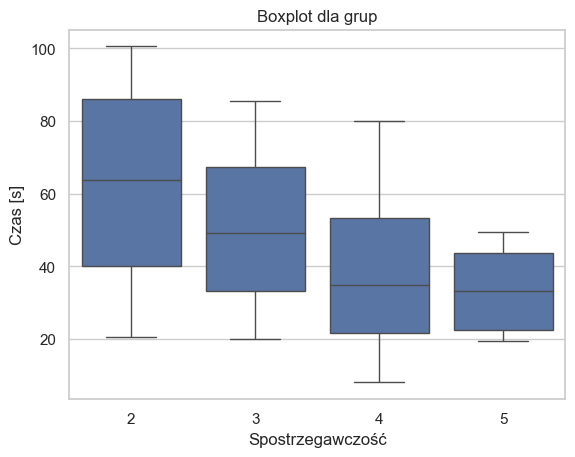

-------------------------------------
3b


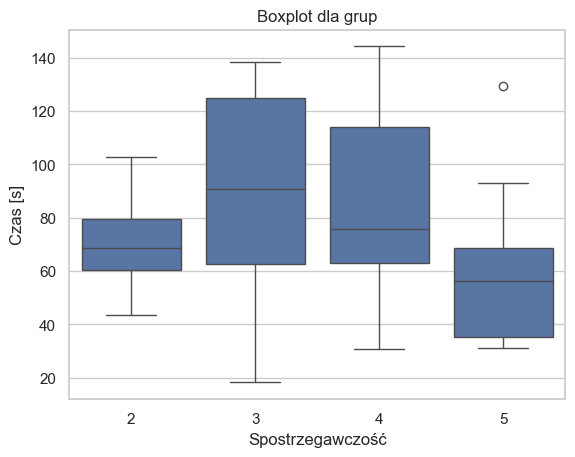

##############################################################
Czyt_ze_zroz
-------------------------------------
1a


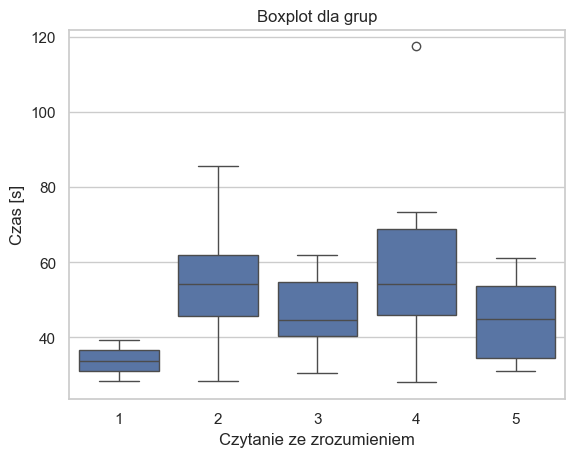

-------------------------------------
1b


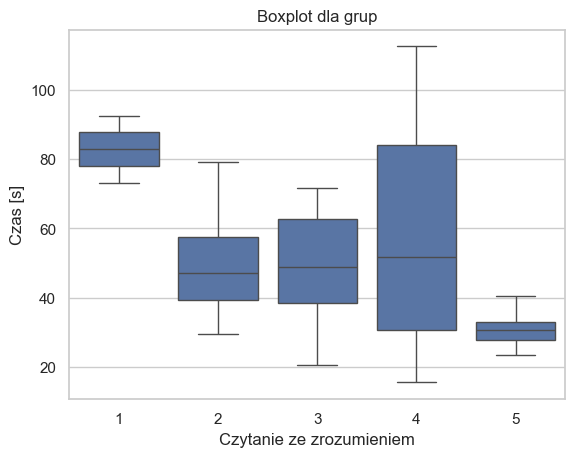

-------------------------------------
2a


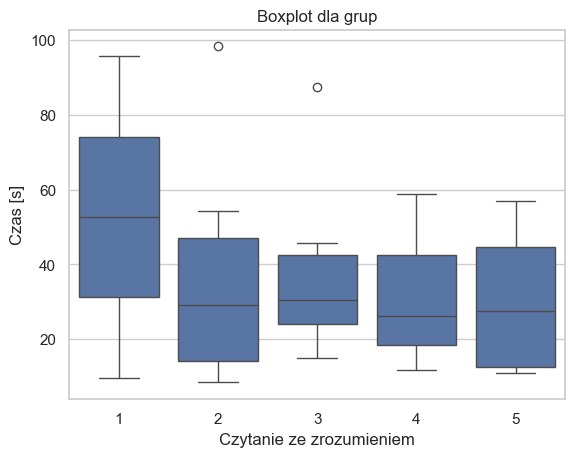

-------------------------------------
2b


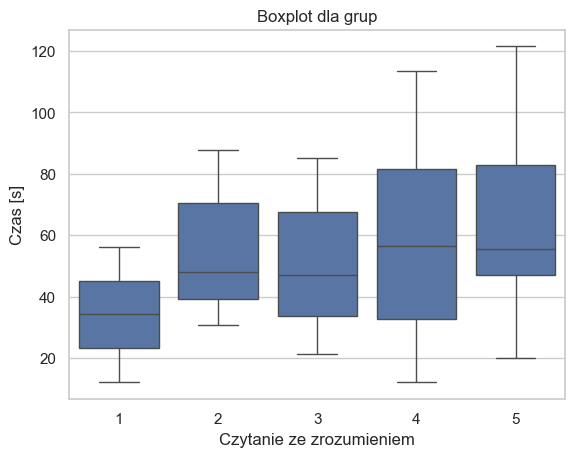

-------------------------------------
3a


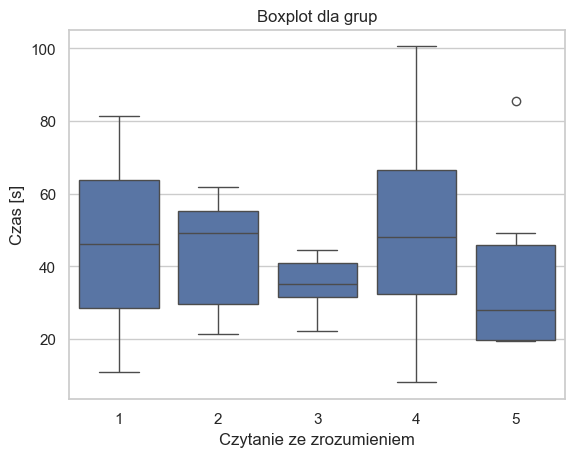

-------------------------------------
3b


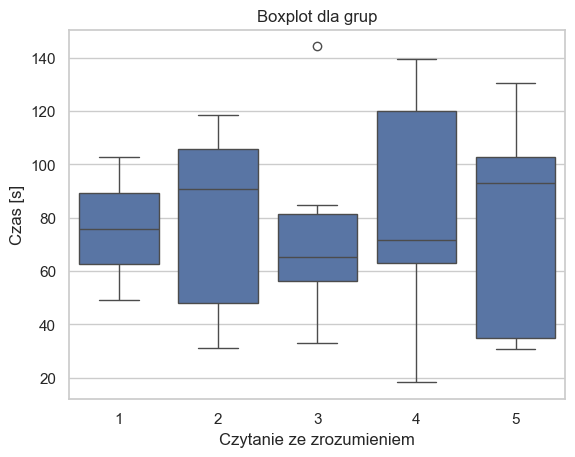

##############################################################
Wzrokowiec
-------------------------------------
1a


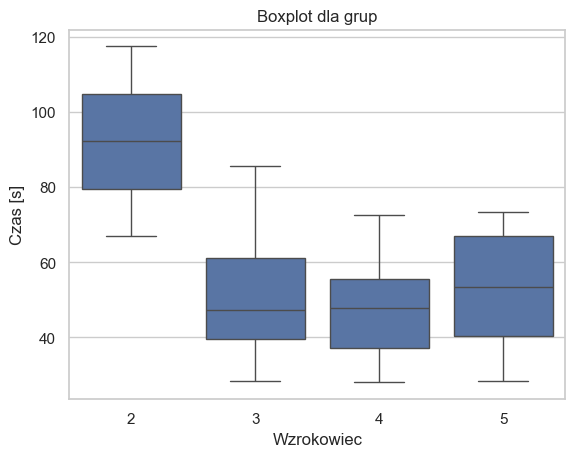

-------------------------------------
1b


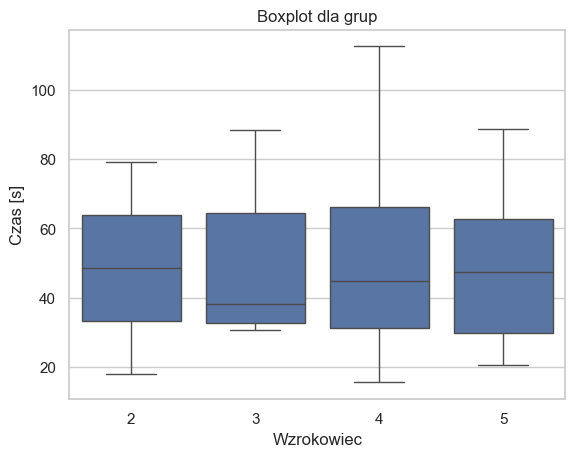

-------------------------------------
2a


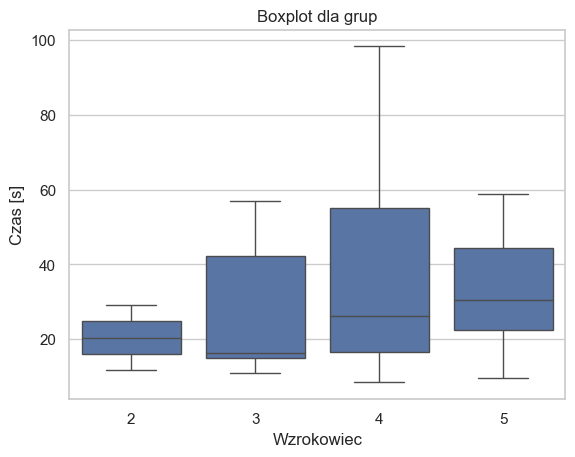

-------------------------------------
2b


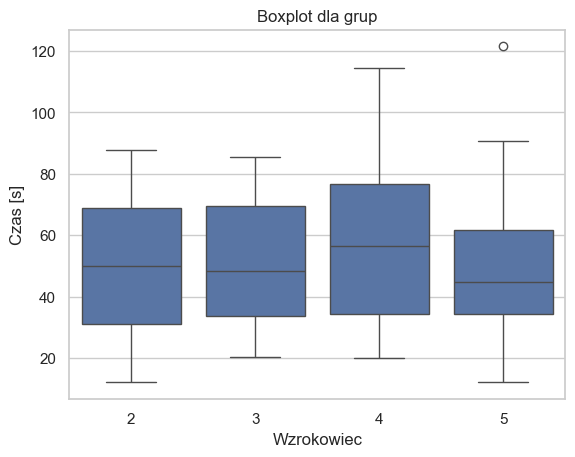

-------------------------------------
3a


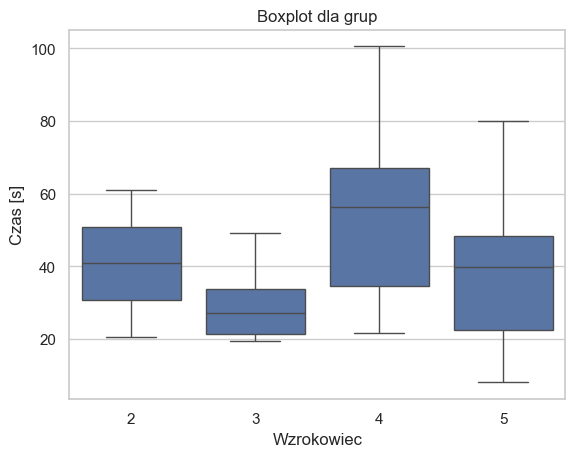

-------------------------------------
3b


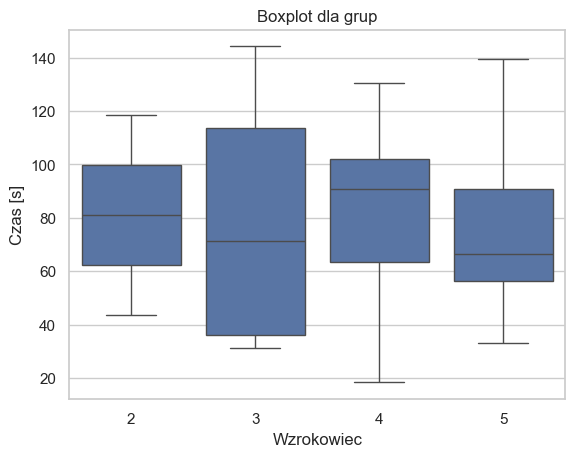

##############################################################
Słuchowiec
-------------------------------------
1a


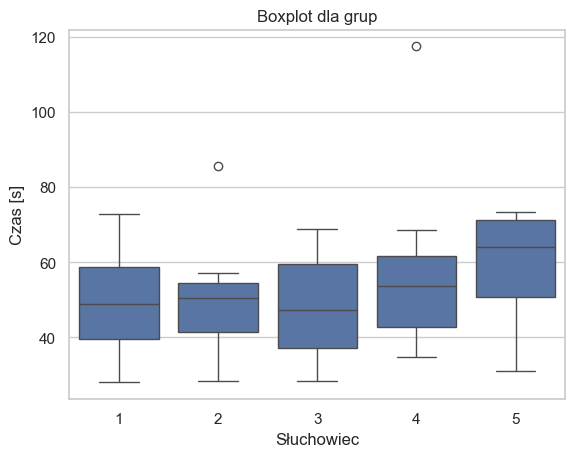

-------------------------------------
1b


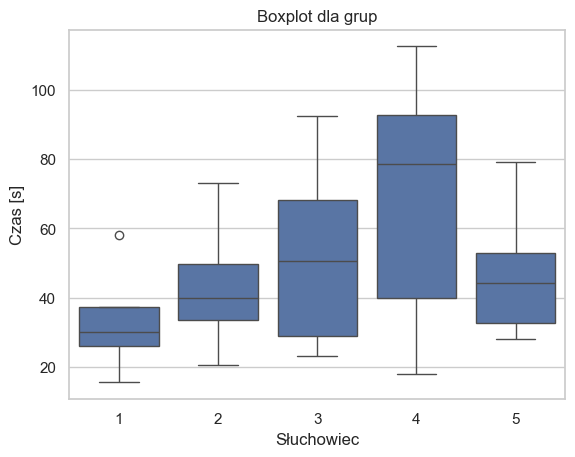

-------------------------------------
2a


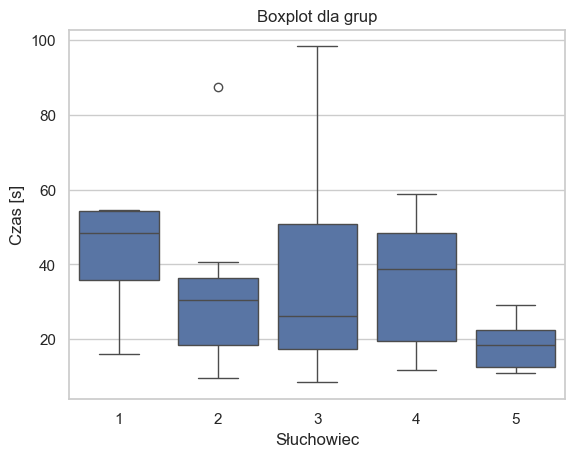

-------------------------------------
2b


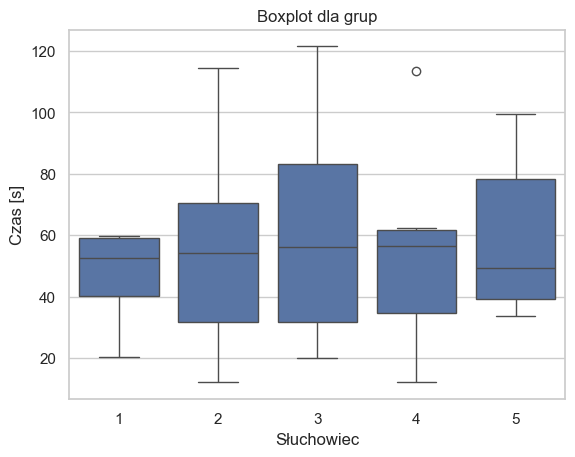

-------------------------------------
3a


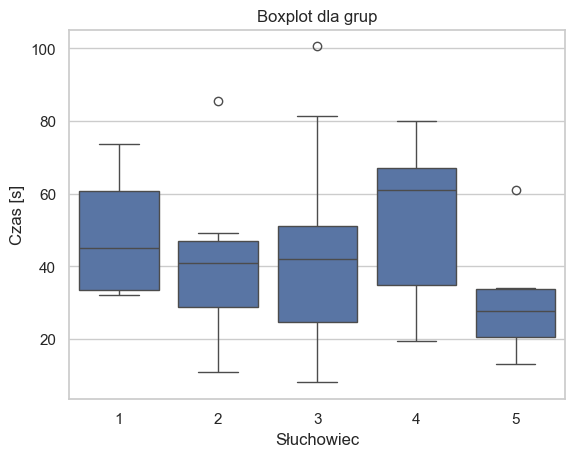

-------------------------------------
3b


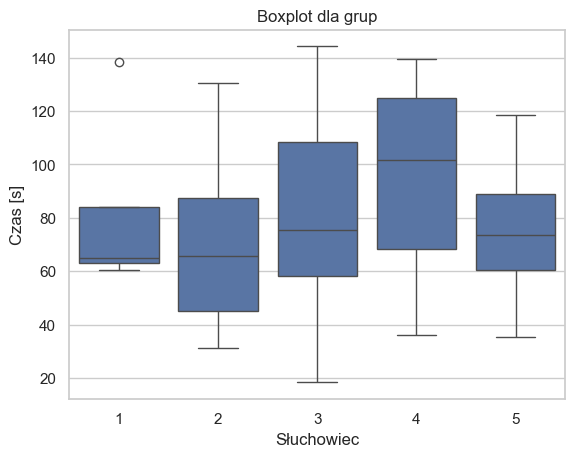

##############################################################
Kinestetyk
-------------------------------------
1a


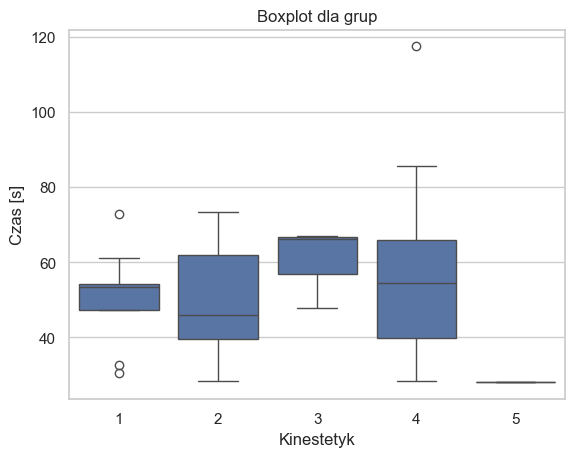

-------------------------------------
1b


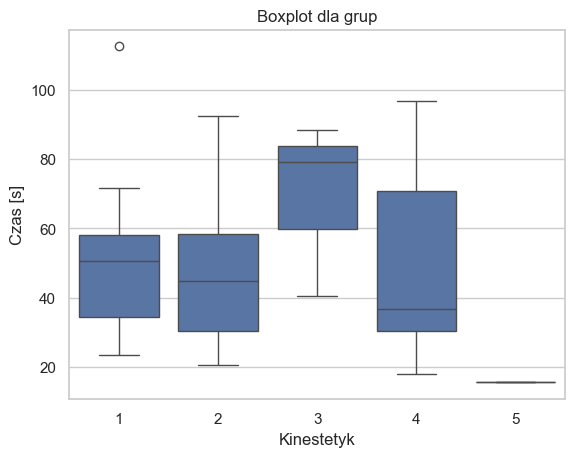

-------------------------------------
2a


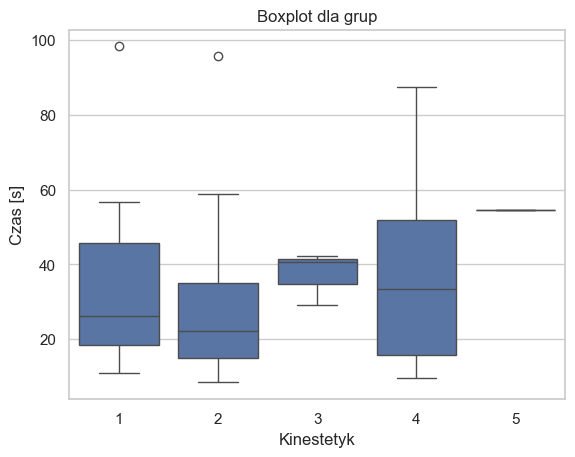

-------------------------------------
2b


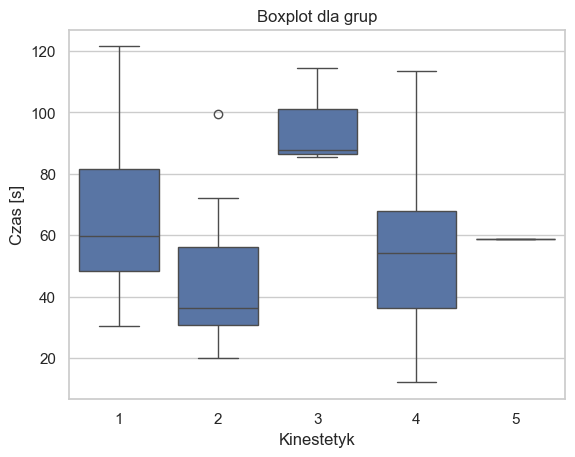

-------------------------------------
3a


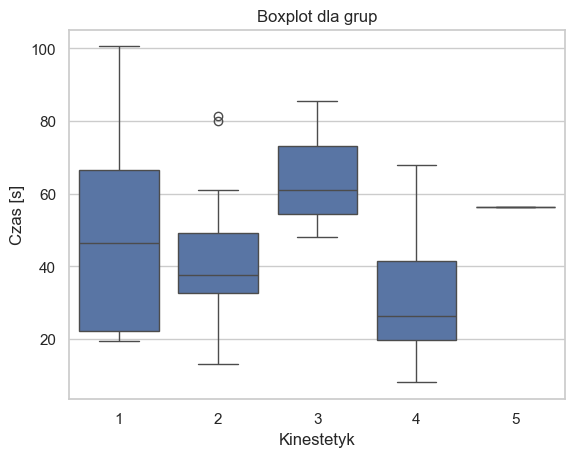

-------------------------------------
3b


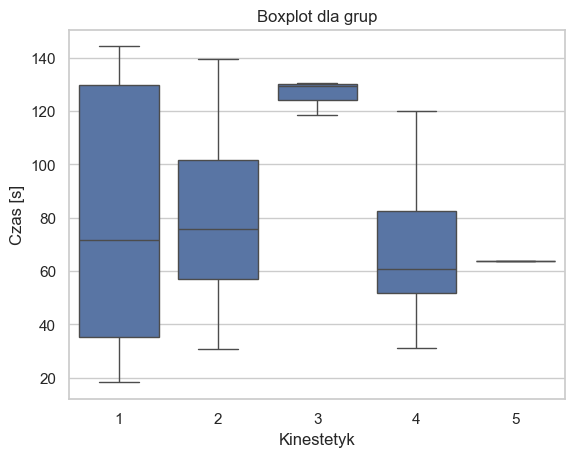

##############################################################
MAT
-------------------------------------
1a


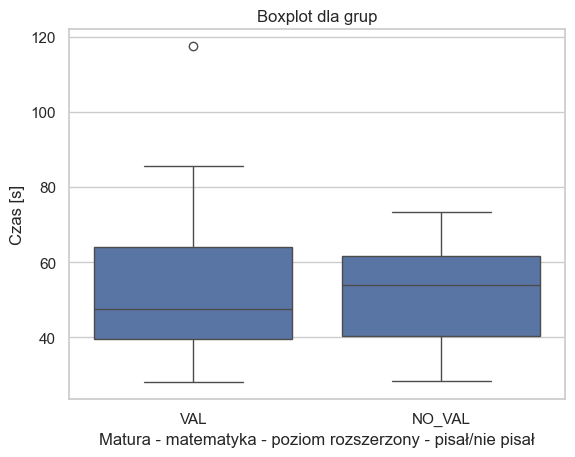

-------------------------------------
1b


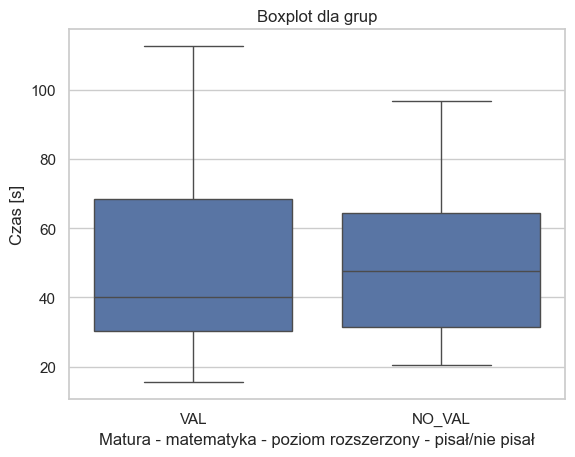

-------------------------------------
2a


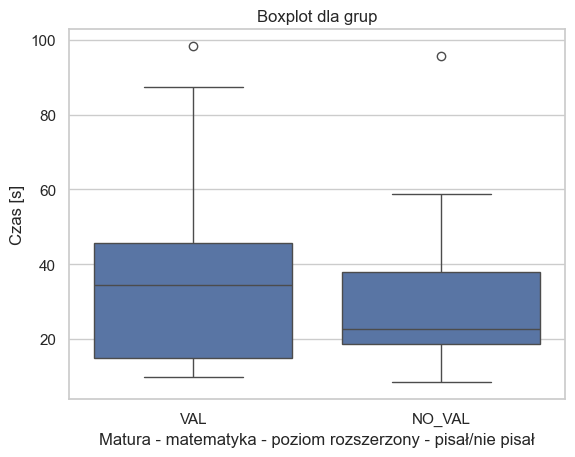

-------------------------------------
2b


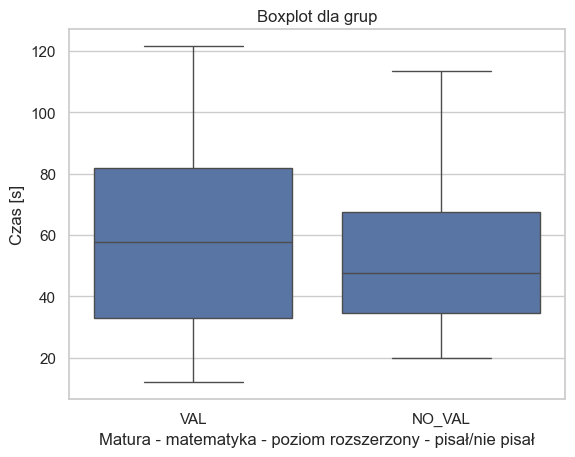

-------------------------------------
3a


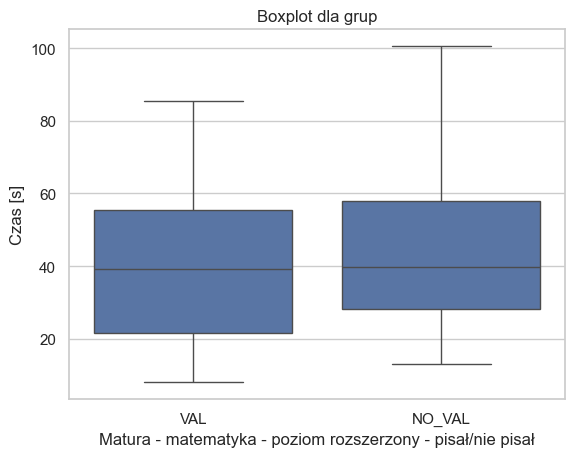

-------------------------------------
3b


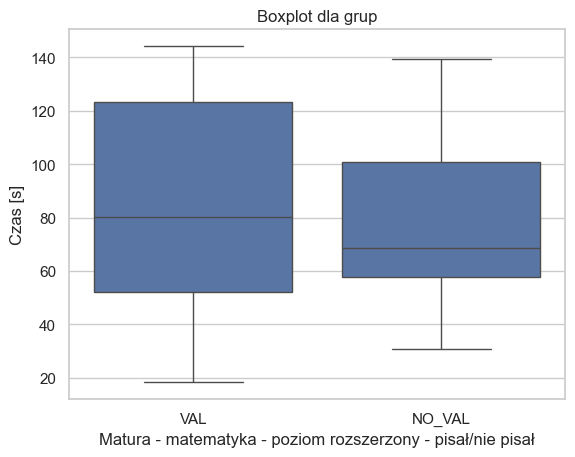

##############################################################
POL
-------------------------------------
1a


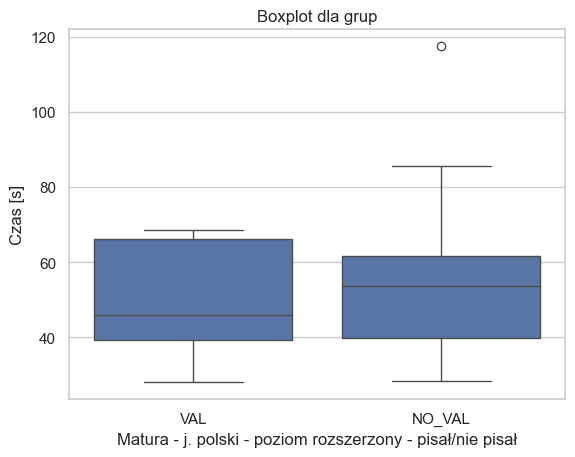

-------------------------------------
1b


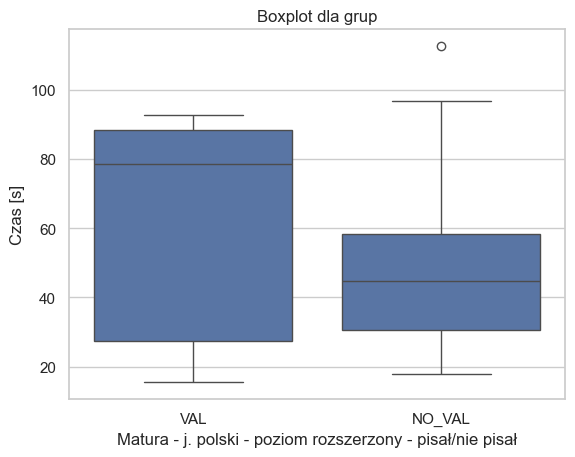

-------------------------------------
2a


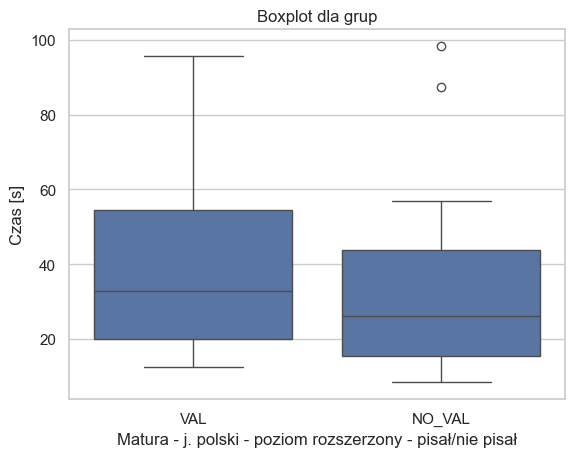

-------------------------------------
2b


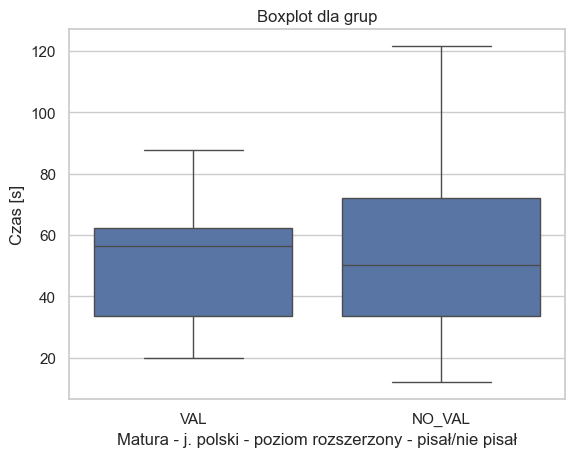

-------------------------------------
3a


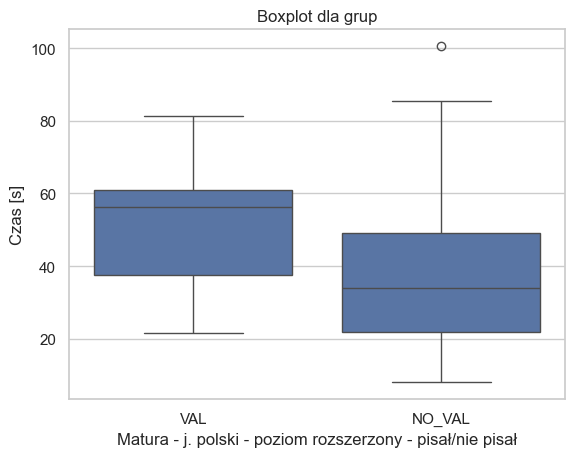

-------------------------------------
3b


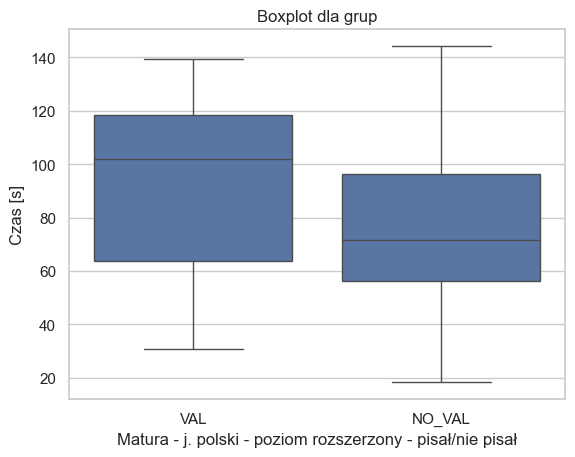

##############################################################
HIST
-------------------------------------
1a


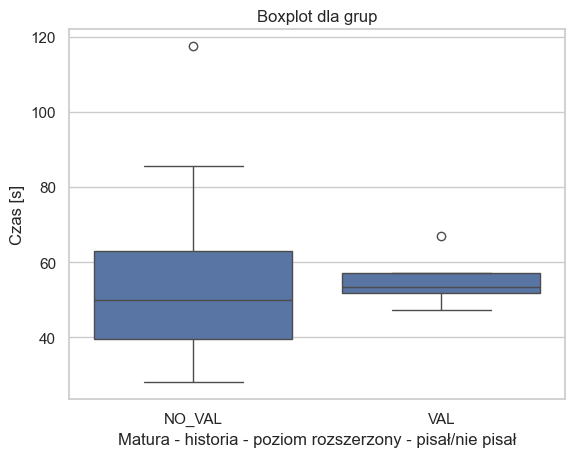

-------------------------------------
1b


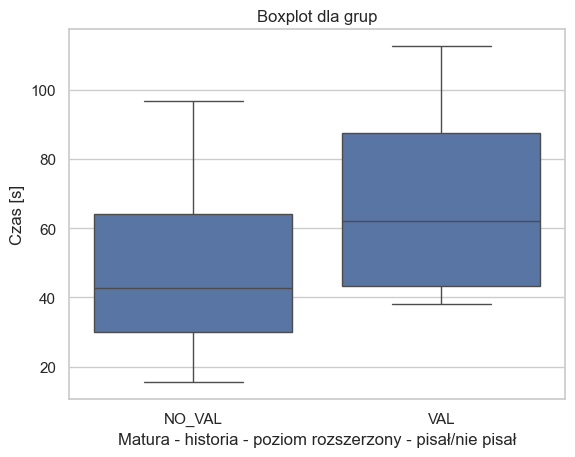

-------------------------------------
2a


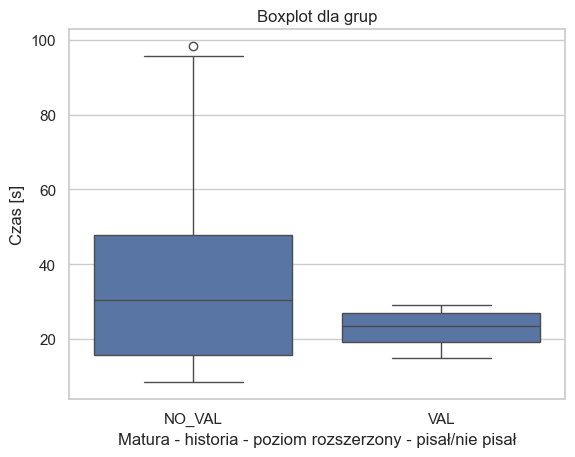

-------------------------------------
2b


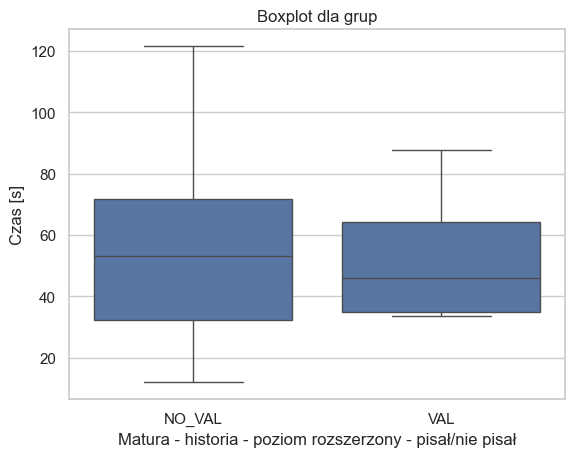

-------------------------------------
3a


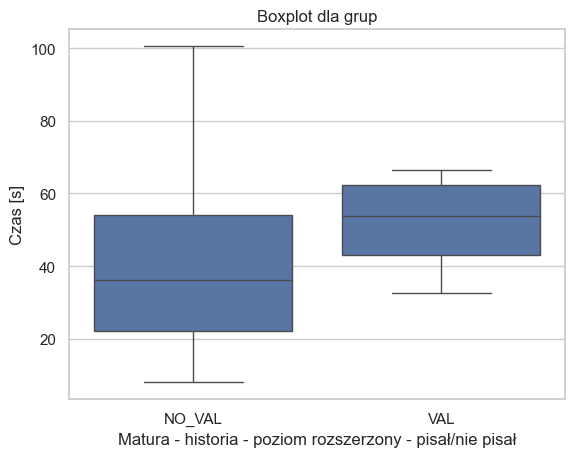

-------------------------------------
3b


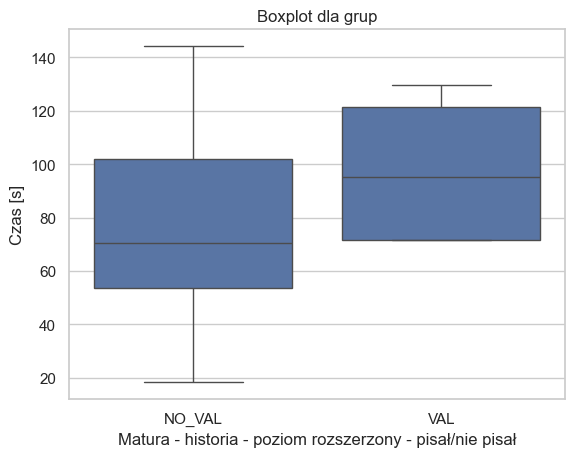

##############################################################
Typ_uczenia
-------------------------------------
1a


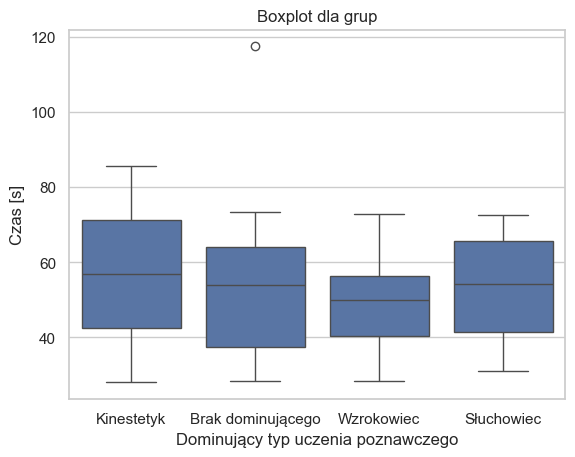

-------------------------------------
1b


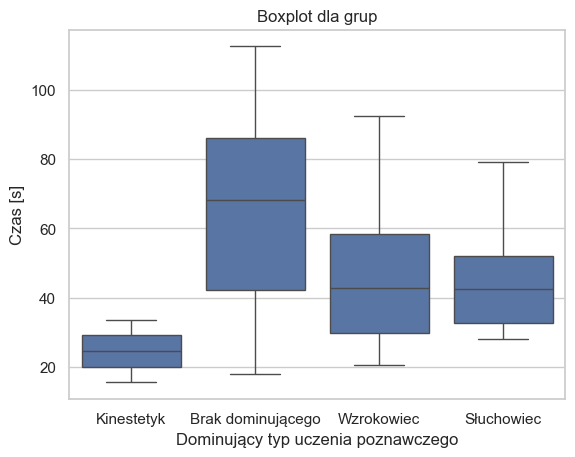

-------------------------------------
2a


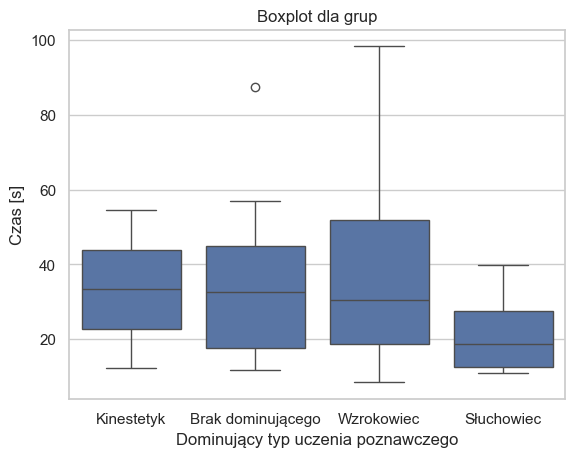

-------------------------------------
2b


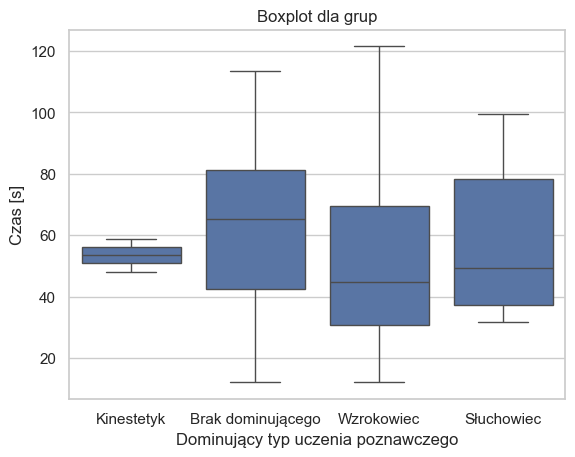

-------------------------------------
3a


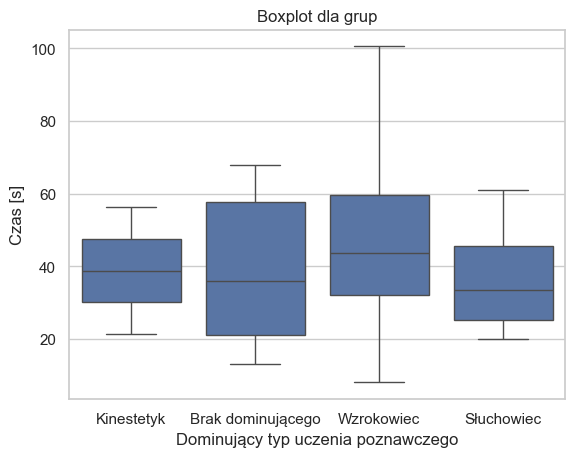

-------------------------------------
3b


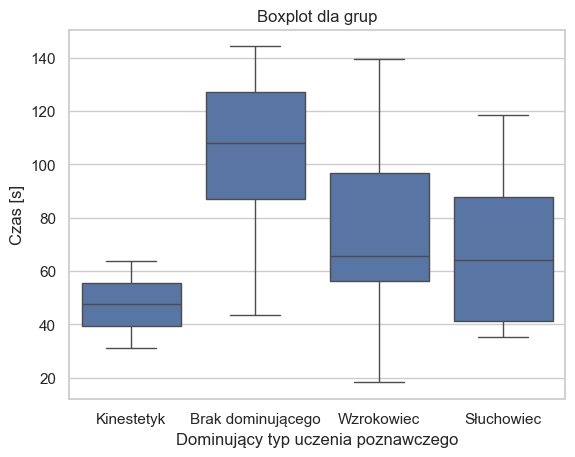

In [7]:
prefix = ['1a', '1b', '2a', '2b', '3a', '3b']
for col in columns:
    print('##############################################################')
    print(col)
    for pref in prefix:
        print('-------------------------------------')
        print(pref)
        plot_multi_boxplot(df_merge, col, f'Duration_{pref}', names_columns[col], 'Czas [s]')